<!DOCTYPE html>
<html>
<body>
    <p style="font-family: cursive; color: #FF5722; text-transform: uppercase; font-weight: bold;">Author: Subhasish Roy</p>

    Notebook for Test - Protium Finance

    >>>Problem Statement:
    There are several banks, which give loans to customers for E-Bike purchase. One such bank is facing profit challenges due to escalating incidences of non-payment in their E-Bike financing division. The firm's objective is to ascertain the loan reimbursement capabilities of their clients and comprehend the relative significance of each factor that contributes to a borrower's propensity to honor the loan repayment.
    
    >>>Objective:
    The aim of the problem is to foresee whether a client will fail to honor their loan repayment obligation or not. For each identifier in the attached dataset (refer column "ID"), the task is to predict the "Non-Payment" risk level. Suggest the optimal Credit Risk Model by using the attached dataset. Feel free to give any proxy indicator/ any analysis which can guide the bank to find out potential Loan Defaulter. Define the objective function (Evaluation Metric) for Model based on your own intuition.

    Data:
    Column ID as an Identifier
    Column "Default" as Y variable
    Rest of the columns as X Variable
</body>
</html>


# 1 - Load the data + Understand the problem statement

<!DOCTYPE html>
<html>
<head>
    <title>Credit Risk Modeling Problem</title>
</head>
<body>
    <h3> What I have understood as a data scientist:</h3>
    <p><strong>Context:</strong><br>
    A bank is experiencing profit challenges due to an increasing number of non-payment instances in their E-Bike financing division. They want to assess the loan reimbursement capabilities of their clients and understand the key factors influencing borrowers' likelihood to repay loans.</p>
    <h3>Objective:</h3>
    <p>The primary objective is to predict whether a client will default on their loan repayment. For each customer in the dataset (identified by the "ID" column), we need to predict the "Non-Payment" risk level. To achieve this, we should:</p>
    <ol>
        <li><strong>Data Preprocessing:</strong>
            <ul>
                <li>Explore the dataset, check for missing values, and handle them if necessary.</li>
                <li>Encode categorical variables, if any, using techniques like one-hot encoding or label encoding.</li>
                <li>Split the dataset into training and testing subsets to assess model performance.</li>
            </ul>
        </li>
        <li><strong>Feature Selection and Engineering:</strong>
            <ul>
                <li>Analyze the importance of each feature in predicting loan repayment.</li>
                <li>Perform feature selection, if needed, based on importance scores or domain knowledge.</li>
                <li>Create new features if they might enhance prediction accuracy.</li>
            </ul>
        </li>
        <li><strong>Model Selection and Building:</strong>
            <ul>
                <li>Experiment with different classification algorithms like Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, etc.</li>
                <li>Train these models on the training data and fine-tune hyperparameters using techniques like cross-validation and grid search.</li>
            </ul>
        </li>
        <li><strong>Model Evaluation:</strong>
            <ul>
                <li>Define an appropriate evaluation metric to assess model performance. For a credit risk problem, common metrics include:
                    <ul>
                        <li>Accuracy</li>
                        <li>Precision</li>
                        <li>Recall</li>
                        <li>F1-score</li>
                        <li>ROC-AUC</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Model Interpretation:</strong>
            <ul>
                <li>Interpret the model to understand the relative importance of each factor contributing to loan repayment prediction. This can guide the bank in identifying potential loan defaulters.</li>
            </ul>
        </li>
        <li><strong>Model Deployment:</strong>
            <ul>
                <li>Deploy the selected model to predict non-payment risk for new loan applicants.</li>
            </ul>
        </li>
        <li><strong>Monitoring and Updating:</strong>
            <ul>
                <li>Continuously monitor the model's performance and update it as necessary to adapt to changing patterns of loan default.</li>
            </ul>
        </li>
    </ol>
    <h3>Evaluation Metric:</h3>
    <p>We should choose an evaluation metric that aligns with the business goal and reflects the importance of correctly identifying potential loan defaulters. Given the nature of the problem, a suitable evaluation metric could be a combination of precision and recall, such as the F1-score or the ROC-AUC score. These metrics take into account both false positives and false negatives, which are crucial in credit risk assessment. As our main objective to increase the capture rate (Recall) by preserving the most of the conversion rate (Precision).</p>
    <p>To summarize, our goal is to build a credit risk model that accurately predicts the likelihood of loan repayment while minimizing the bank's exposure to default risk. The choice of features, models, and evaluation metrics should align with this objective.</p>
</body>
</html>


## 1.1 - Load packages and data

In [1]:
from kds_metrices import *

xlsb_file = './Base_Problem_DataSet.xlsb'

# Open the .xlsb workbook
with open_workbook(xlsb_file) as wb:
    with wb.get_sheet(1) as sheet:
        data = []

        for row in sheet.rows():
            values = [item.v for item in row]
            data.append(values)

df = pd.DataFrame(data);df.columns = df.iloc[0]
df = df.drop(df.index[0])

### Setting unique ID as index
df['ID'] = df['ID'].astype(int)
df.set_index(['ID'], inplace=True)
df.head()

0        Patron_Salary Automobile_Possession Two-Wheeler_Ownership  \
ID                                                                   
12142509        6750.0                   0.0                   0.0   
12138936       20250.0                   1.0                   0.0   
12181264       18000.0                   0.0                   0.0   
12188929       15750.0                   0.0                   0.0   
12133385       33750.0                   1.0                   0.0   

0        Ongoing_Borrowing Residence_Proprietorship Offspring_Number  \
ID                                                                     
12142509               1.0                      0.0              0.0   
12138936               1.0                     None              0.0   
12181264               1.0                      0.0              1.0   
12188929               1.0                      1.0              0.0   
12133385               1.0                      0.0              2.0   

0        Loan_Capital Borrowing_Periodic_Payment Customer_Revenue_Category  \
ID                                                                           
12142509     61190.55                    3416.85                Commercial   
12138936      15282.0                    1826.55                   Service   
12181264     59527.35                     2788.2                   Service   
12188929      53870.4                    2295.45                   Retired   
12133385     133988.4                    3547.35                Commercial   

0        Patron_Academic_Qualification Customer_Conjugal_State Patron_Sex  \
ID                                                                          
12142509                     Secondary                       M       Male   
12138936                    Graduation                       M       Male   
12181264            Graduation dropout                       W       Male   
12188929                     Secondary                       M       Male   
12133385                     Secondary                       M     Female   

0        Borrowing_Agreement_Category Customer_Living_Arrangement  \
ID                                                                  
12142509                           CL                        Home   
12138936                           CL                        Home   
12181264                           CL                      Family   
12188929                           CL                        Home   
12133385                           CL                        Home   

0        Population_Fraction_by_Region Elderliness_in_Days  \
ID                                                           
12142509                      0.028663             13957.0   
12138936                      0.008575             14162.0   
12181264                        0.0228             16790.0   
12188929                      0.010556             23195.0   
12133385                      0.020713             11366.0   

0        Work_Duration_in_Days Enlistment_Period_in_Days Identity_Age_in_Days  \
ID                                                                              
12142509                1062.0                    6123.0                383.0   
12138936                4129.0                    7833.0                 21.0   
12181264                5102.0                      None                331.0   
12188929              365243.0                      None                775.0   
12133385                2977.0                    5516.0               4043.0   

0        Private_Dwelling_Duration Cellphone_Marker Residential_Phone_Marker  \
ID                                                                             
12142509                      None              1.0                      1.0   
12138936                       0.0              1.0                      0.0   
12181264                      None              1.0                      0.0   
12188929                      

In [2]:
print(df.shape)
print(df.Default.unique())

(121856, 38)
[0.0 1.0]


## 1.2 Understand the data

<!DOCTYPE html>
<html>
<head>
    <title>Feature Information</title>
</head>
<body>
    <h1></h1>
    <p>We have 37 features and 1 binary response variable. If we look at the problem statement, what we'll have to do is to predict whether a customer will fail to pay the EMI. 
From the data perspectinve what I am seeing is, some of the variables are demographic. Which does not have that much impact in credit risk models. Normally, I would recommend to look for their bureau information (from CIBIL, CRIF, etc.) for credit risk modelling. Because, there we'll find all the financial histories of a person. If a customer is defaulter, there is a good chance that he has done that before in his/her previous loans. He also might be an NPA(Non Performing Asset) previously. Also the bureau data contains month on month credit information up to date. So, from there we might find some pattern. I would highly recommend to look into bureau performance to build such models.
It would've great if the feature meaning were written there. Here's what I've understood from the dataset, </p>
    <h2>Data Features</h2>
    <table border="1">
        <tr>
            <th>Feature Name</th>
            <th>Description</th>
        </tr>
        <tr>
            <td>Patron_Salary</td>
            <td>This feature likely represents the salary of the borrower or patron, which can be an important factor in assessing their ability to repay a loan.</td>
        </tr>
        <tr>
            <td>Automobile_Possession</td>
            <td>This feature indicates whether the customer possesses an automobile. It's a binary feature (0 or 1), where 1 might signify automobile ownership.</td>
        </tr>
        <tr>
            <td>Two-Wheeler_Ownership</td>
            <td>Similar to "Automobile_Possession," this feature likely indicates whether the customer owns a two-wheeler, with 1 denoting ownership.</td>
        </tr>
        <tr>
            <td>Ongoing_Borrowing</td>
            <td>This feature may indicate whether the customer is currently involved in other borrowings or loans, with 1 representing current borrowing and 0 indicating no ongoing borrowing.</td>
        </tr>
        <tr>
            <td>Residence_Proprietorship</td>
            <td>This feature could indicate whether the customer owns their place of residence, with 1 denoting proprietorship.</td>
        </tr>
        <tr>
            <td>Offspring_Number</td>
            <td>This feature likely represents the number of offspring (children or dependents) the customer has. It can provide insights into their family and financial responsibilities.</td>
        </tr>
        <tr>
            <td>Loan_Capital</td>
            <td>This feature likely represents the capital amount of the loan being considered by the customer.</td>
        </tr>
        <tr>
            <td>Borrowing_Periodic_Payment</td>
            <td>This feature may represent the periodic payment amount for the loan. It could include installment amounts or monthly payments.</td>
        </tr>
        <tr>
            <td>Customer_Revenue_Category</td>
            <td>This feature categorizes the customer based on their revenue or income category, which can help understand their financial status.</td>
        </tr>
        <tr>
            <td>Patron_Academic_Qualification</td>
            <td>This feature could represent the highest level of academic qualification attained by the customer.</td>
        </tr>
        <tr>
            <td>Customer_Conjugal_State</td>
            <td>This feature might represent the customer's marital status, with values like 'M' for married, 'W' for widowed, 'S' for single, and 'D' for divorced.</td>
        </tr>
        <tr>
            <td>Patron_Sex</td>
            <td>This feature likely represents the gender of the customer, with values 'Male' and 'Female' or potentially 'XNA' for missing data.</td>
        </tr>
        <tr>
            <td>Borrowing_Agreement_Category</td>
            <td>This feature might categorize the type of borrowing agreement (e.g., 'CL' for consumer loans, 'RL' for real estate loans).</td>
        </tr>
        <tr>
            <td>Customer_Living_Arrangement</td>
            <td>This feature could represent the type of living arrangement or residence of the customer (e.g., 'Home,' 'Family,' 'Office').</td>
        </tr>
        <tr>
            <td>Population_Fraction_by_Region</td>
            <td>This feature may represent the population fraction in a particular region. It's a numerical value that could be used for geographical analysis.</td>
        </tr>
        <tr>
            <td>Elderliness_in_Days</td>
            <td>This feature likely represents the age of the customer in days, which might be useful for age-based analysis.</td>
        </tr>
        <tr>
            <td>Work_Duration_in_Days</td>
            <td>This feature could represent the duration of the customer's work or employment in days.</td>
        </tr>
        <tr>
            <td>Enlistment_Period_in_Days</td>
            <td>This feature might represent the duration since the customer's enlistment or registration in days.</td>
        </tr>
        <tr>
            <td>Identity_Age_in_Days</td>
            <td>This feature may represent the age of the customer's identity or some form of identification in days.</td>
        </tr>
        <tr>
            <td>Private_Dwelling_Duration</td>
            <td>This feature might represent the duration of the customer's residence in a private dwelling. It includes values like 'None' or numeric values in days.</td>
        </tr>
        <tr>
            <td>Cellphone_Marker</td>
            <td>This binary feature indicates whether the customer has a cellphone (1 for yes, 0 for no).</td>
        </tr>
        <tr>
            <td>Residential_Phone_Marker</td>
            <td>Similar to "Cellphone_Marker," this feature indicates whether the customer has a residential phone.</td>
        </tr>
        <tr>
            <td>Employment_Phone_Operation</td>
            <td>This binary feature may indicate whether the customer's employment involves the use of a phone (1 for yes, 0 for no).</td>
        </tr>
        <tr>
            <td>Customer_Vocation</td>
            <td>This feature represents the customer's occupation or vocation, which can be essential in assessing their income source.</td>
        </tr>
        <tr>
            <td>Patron_Kin_Count</td>
            <td>This feature likely represents the count of kin (family members) the customer has.</td>
        </tr>
        <tr>
            <td>Customer_Urban_Area_Ranking</td>
            <td>This feature might represent the urban area ranking of the customer's residence.</td>
        </tr>
        <tr>
            <td>Request_Submission_Day</td>
            <td>This feature indicates the day when the loan request was submitted.</td>
        </tr>
        <tr>
            <td>Request_Submission_Hour</td>
            <td>This feature represents the hour of the day when the loan request was submitted.</td>
        </tr>
        <tr>
            <td>Patron_Constant_Correspondence_Marker</td>
            <td>This binary feature indicates whether the patron has constant correspondence</td>
                </tr>
        <tr>
            <td>Customer_Professional_Communication_Marker</td>
            <td>Similar to the previous feature, this binary feature indicates whether the customer has professional communication with the bank.</td>
        </tr>
        <tr>
            <td>Sort_of_Institution</td>
            <td>This feature likely represents the type of institution or entity where the customer is employed or associated with.</td>
        </tr>
        <tr>
            <td>Rating_Origin_1</td>
            <td>These features might represent different rating values or scores related to the customer's creditworthiness.</td>
        </tr>
        <tr>
            <td>Rating_Origin_2</td>
            <td>These features might represent different rating values or scores related to the customer's creditworthiness.</td>
        </tr>
        <tr>
            <td>Rating_Origin_3</td>
            <td>These features might represent different rating values or scores related to the customer's creditworthiness.</td>
        </tr>
        <tr>
            <td>Community_Non-Payment_Incidence</td>
            <td>This feature may represent the incidence of non-payment within the customer's community.</td>
        </tr>
        <tr>
            <td>Telecommunication_Switch</td>
            <td>This feature may represent the customer's telecommunications switch or network-related information.</td>
        </tr>
        <tr>
            <td>Solvency_Information_Agency</td>
            <td>This feature may indicate the solvency information agency or bureau providing information on the customer's financial status.</td>
        </tr>
        <tr>
            <td>Default</td>
            <td>This is the target variable that represents whether a customer defaulted on a loan (0 for no default, 1 for default).</td>
        </tr>
    </table>
</body>
</html>



# 2 - EDA and Preprocessing: 1st stage

## 2.1 - Visualize the data

<p style="color: blue;">There are few columns that are numeric but the type in the dataframe is Object. Those need to be converted to numeric.</p>
<p style="color: green;">It would be negligible if the extension of the file is not .xlsb.</p>

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)      


Report raw_data_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



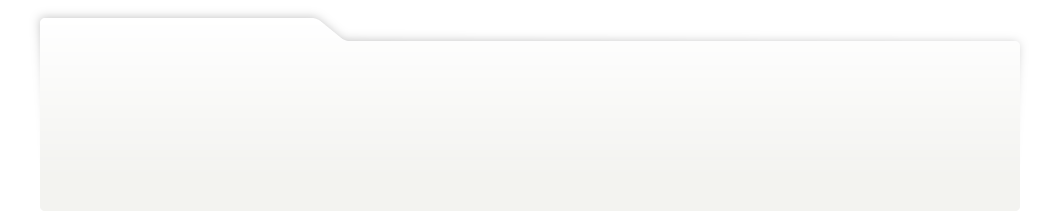
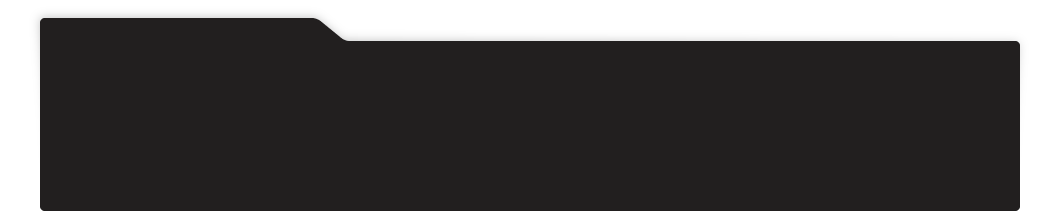
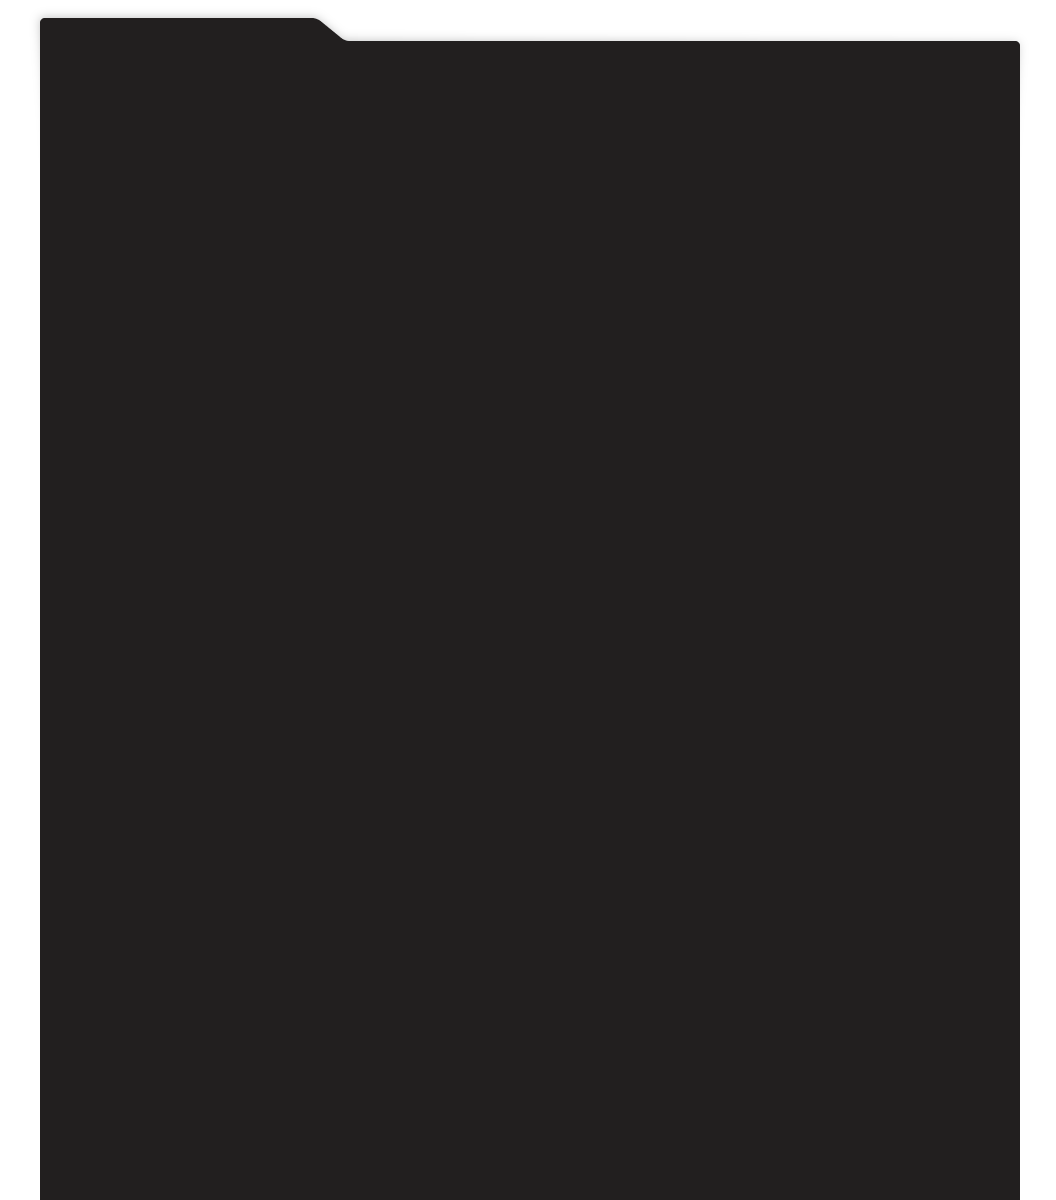
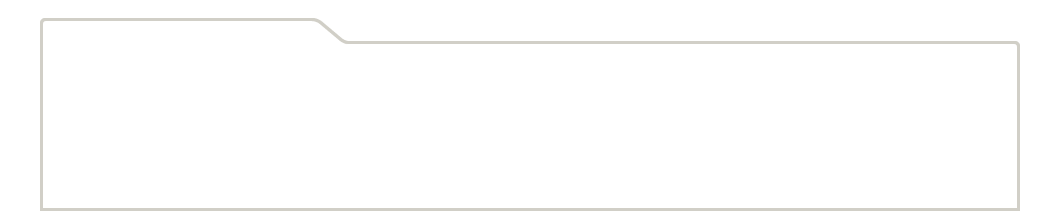
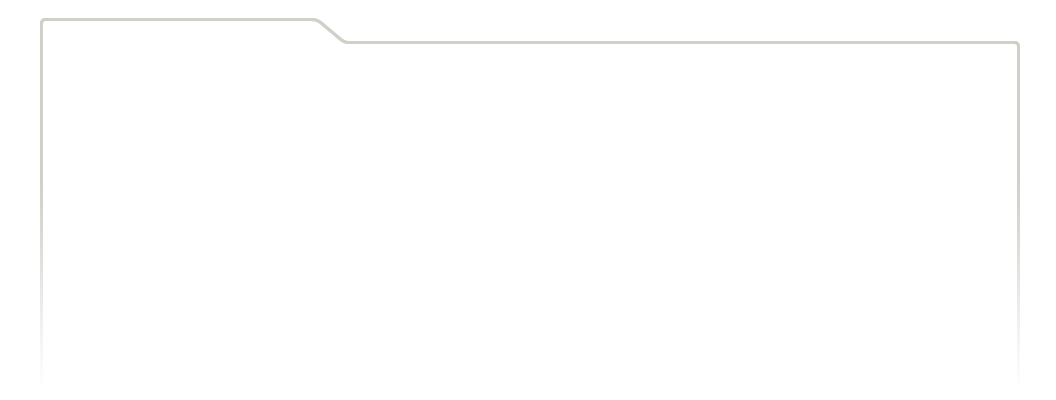
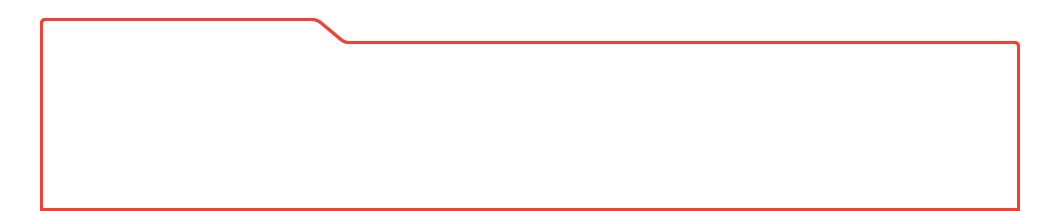
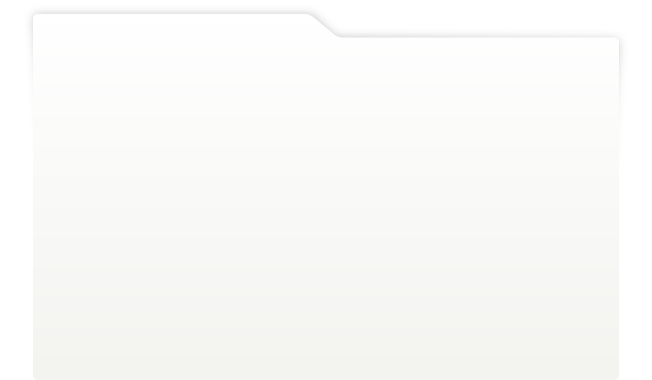
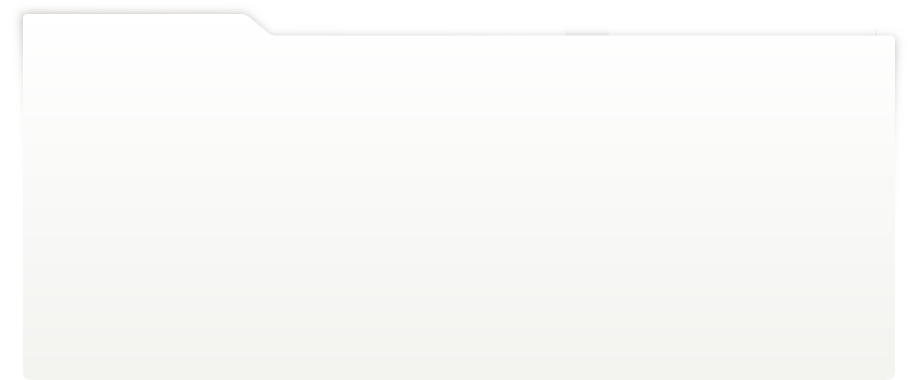
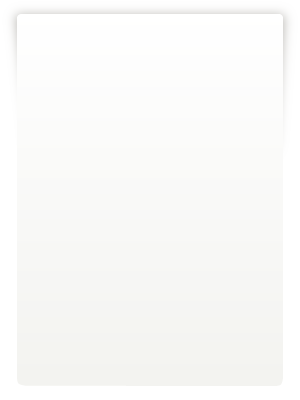
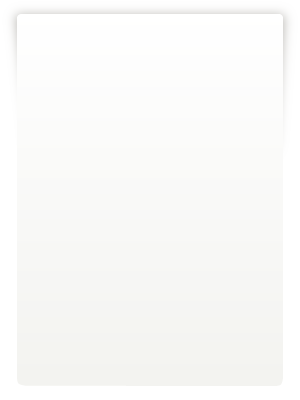
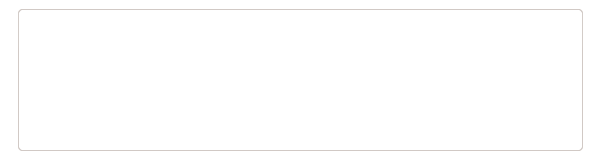
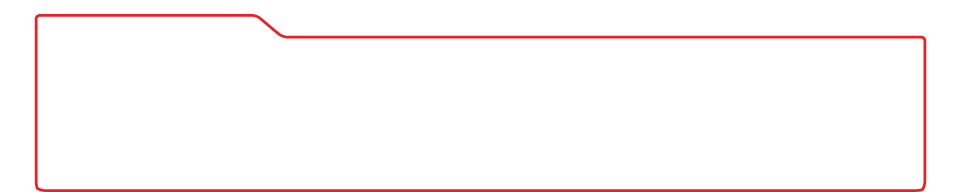
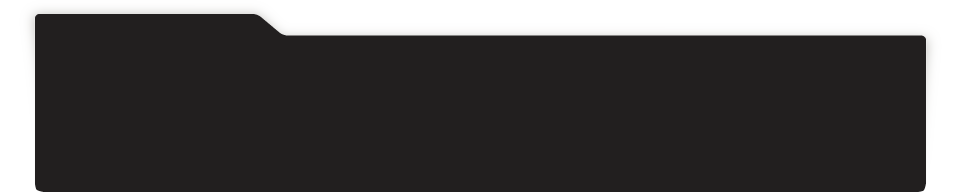
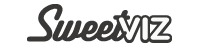
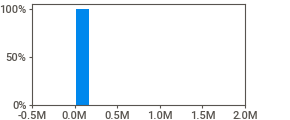
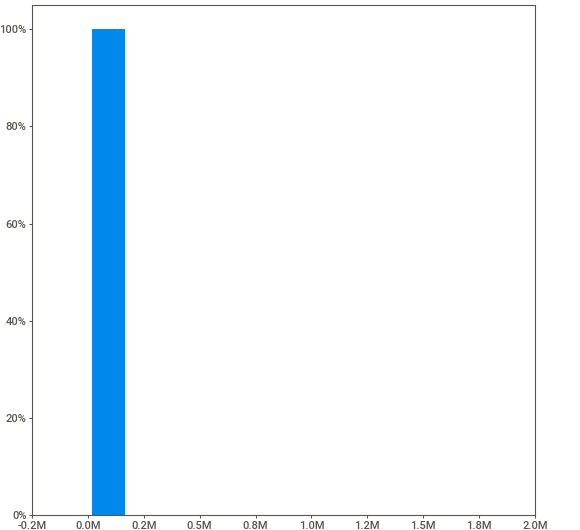
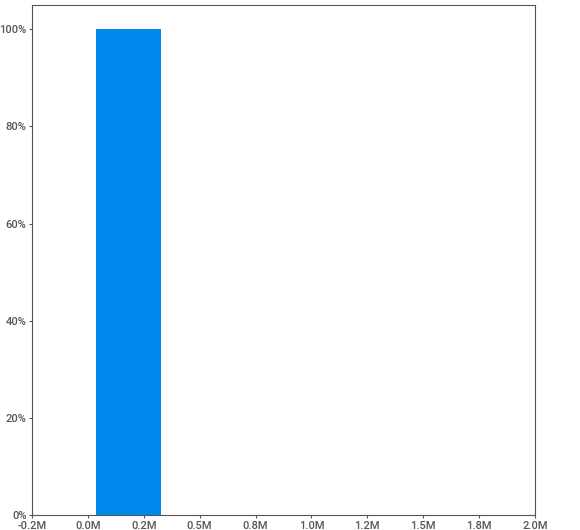
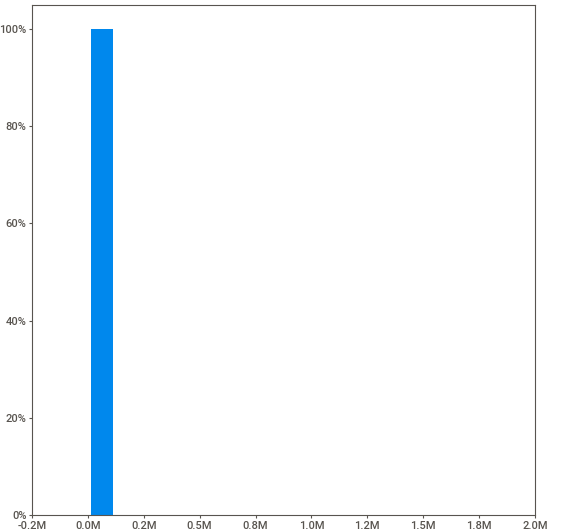
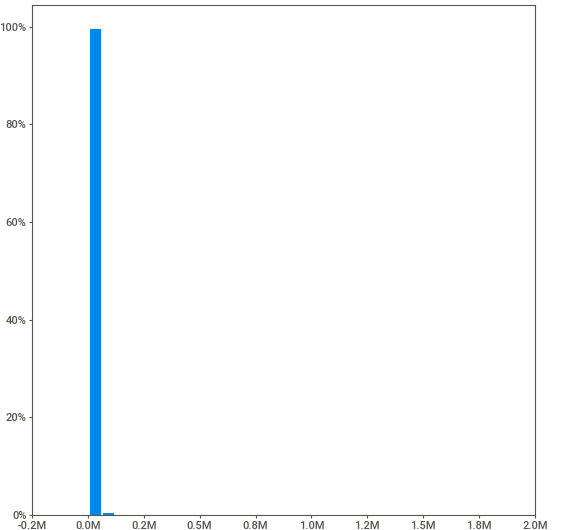
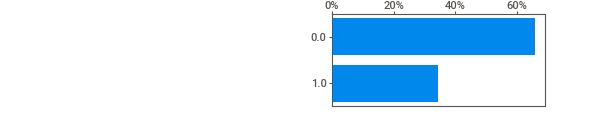
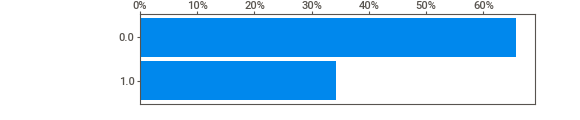
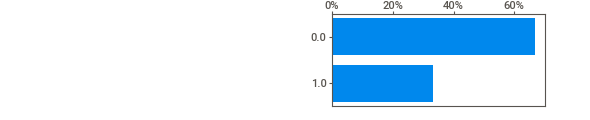
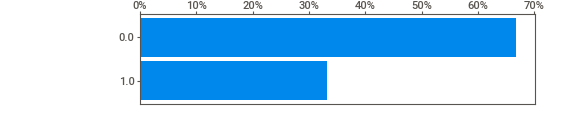
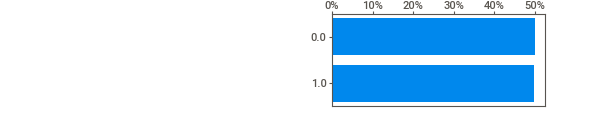
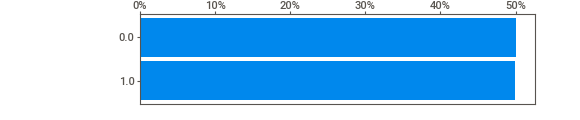
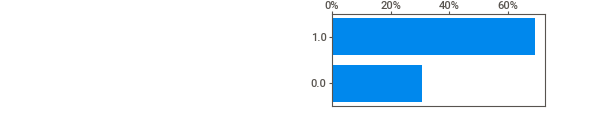
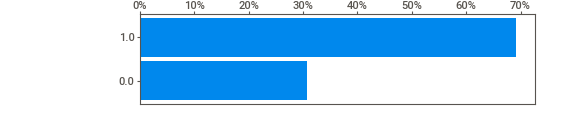
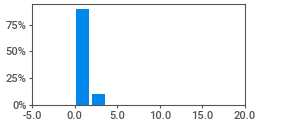
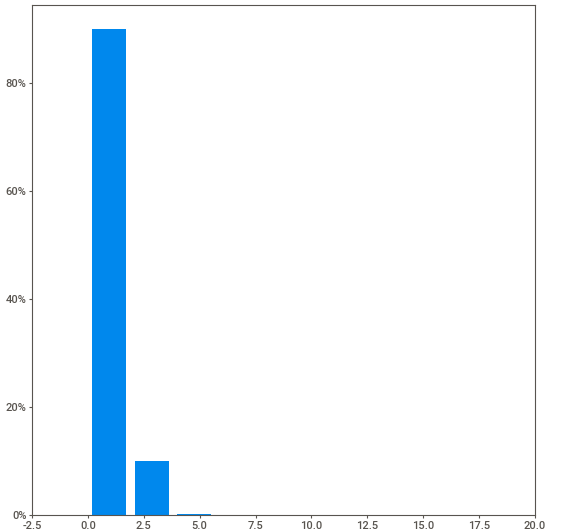
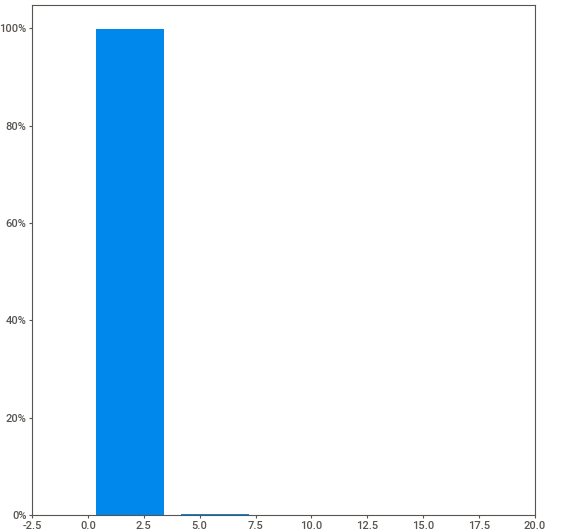
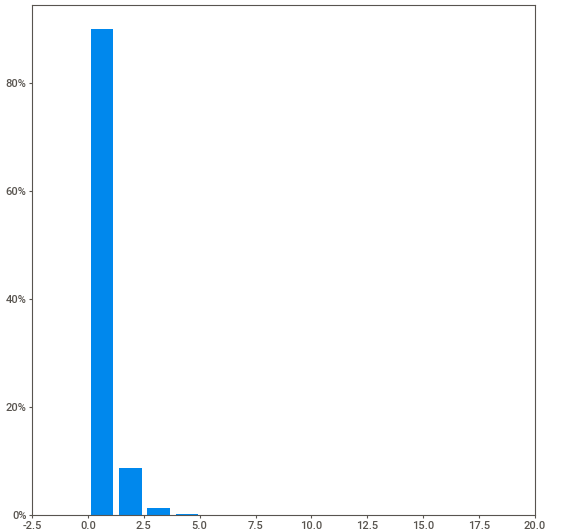
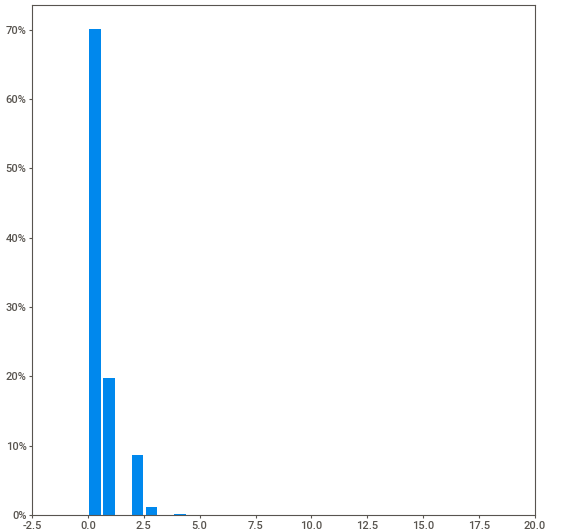
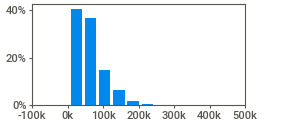
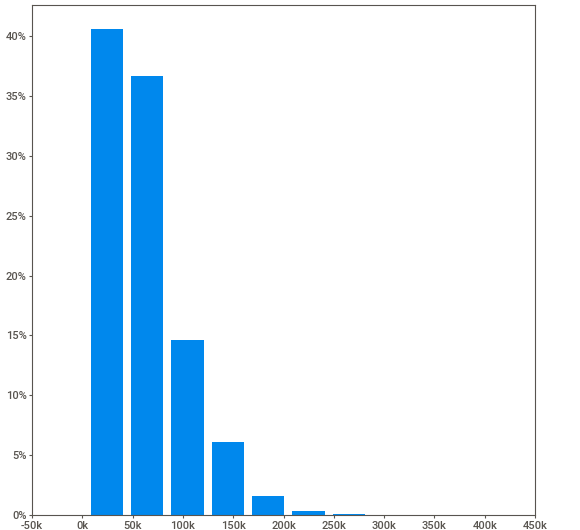
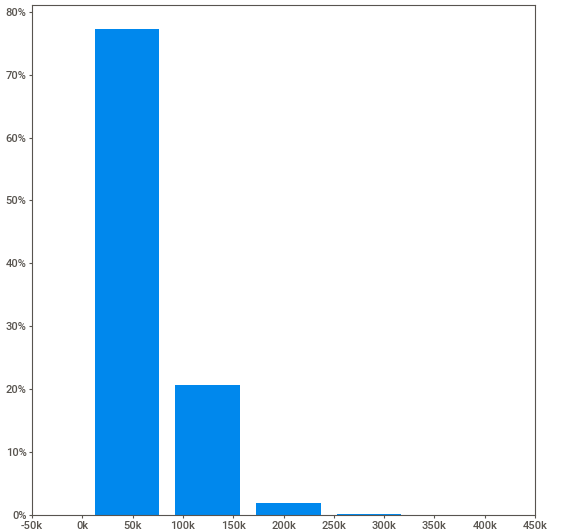
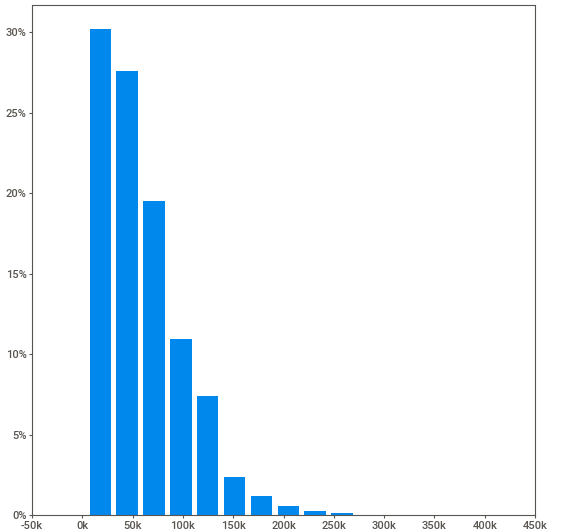
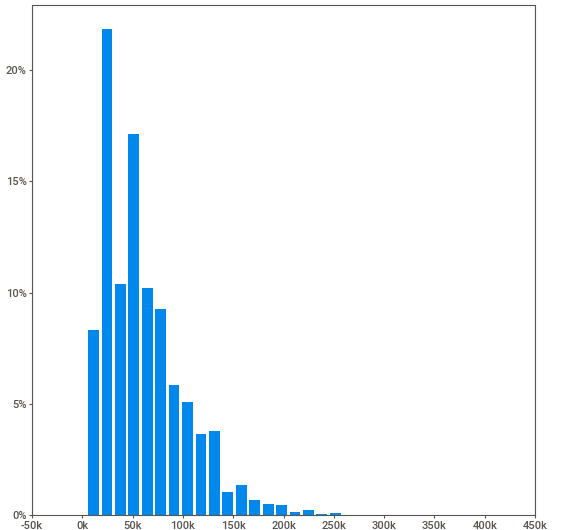
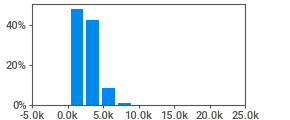
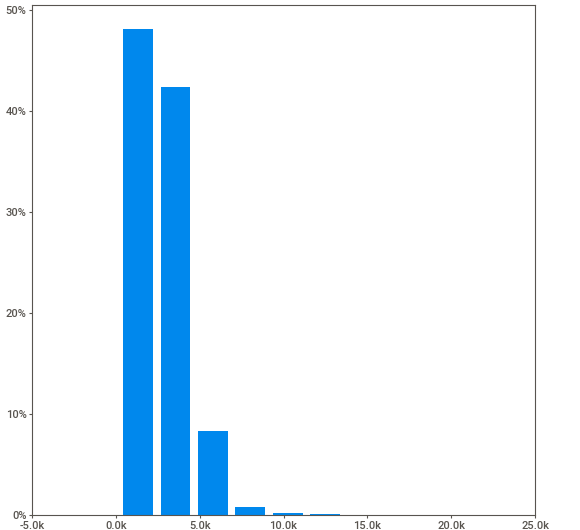
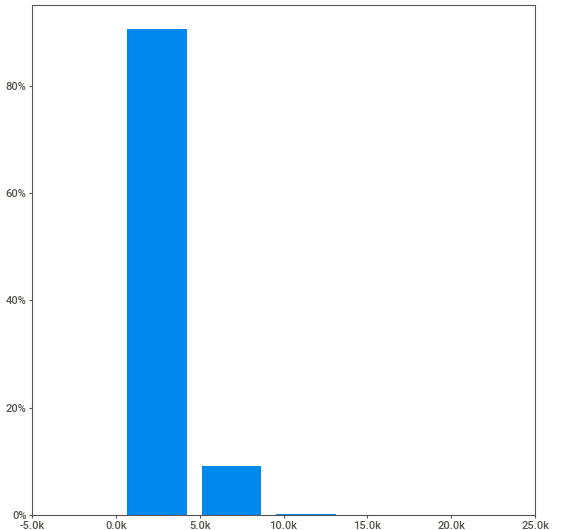
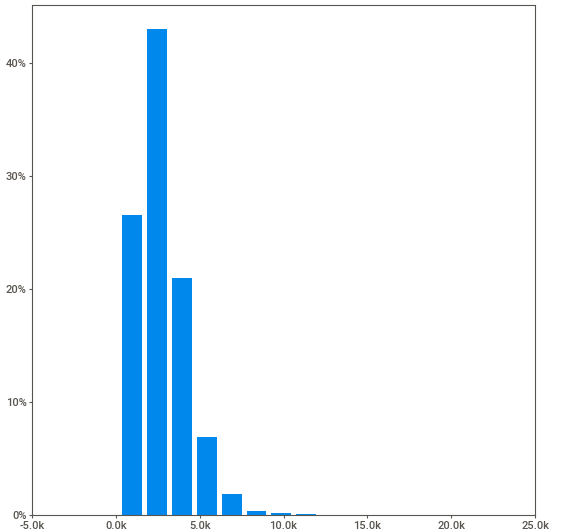
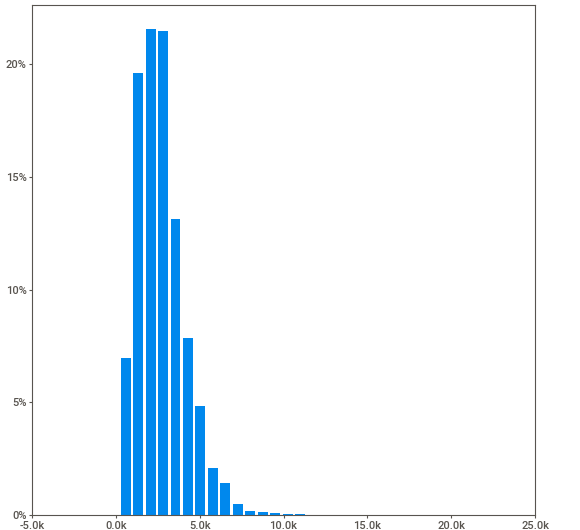
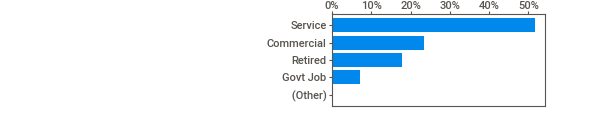
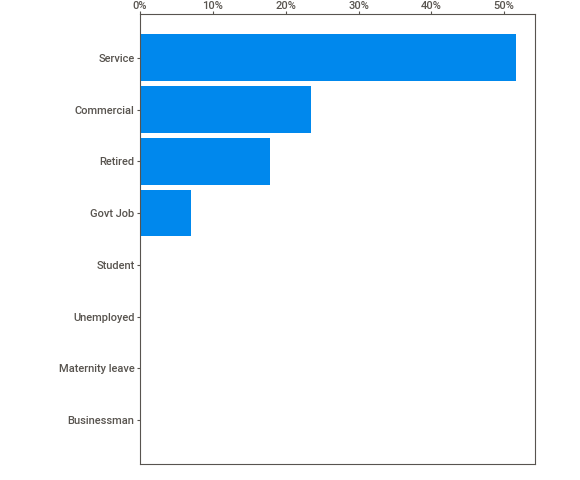
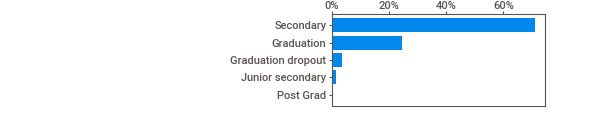
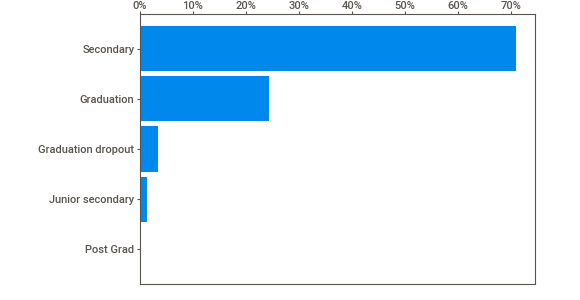
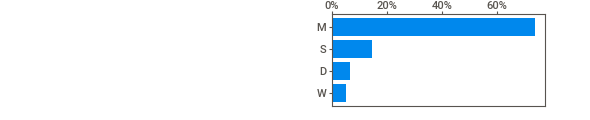
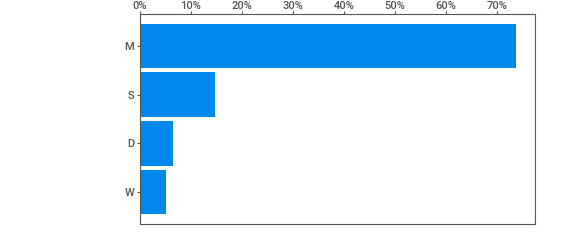
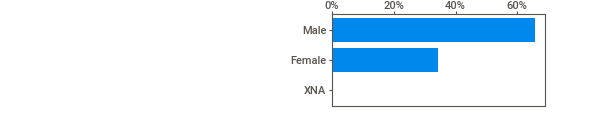
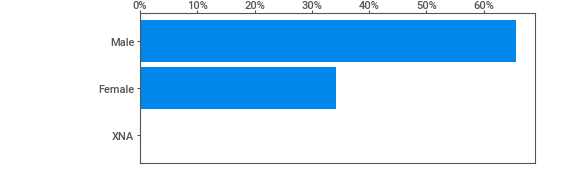
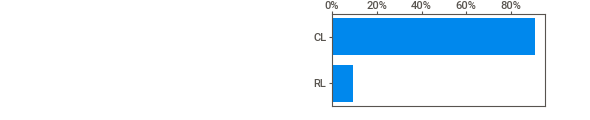
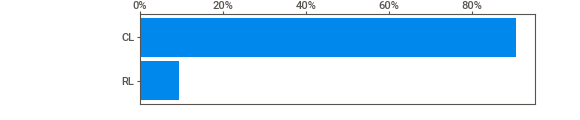
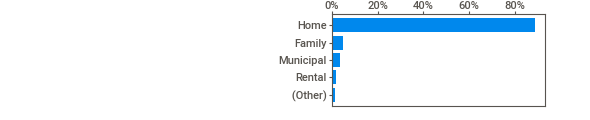
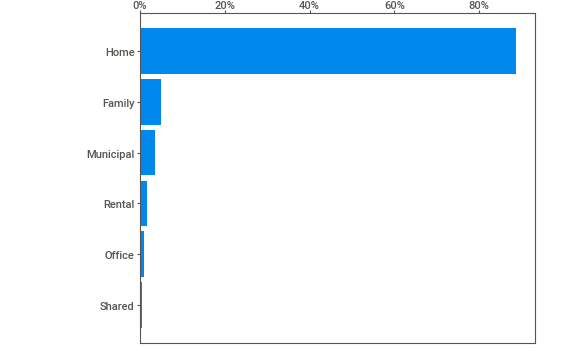
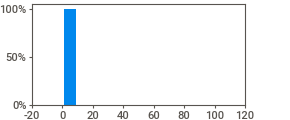
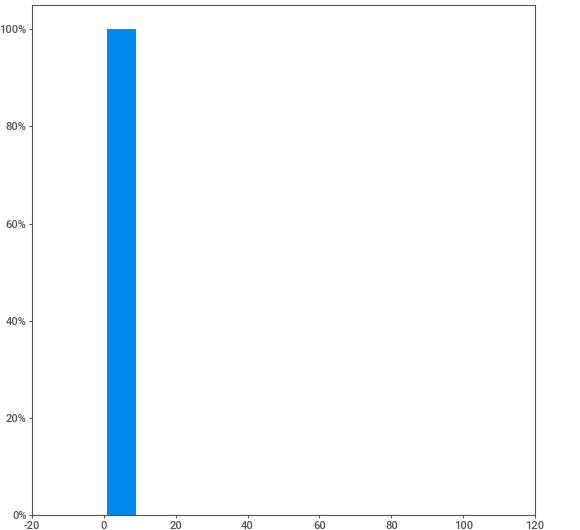
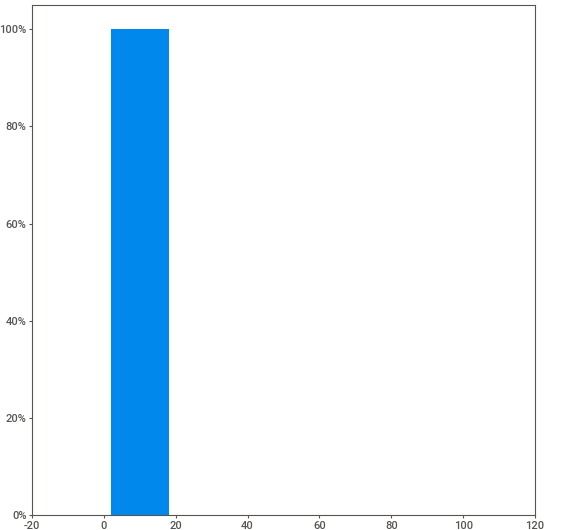
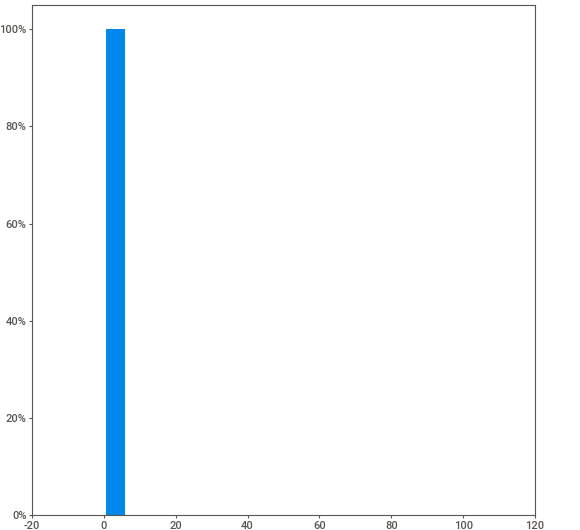
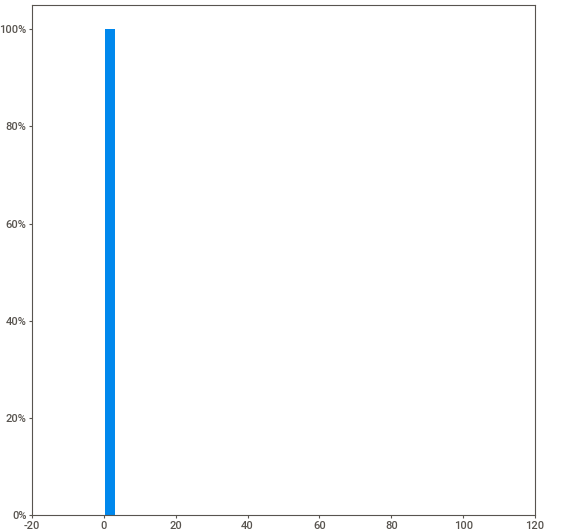
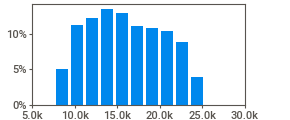
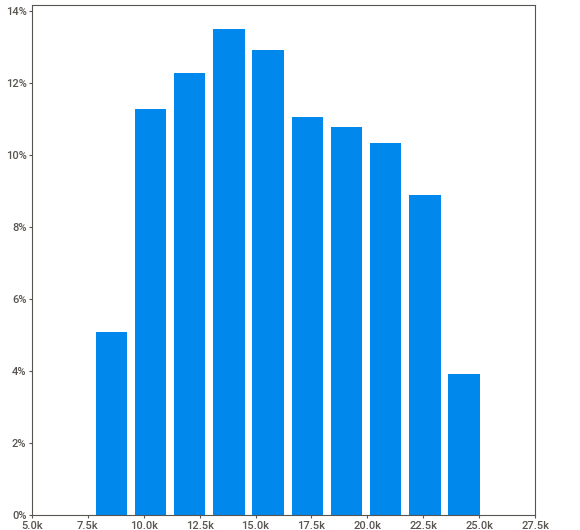
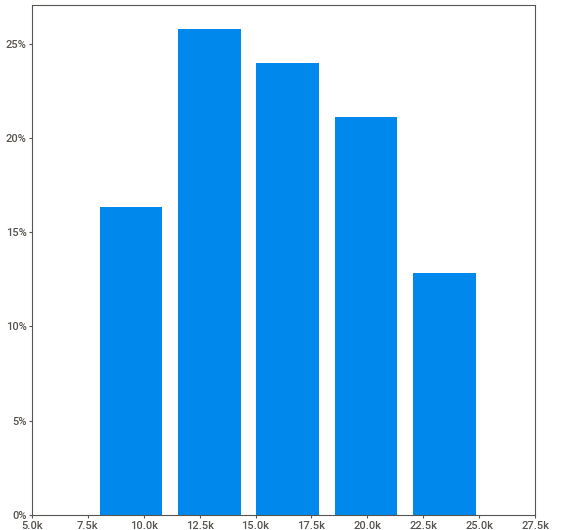
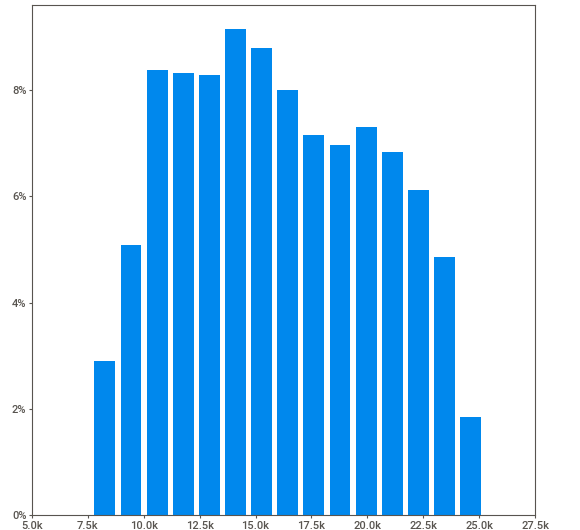
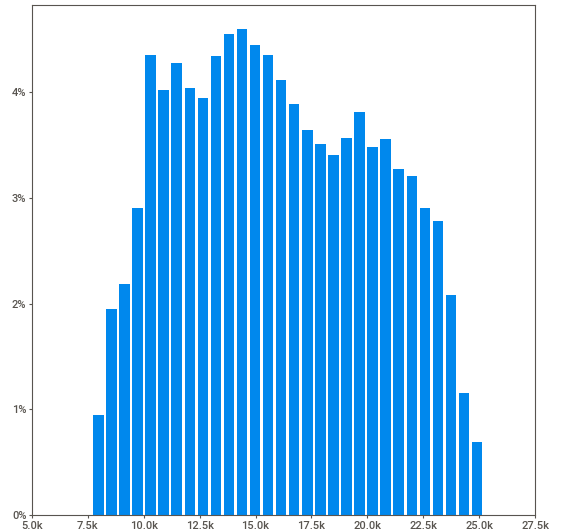
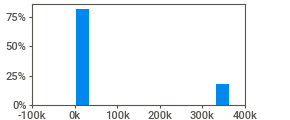
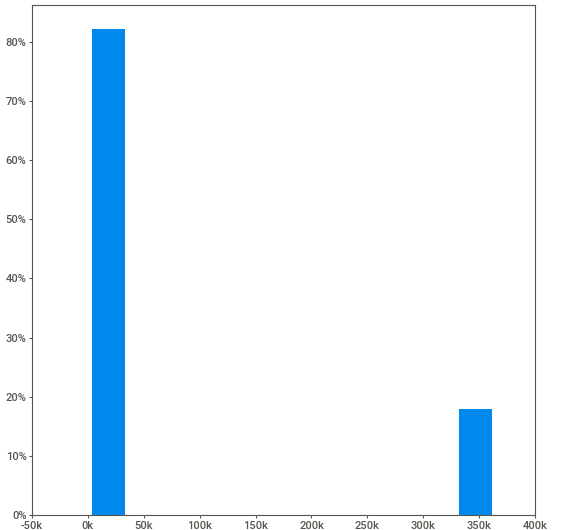
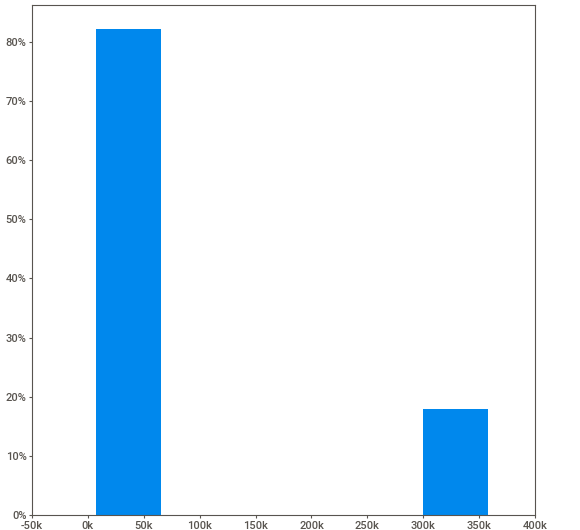
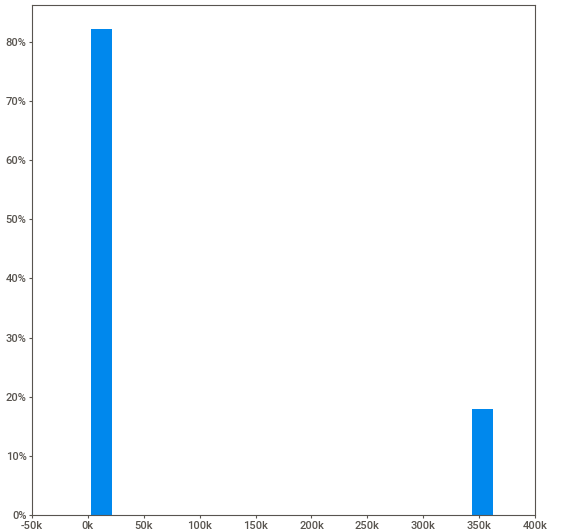
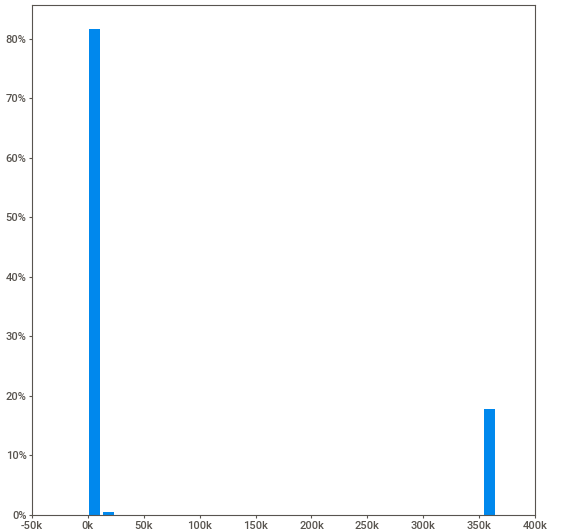
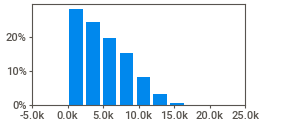
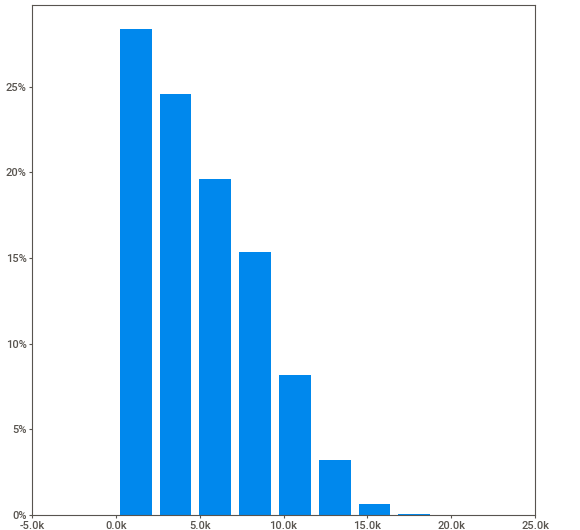
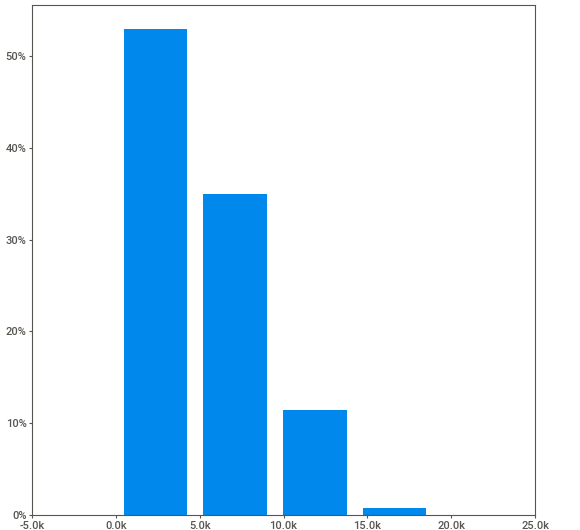
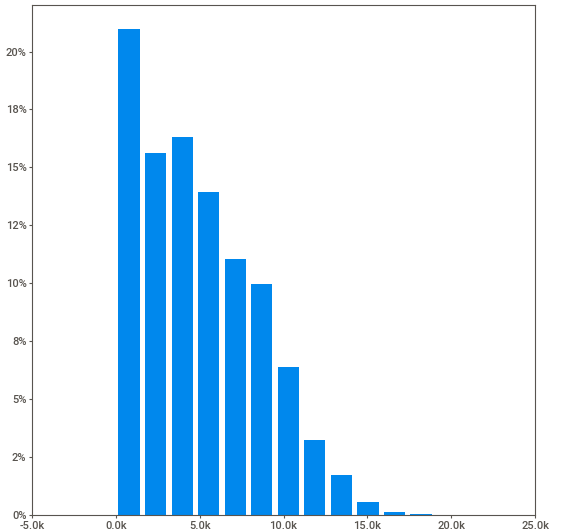
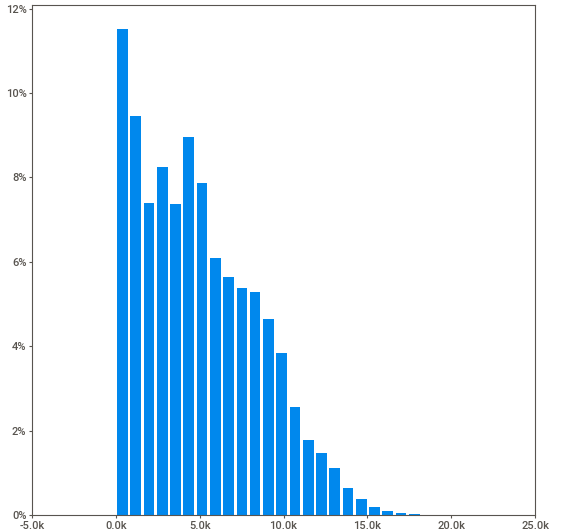
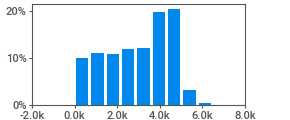
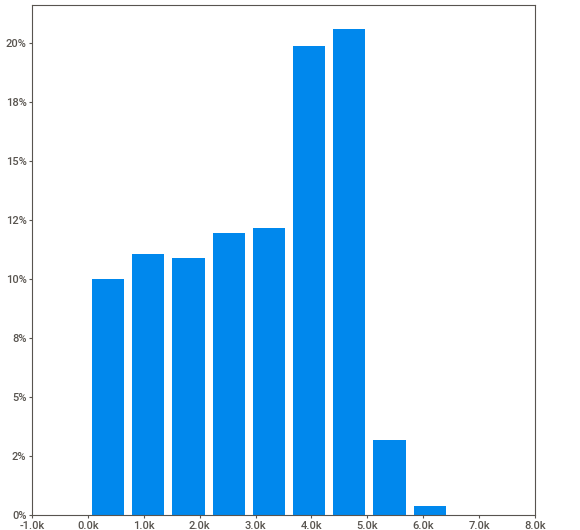
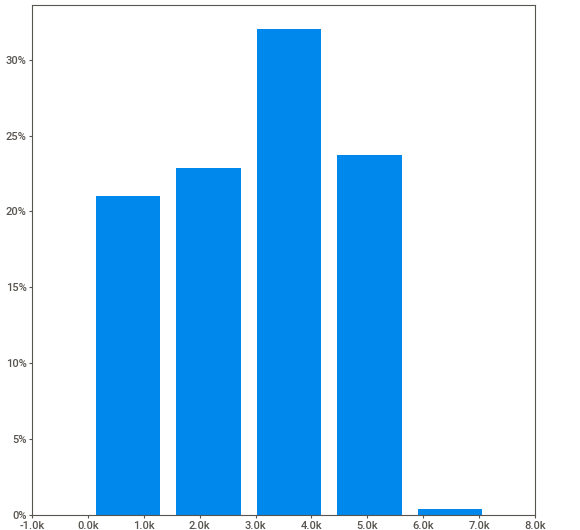
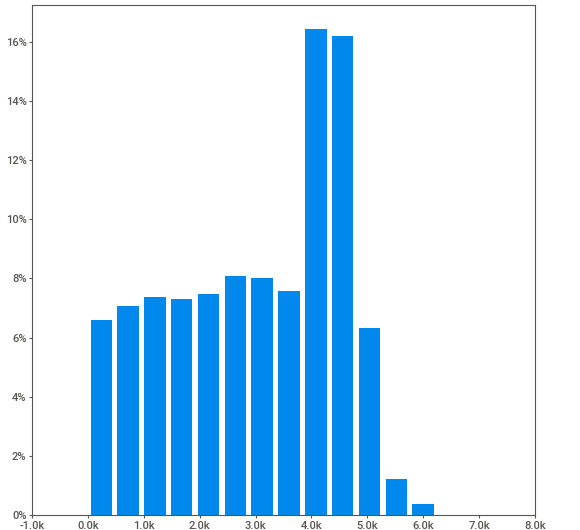
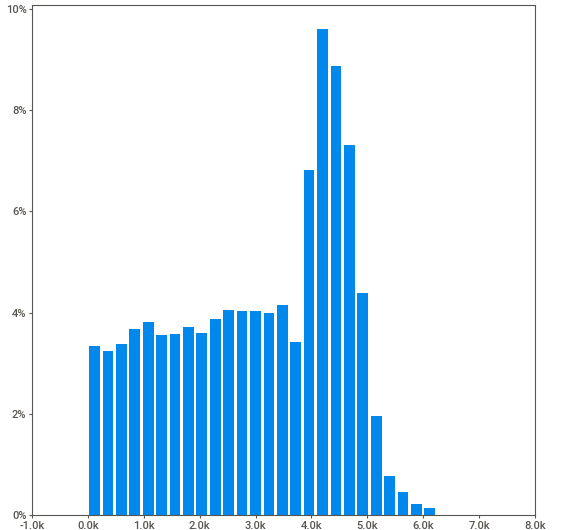
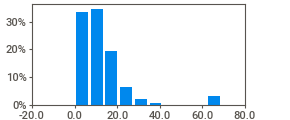
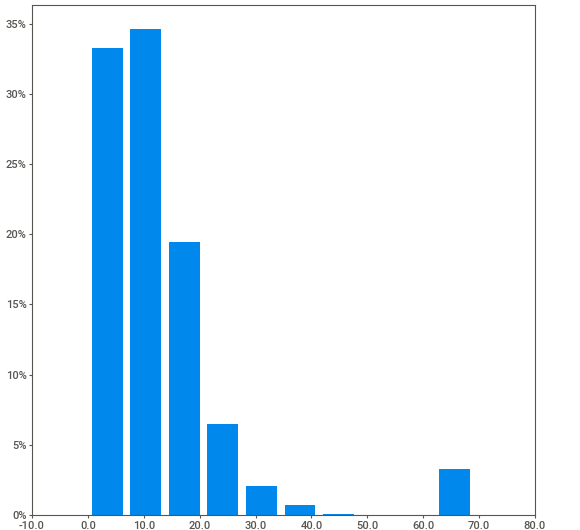
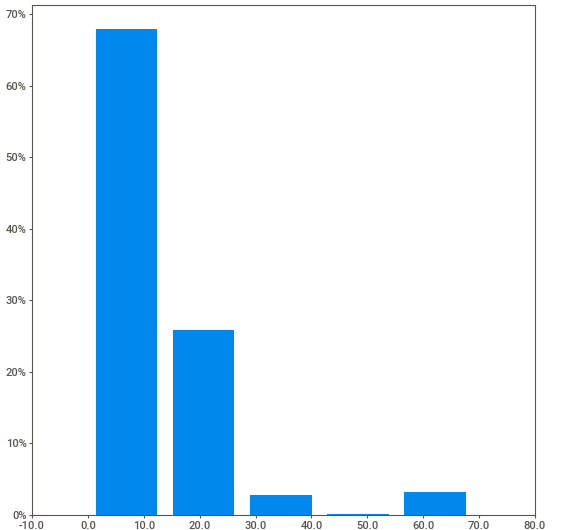
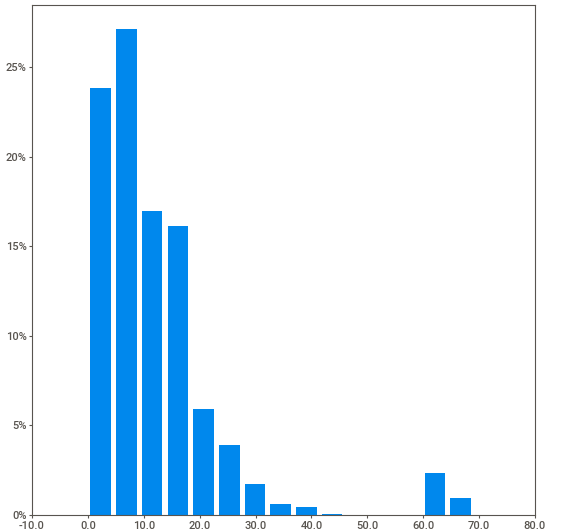
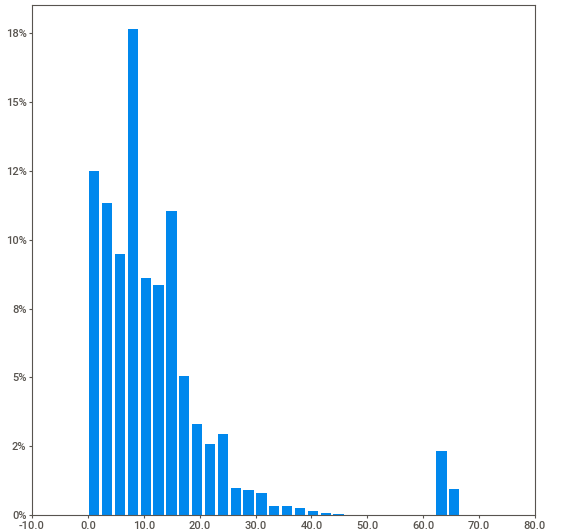
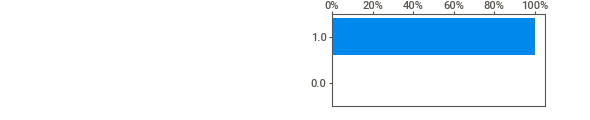
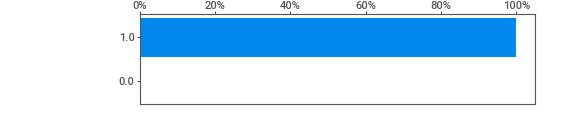
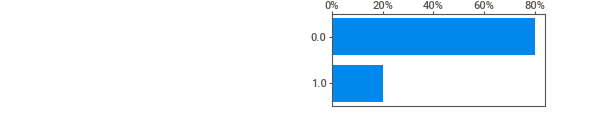
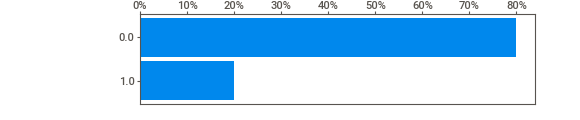
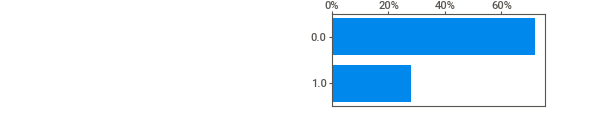
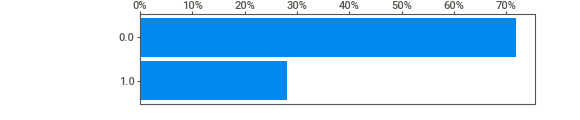
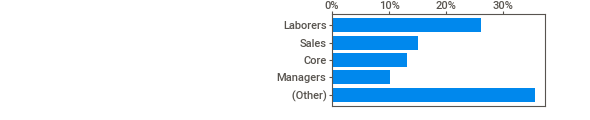
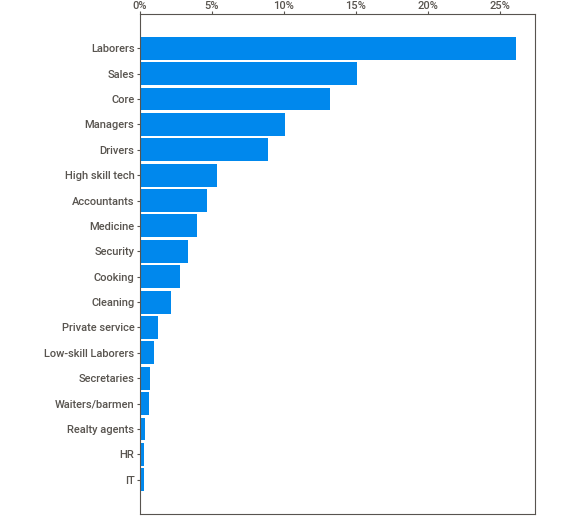
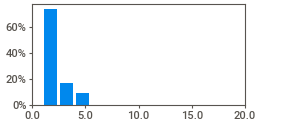
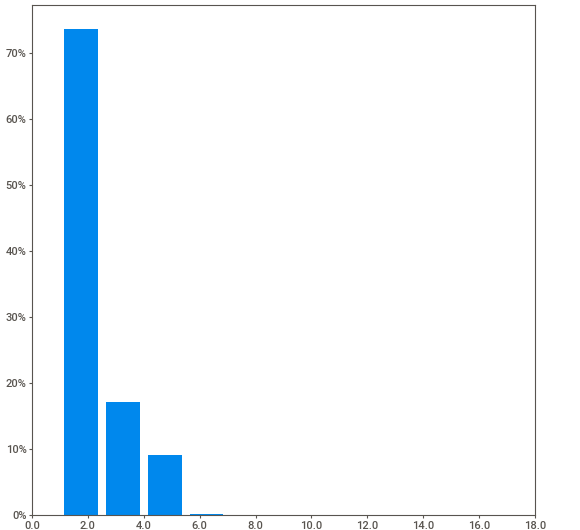
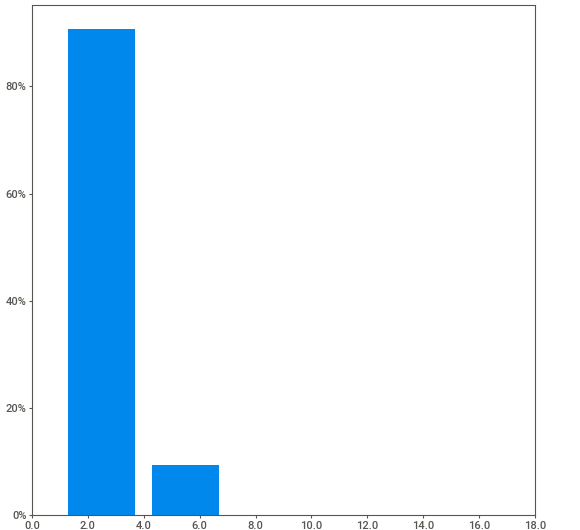
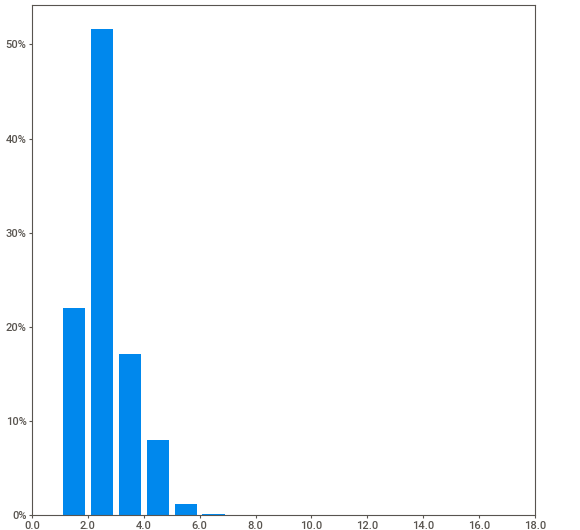
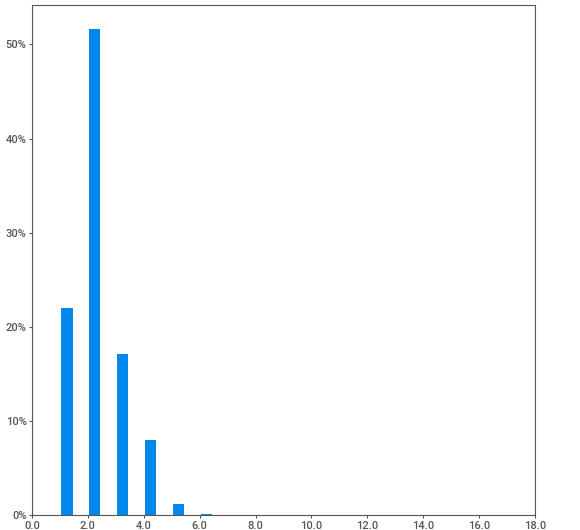
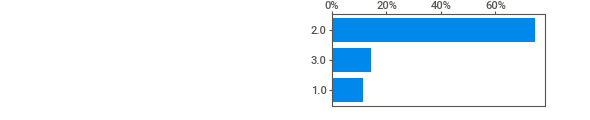
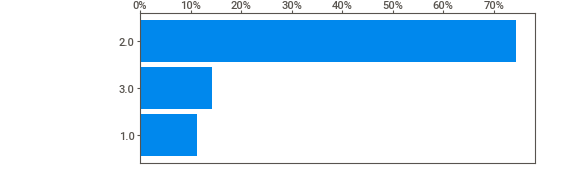
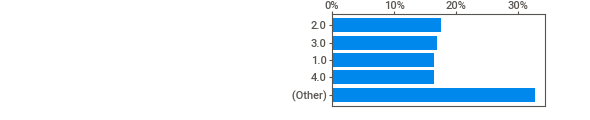
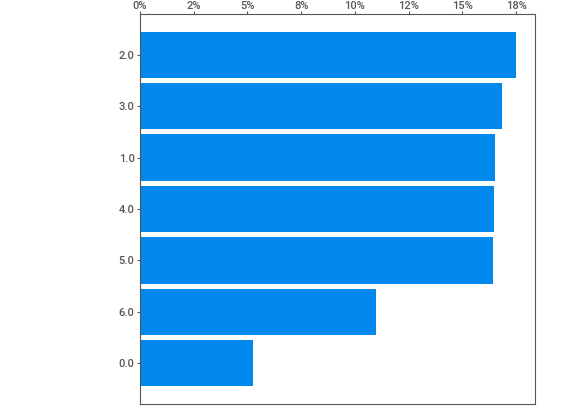
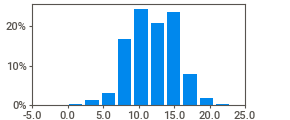
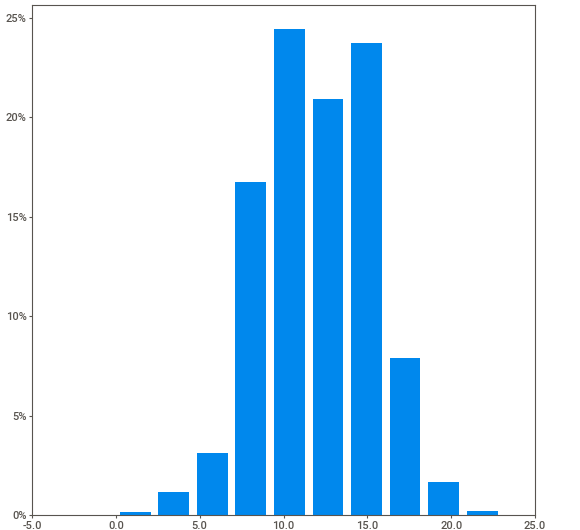
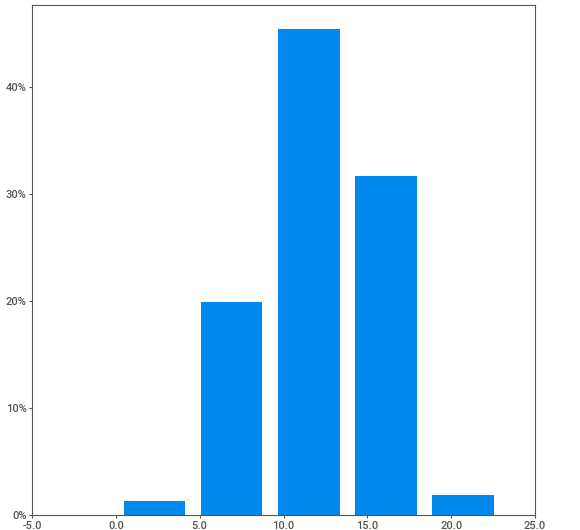
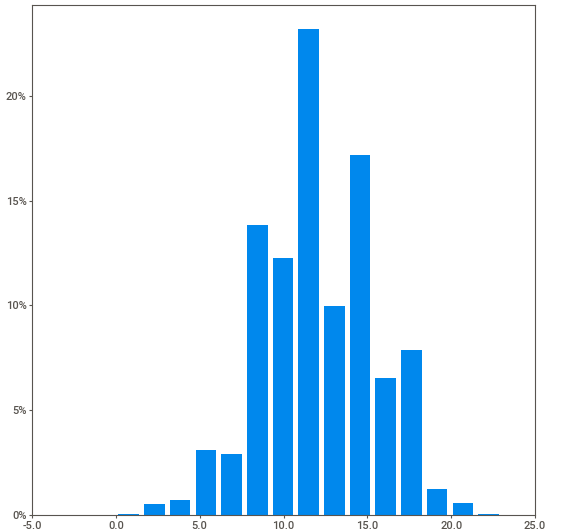
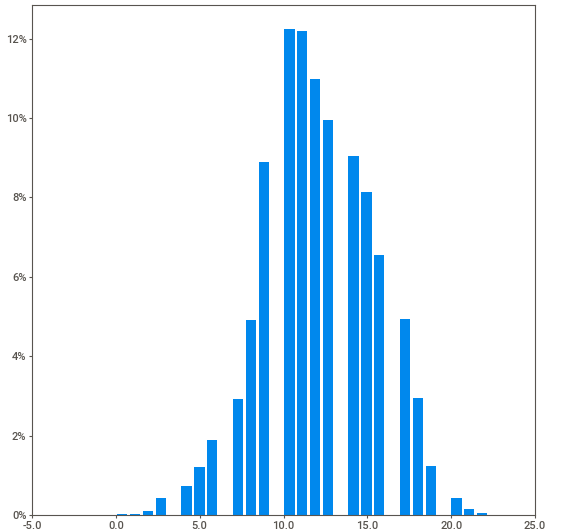
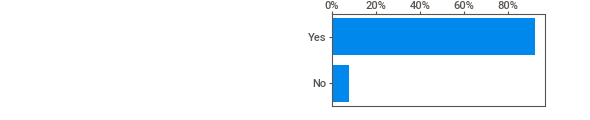
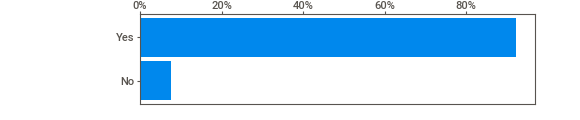
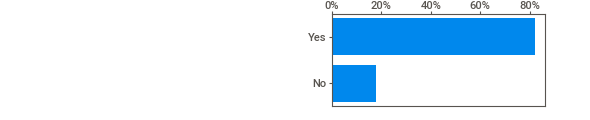
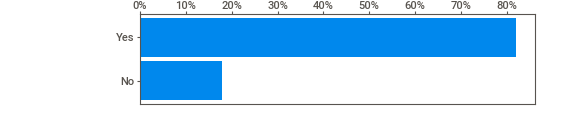
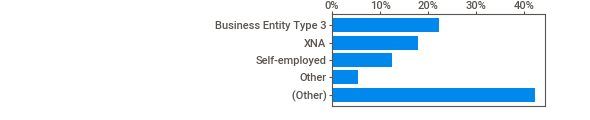
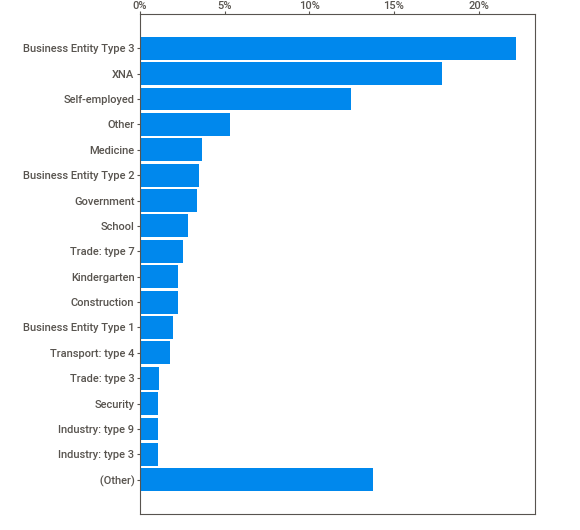
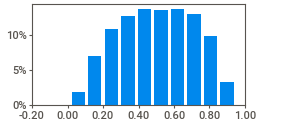
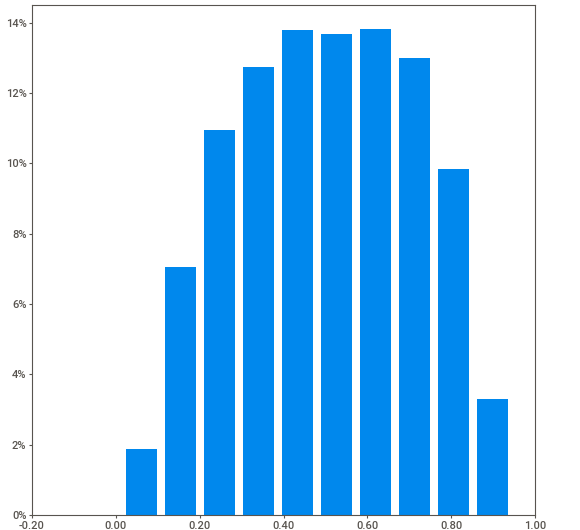
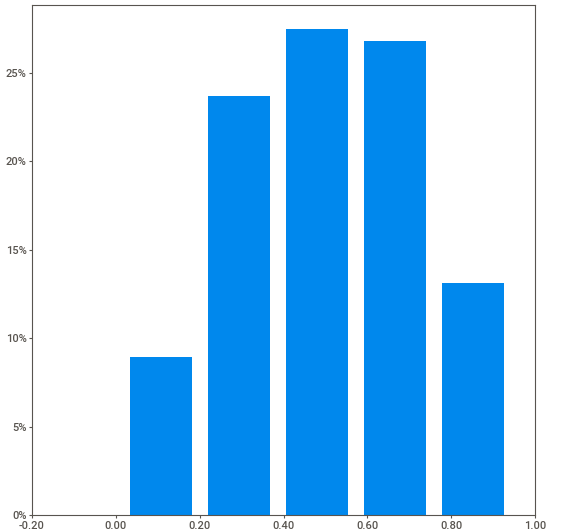
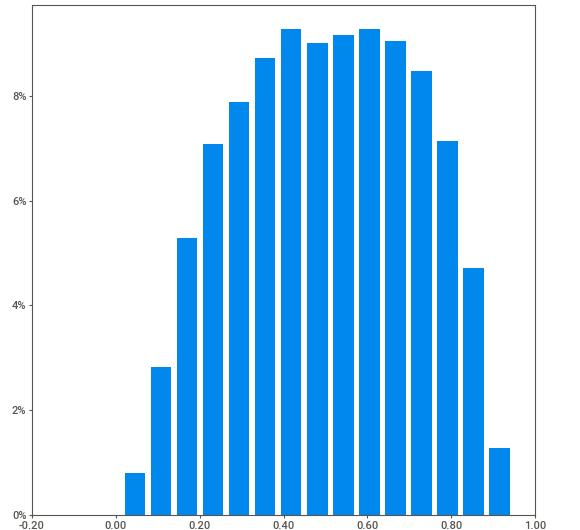
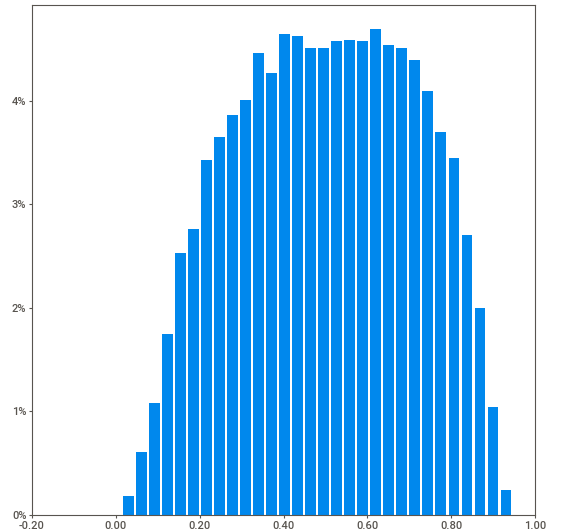
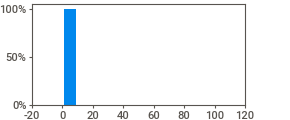
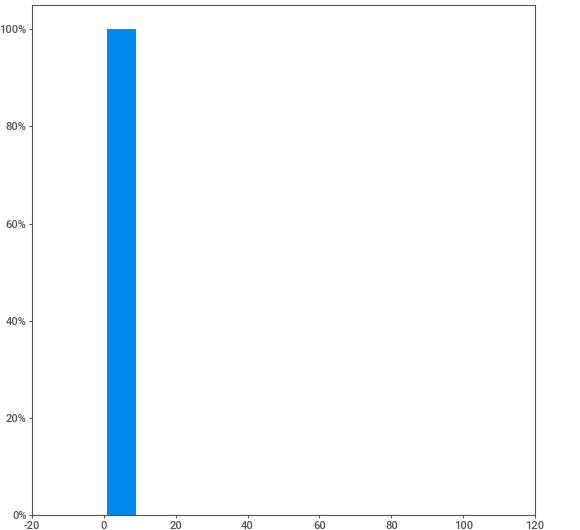
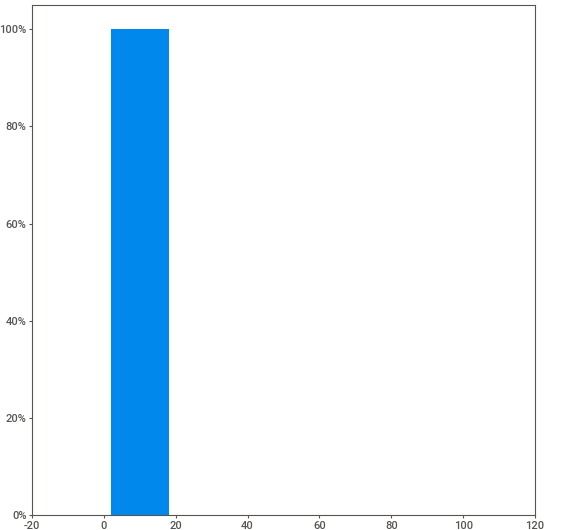
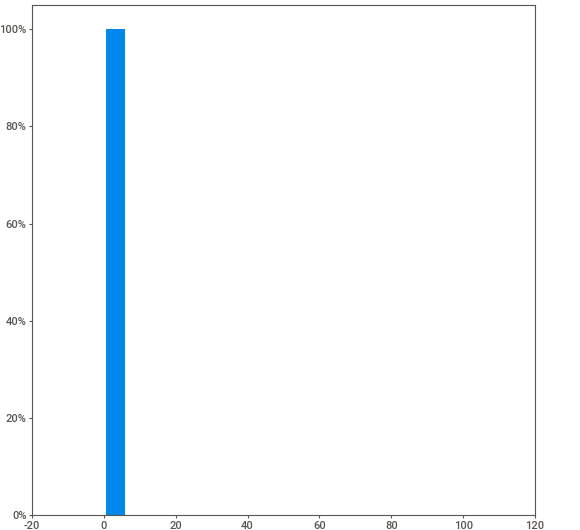
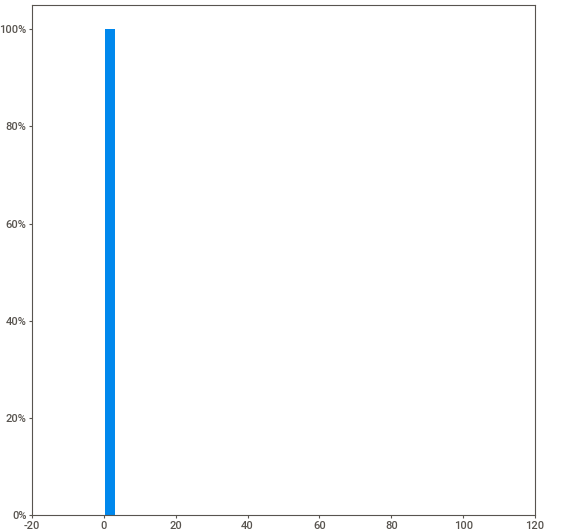
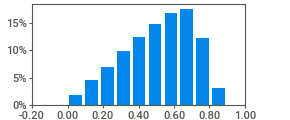
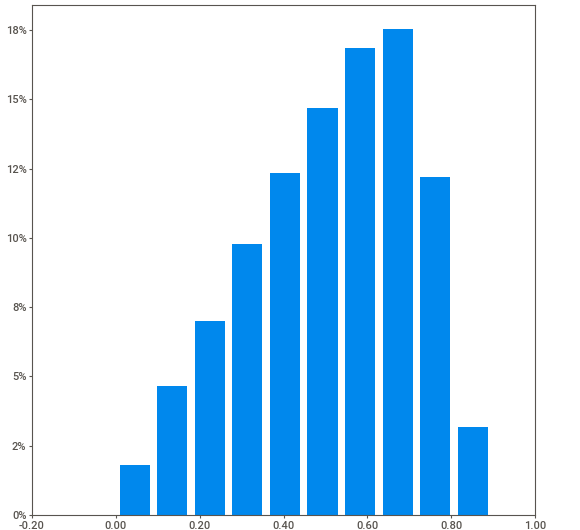
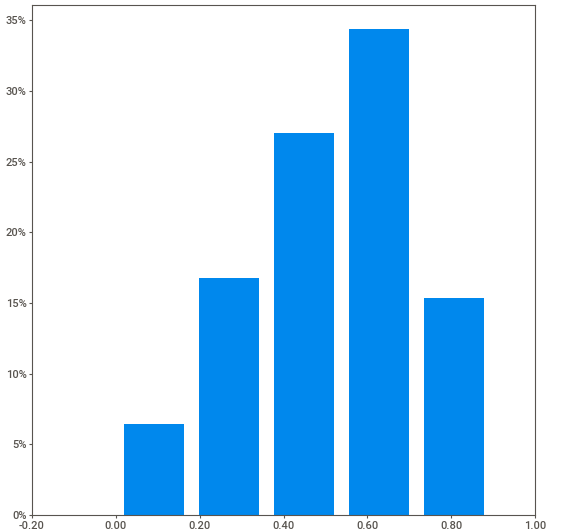
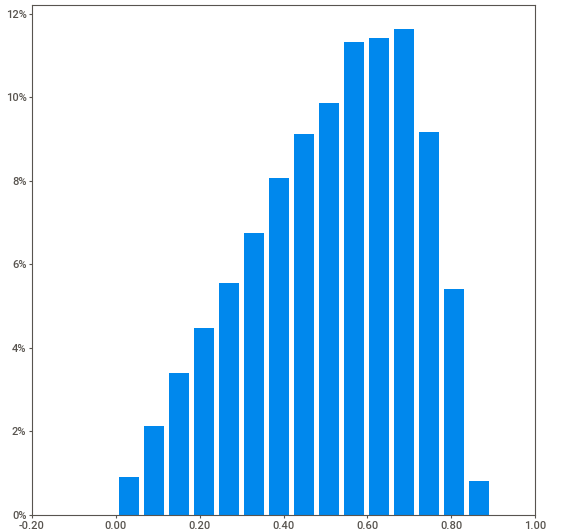
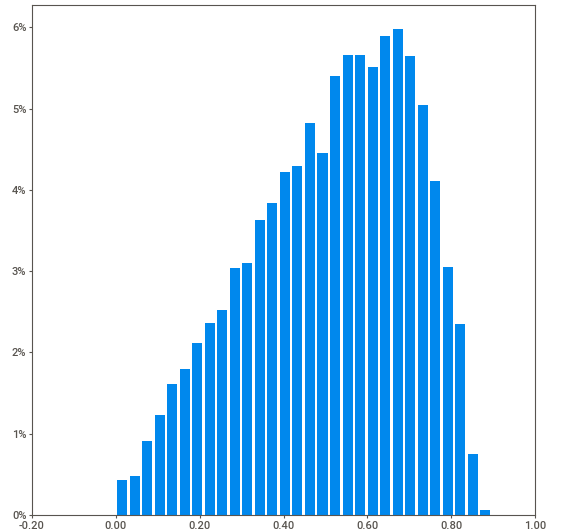
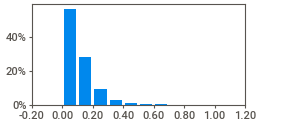
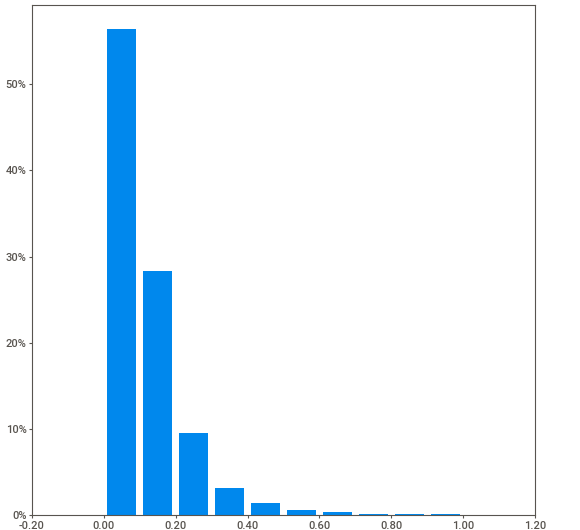
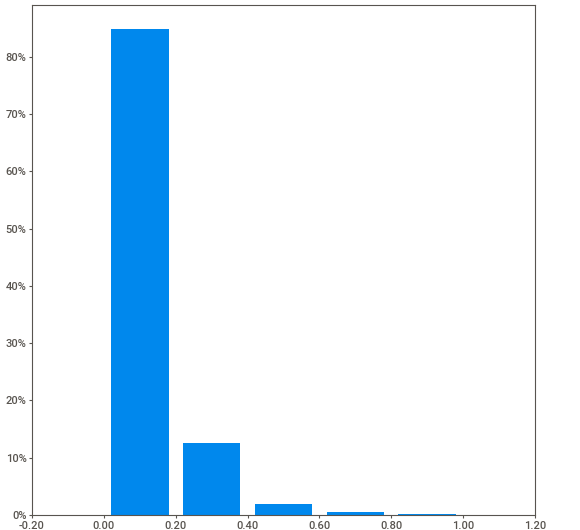
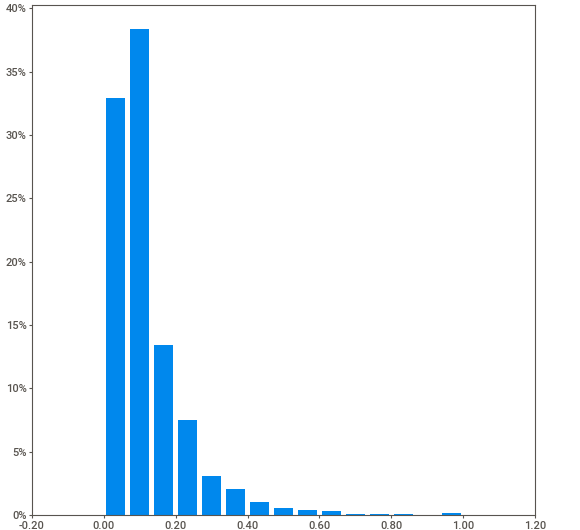
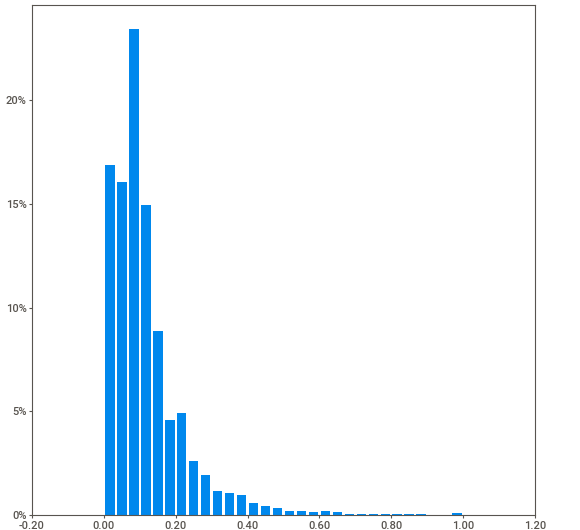
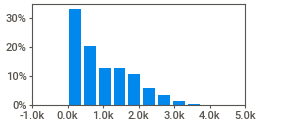
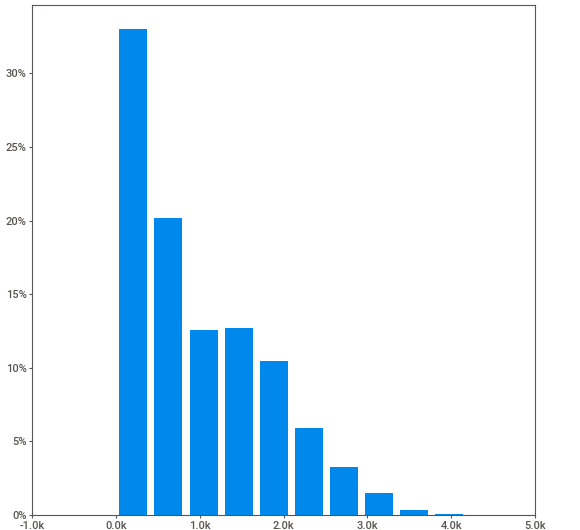
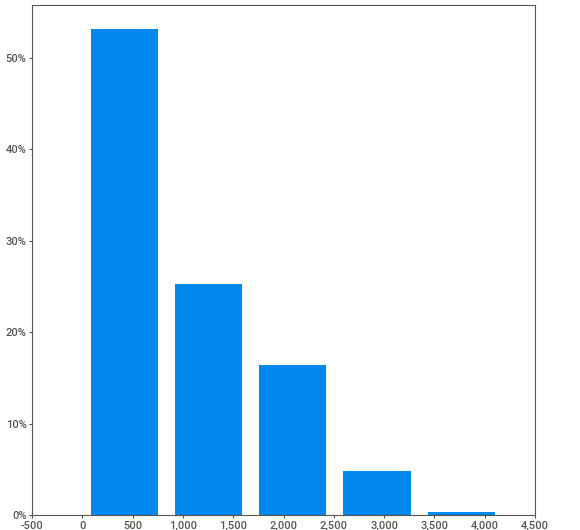
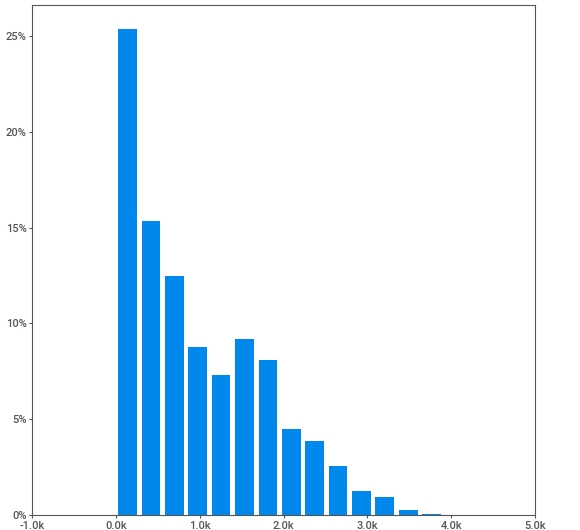
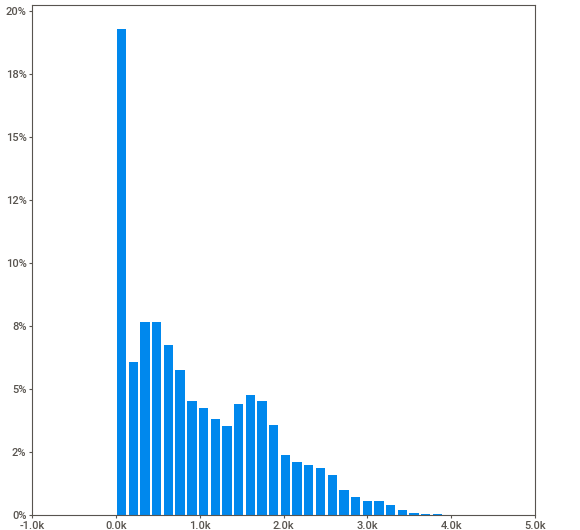
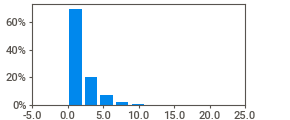
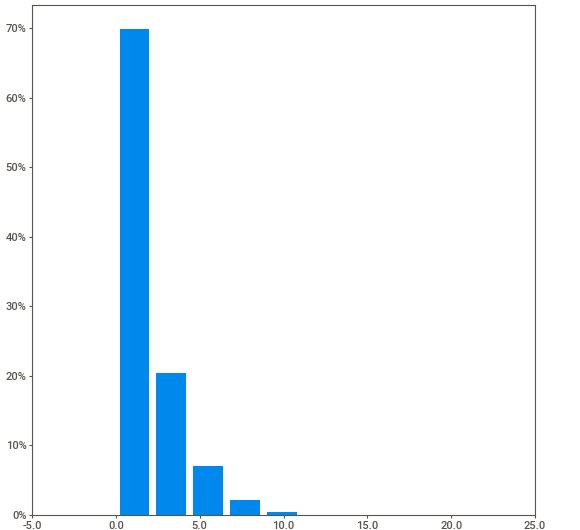
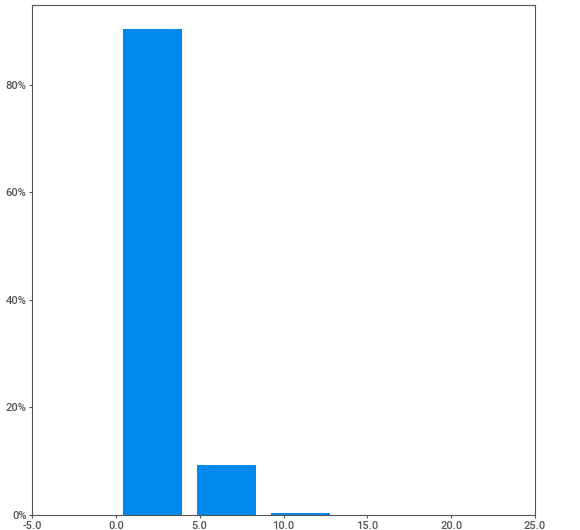
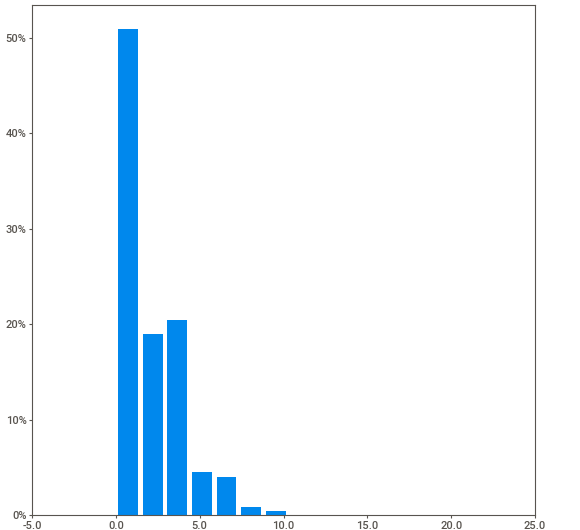
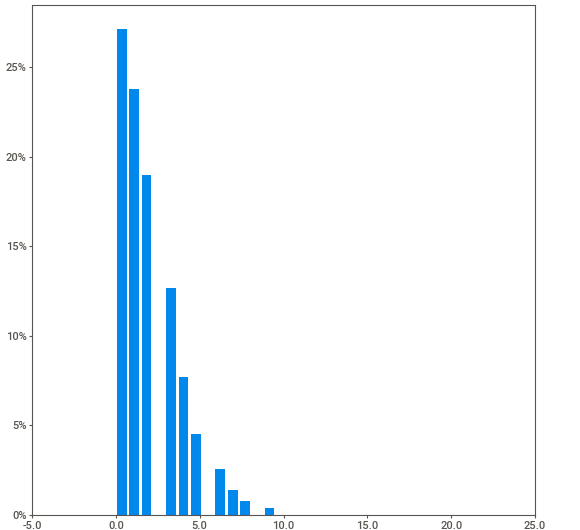
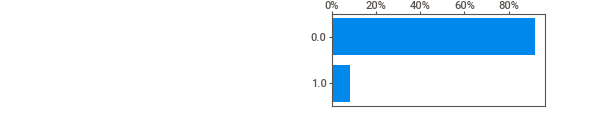
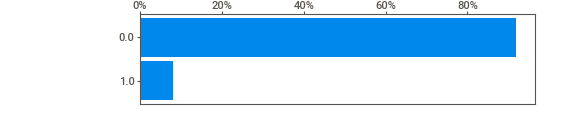
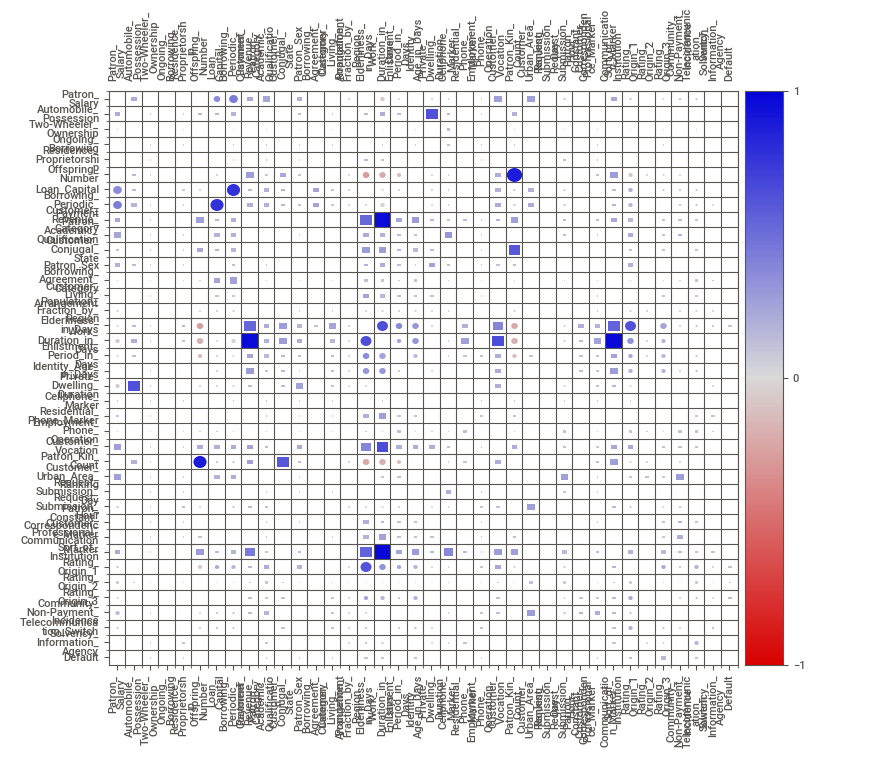
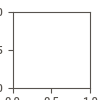

In [3]:
to_numeric_list = ['Rating_Origin_2', 'Rating_Origin_1', 'Elderliness_in_Days',
       'Enlistment_Period_in_Days', 'Borrowing_Periodic_Payment',
       'Work_Duration_in_Days', 'Identity_Age_in_Days', 'Loan_Capital',
       'Telecommunication_Switch', 'Community_Non-Payment_Incidence',
       'Patron_Salary', 'Rating_Origin_3', 'Population_Fraction_by_Region', 'Private_Dwelling_Duration',
       'Request_Submission_Hour', 'Solvency_Information_Agency','Patron_Kin_Count', 'Offspring_Number']
for col in to_numeric_list:
    df[col] = pd.to_numeric(df[col], errors='coerce')

sweet_report = sv.analyze(df)
### Saved the report in this file, in case notebook doesen't show the report.
report_name = "raw_data_EDA.html"
sweet_report.show_html(report_name)

sweet_report.show_notebook ()

## 2.2 Missing Treatment

<p style="color: red;">We are seeing almost all features with low missing values. We can impute them or remove the samples.</p>
<p style="color: pink;">But, for those columns which have more than 30% of missing values, it can affect the model's result if we impute them. Also, as a 2nd option, removal is not recommended since removing 30% of samples for one feature would be too drastic. The best thing to do is to remove those few features.</p>

In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
columns_to_remove = missing_percentage[missing_percentage > 30].index
df = df.drop(columns=columns_to_remove)
df.head()

0         Patron_Salary Automobile_Possession Two-Wheeler_Ownership  \
ID                                                                    
12142509         6750.0                   0.0                   0.0   
12138936        20250.0                   1.0                   0.0   
12181264        18000.0                   0.0                   0.0   
12188929        15750.0                   0.0                   0.0   
12133385        33750.0                   1.0                   0.0   

0        Ongoing_Borrowing Residence_Proprietorship  Offspring_Number  \
ID                                                                      
12142509               1.0                      0.0               0.0   
12138936               1.0                     None               0.0   
12181264               1.0                      0.0               1.0   
12188929               1.0                      1.0               0.0   
12133385               1.0                      0.0               2.0   

0         Loan_Capital  Borrowing_Periodic_Payment Customer_Revenue_Category  \
ID                                                                             
12142509      61190.55                     3416.85                Commercial   
12138936      15282.00                     1826.55                   Service   
12181264      59527.35                     2788.20                   Service   
12188929      53870.40                     2295.45                   Retired   
12133385     133988.40                     3547.35                Commercial   

0        Patron_Academic_Qualification Customer_Conjugal_State Patron_Sex  \
ID                                                                          
12142509                     Secondary                       M       Male   
12138936                    Graduation                       M       Male   
12181264            Graduation dropout                       W       Male   
12188929                     Secondary                       M       Male   
12133385                     Secondary                       M     Female   

0        Borrowing_Agreement_Category Customer_Living_Arrangement  \
ID                                                                  
12142509                           CL                        Home   
12138936                           CL                        Home   
12181264                           CL                      Family   
12188929                           CL                        Home   
12133385                           CL                        Home   

0         Population_Fraction_by_Region  Elderliness_in_Days  \
ID                                                             
12142509                       0.028663              13957.0   
12138936                       0.008575              14162.0   
12181264                       0.022800              16790.0   
12188929                       0.010556              23195.0   
12133385                       0.020713              11366.0   

0         Work_Duration_in_Days  Enlistment_Period_in_Days  \
ID                                                           
12142509                 1062.0                     6123.0   
12138936                 4129.0                     7833.0   
12181264                 5102.0                        NaN   
12188929               365243.0                        NaN   
12133385                 2977.0                     5516.0   

0         Identity_Age_in_Days Cellphone_Marker Residential_Phone_Marker  \
ID                                                                         
12142509                 383.0              1.0                      1.0   
12138936                  21.0              1.0                      0.0   
12181264                 331.0              1.0                      0.0   
12188929                 775.0              1.0                      0.0   
12133385                4043.0              1.0                  

## 2.3 Outlier Treatment + Data Imputation

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)      


Report processed_data_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



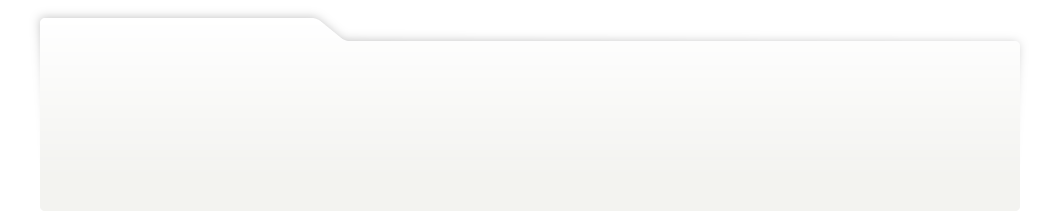
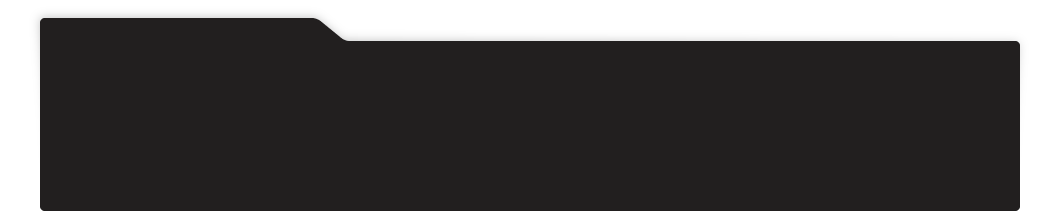
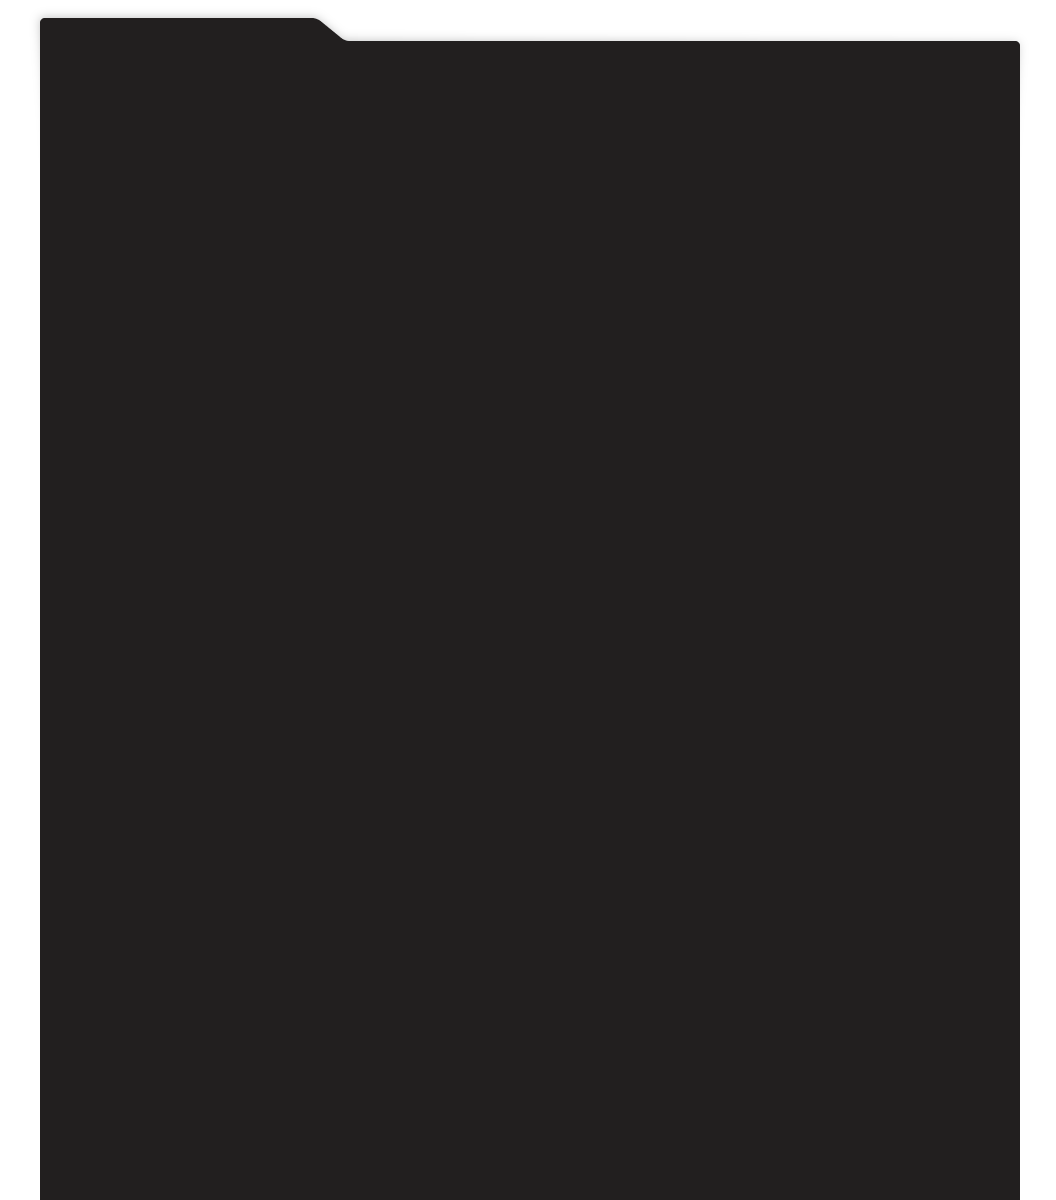
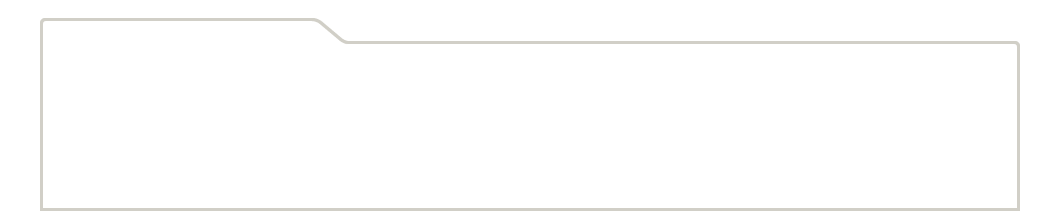
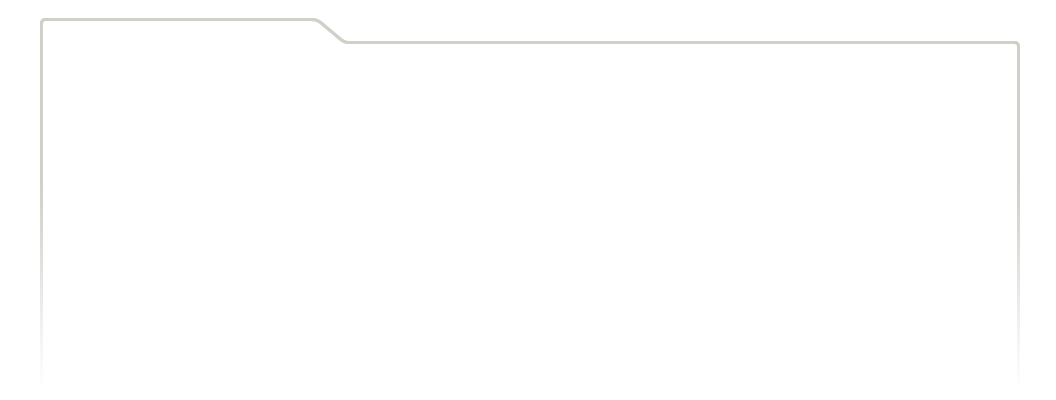
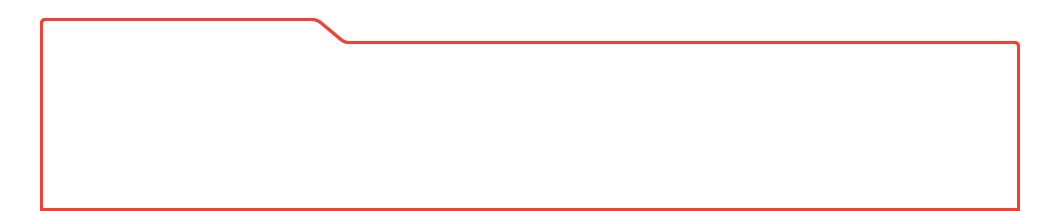
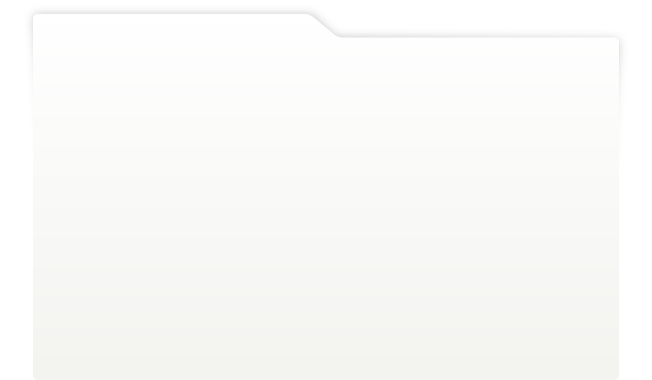
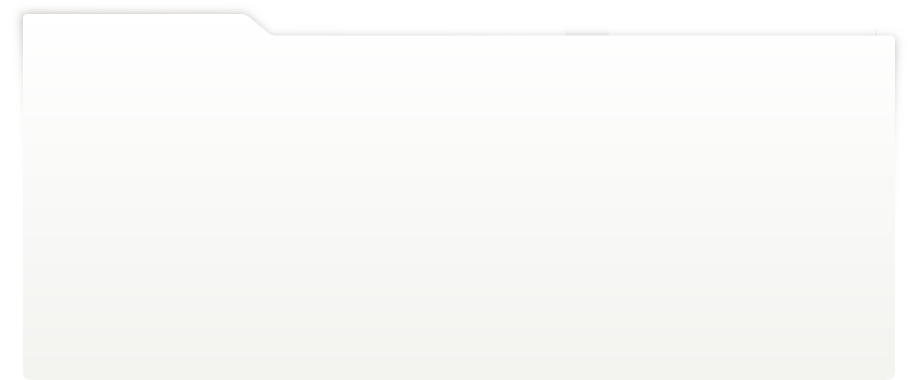
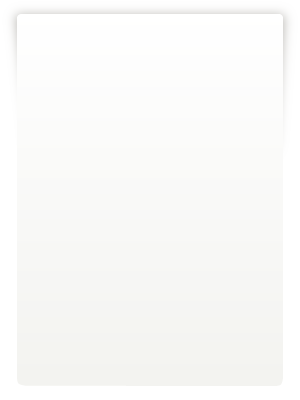
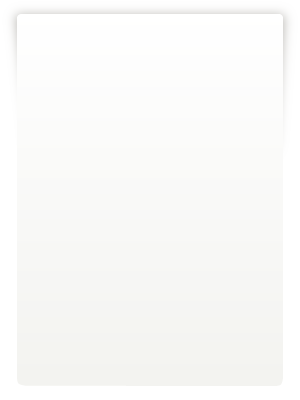
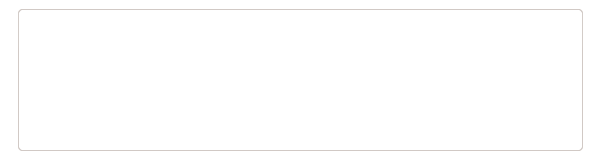
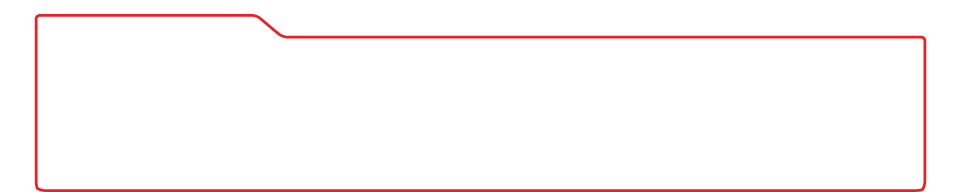
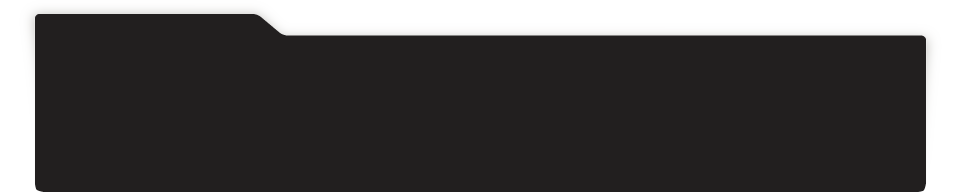
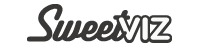
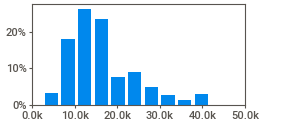
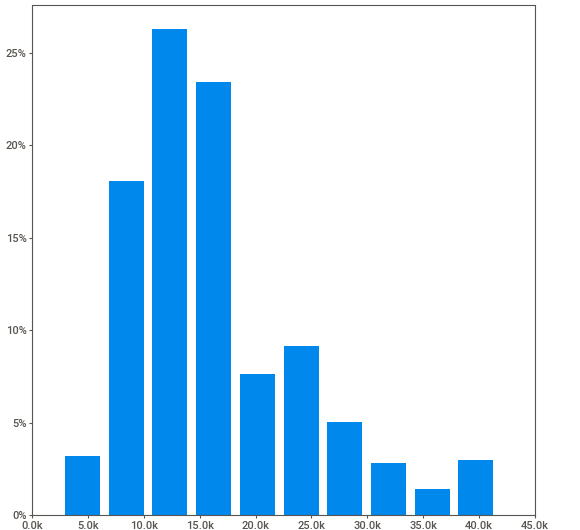
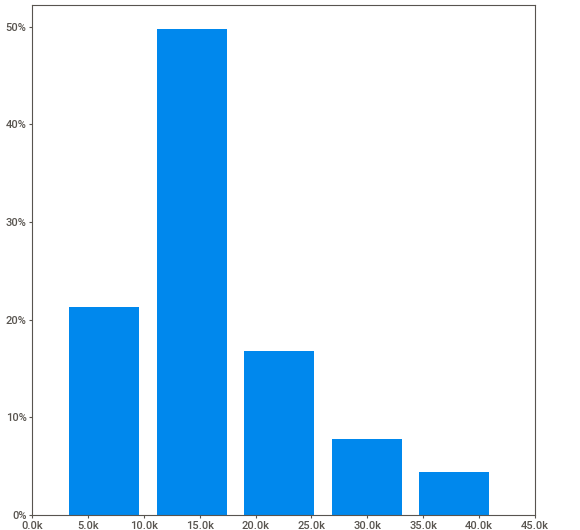
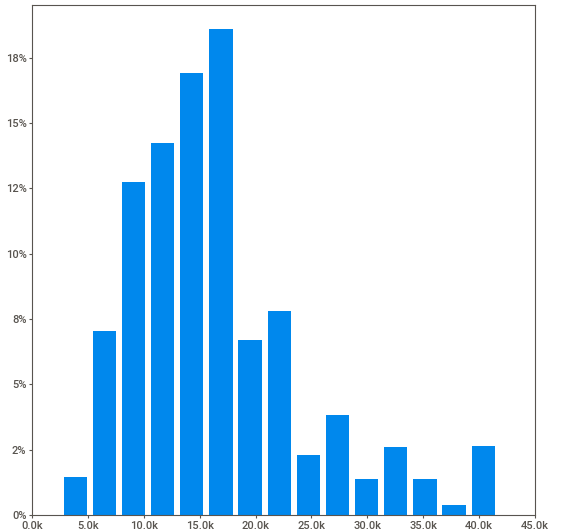
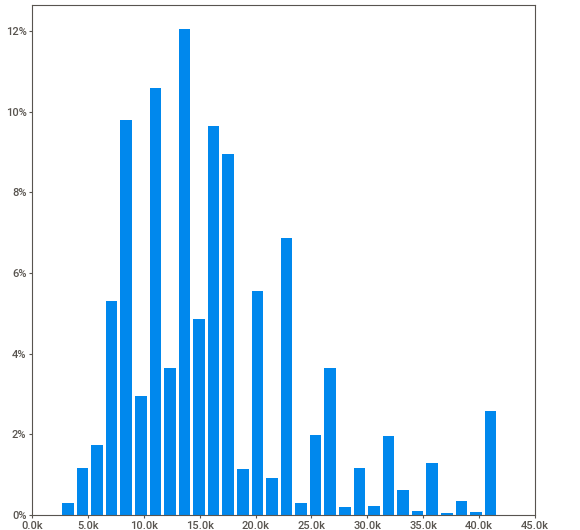
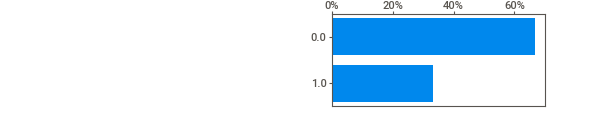
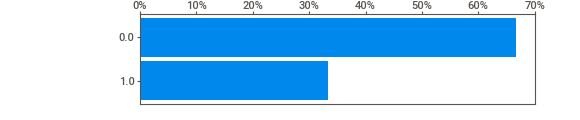
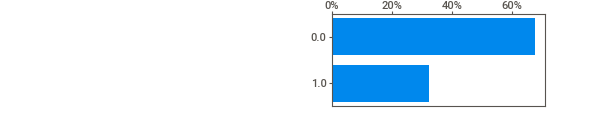
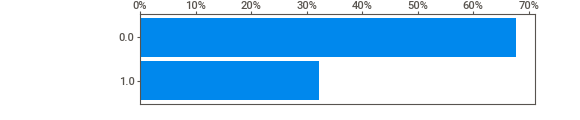
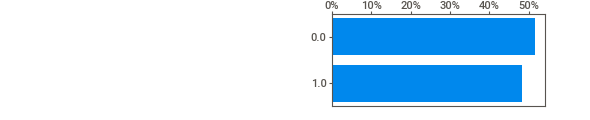
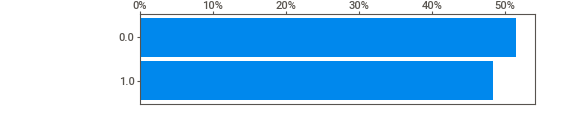
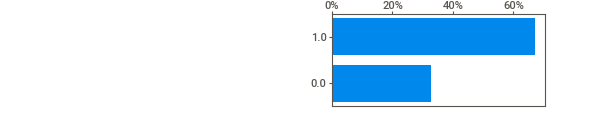
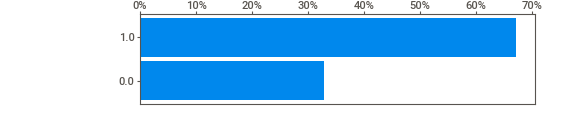
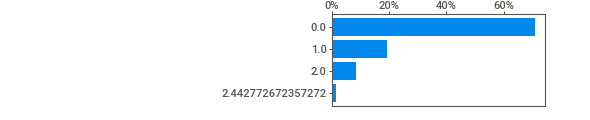
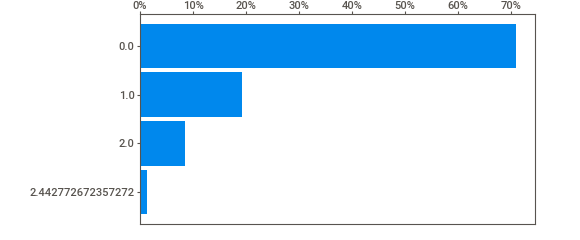
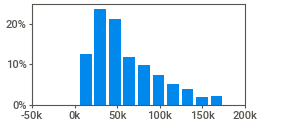
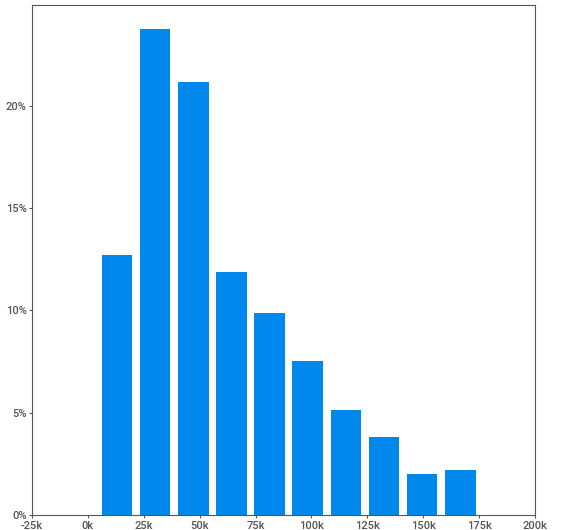
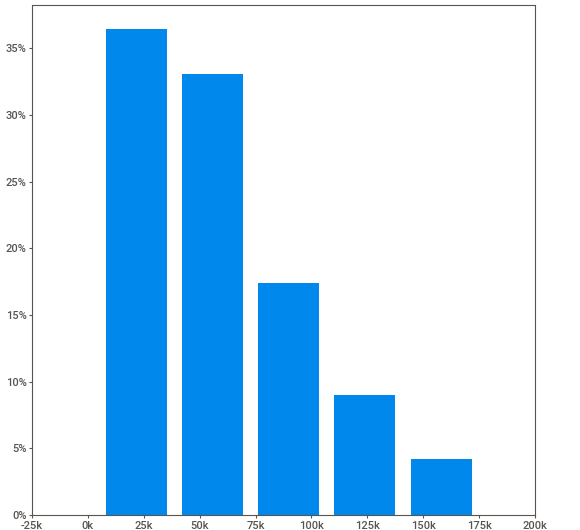
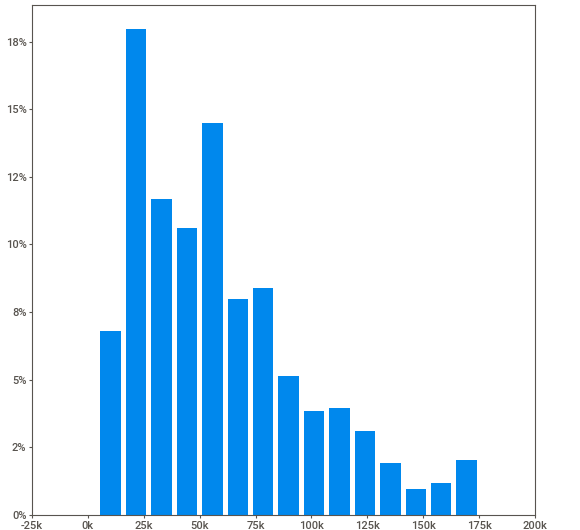
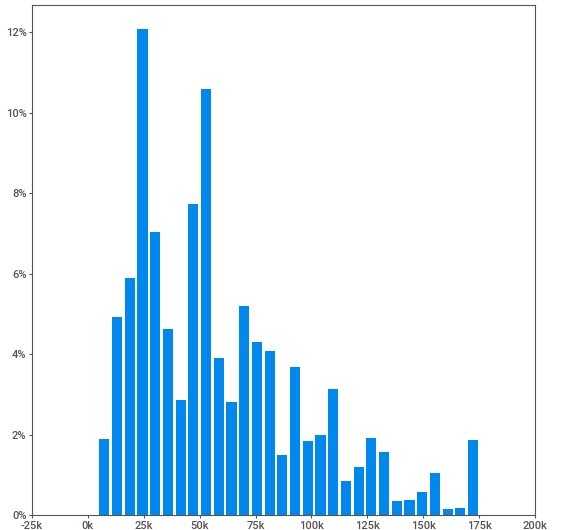
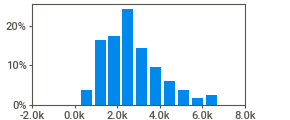
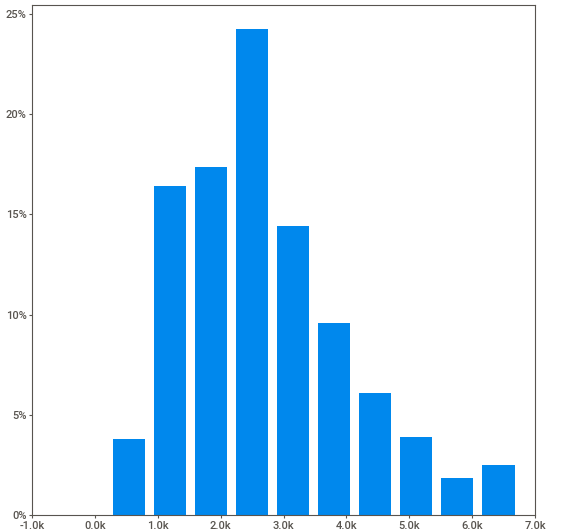
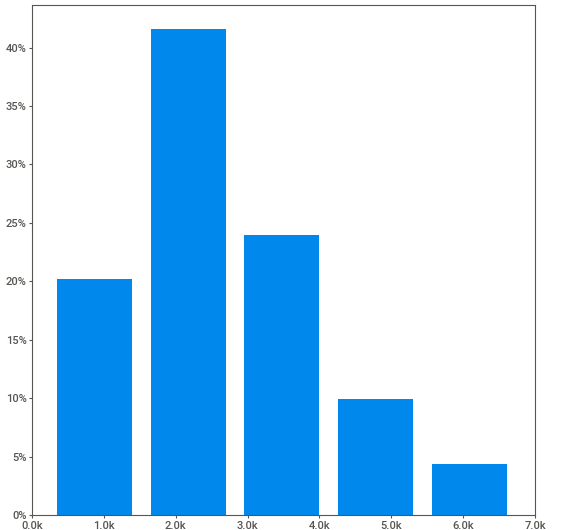
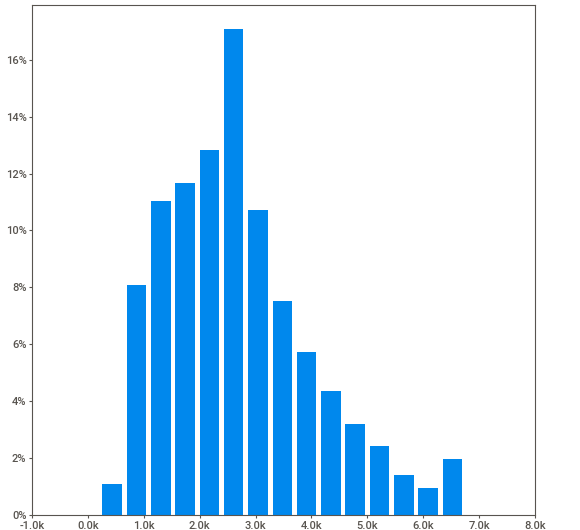
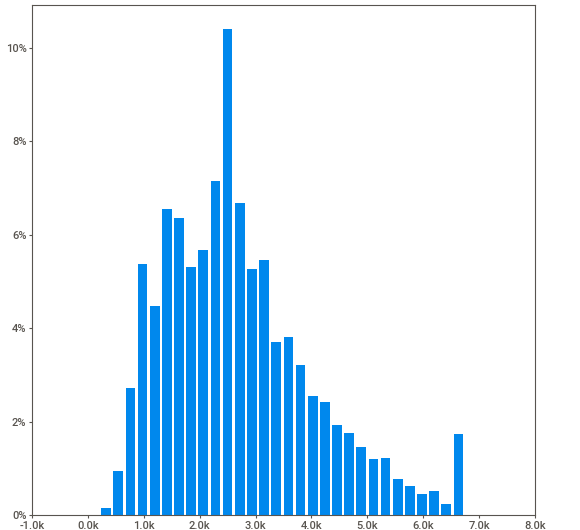
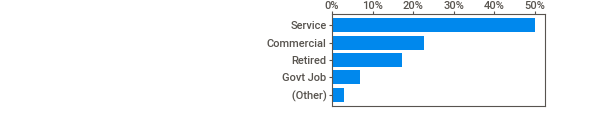
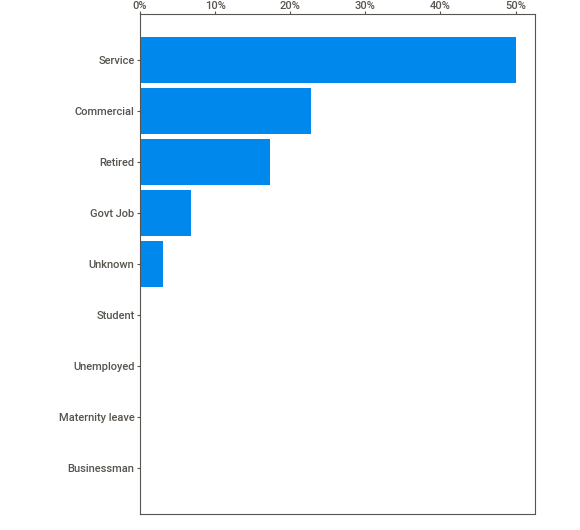
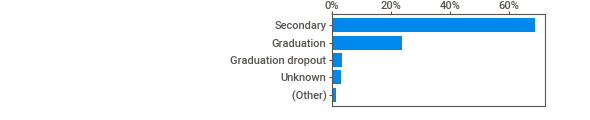
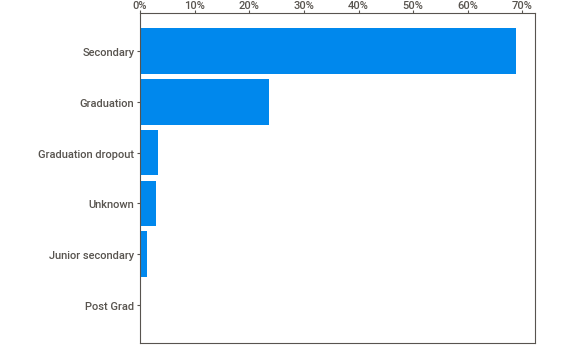
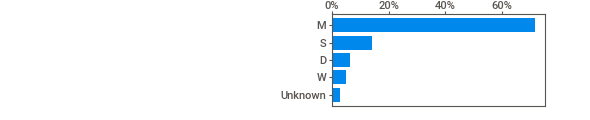
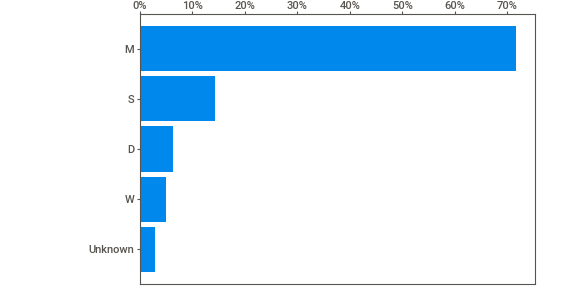
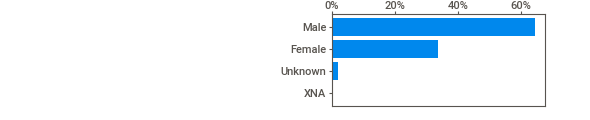
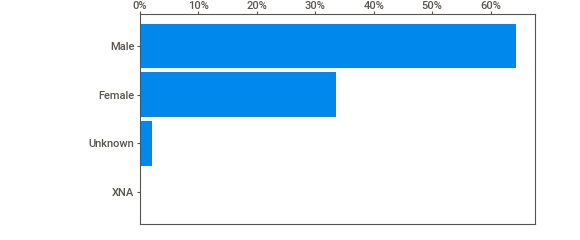
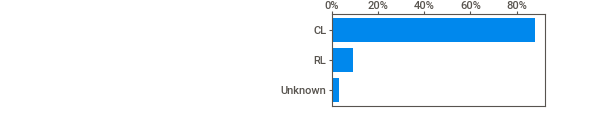
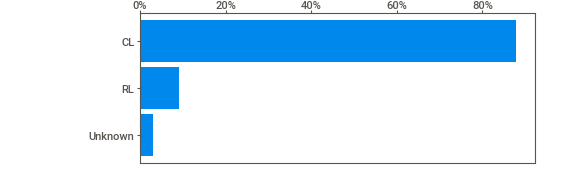
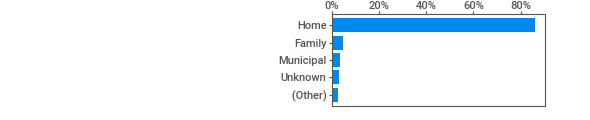
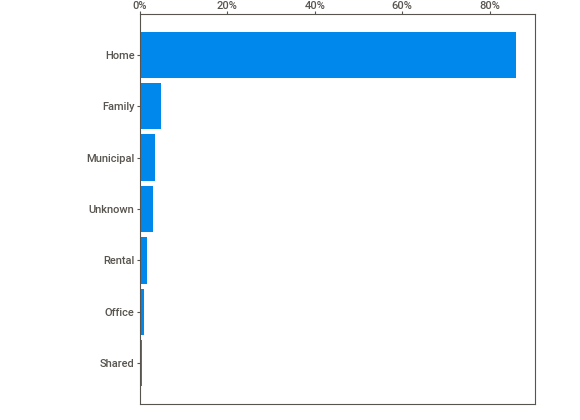
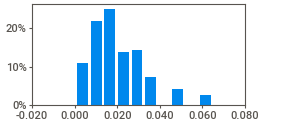
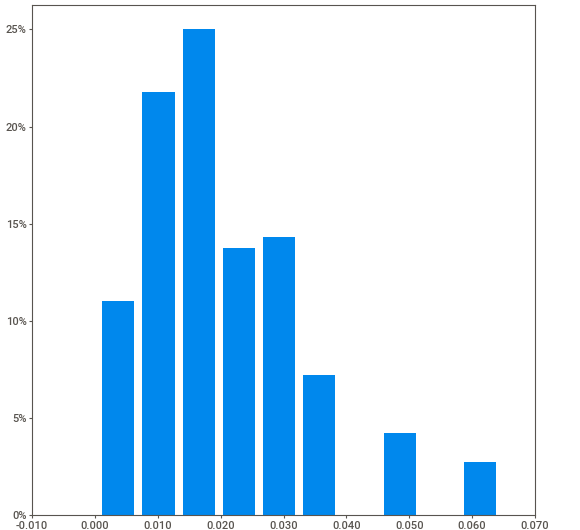
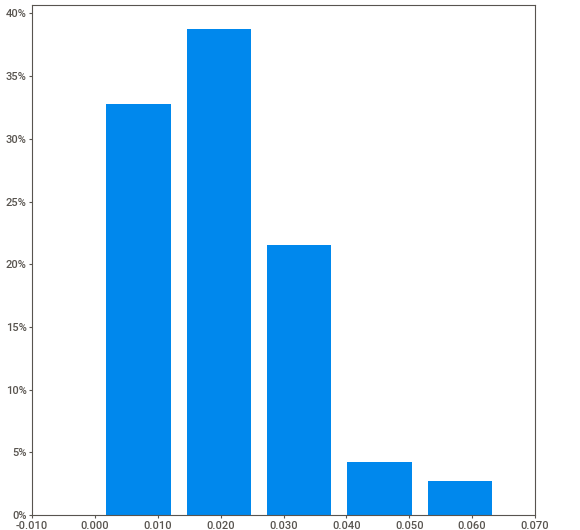
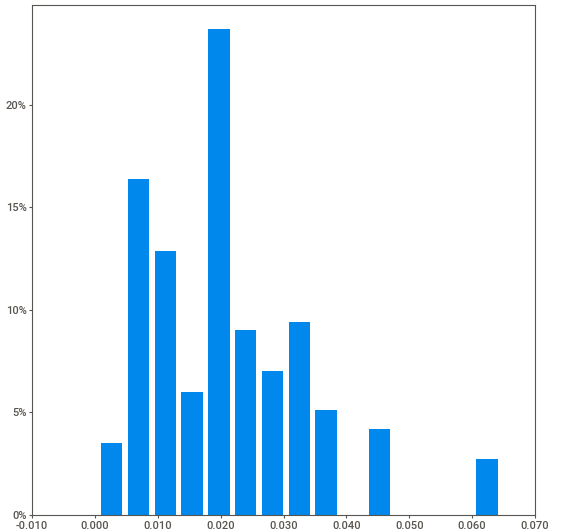
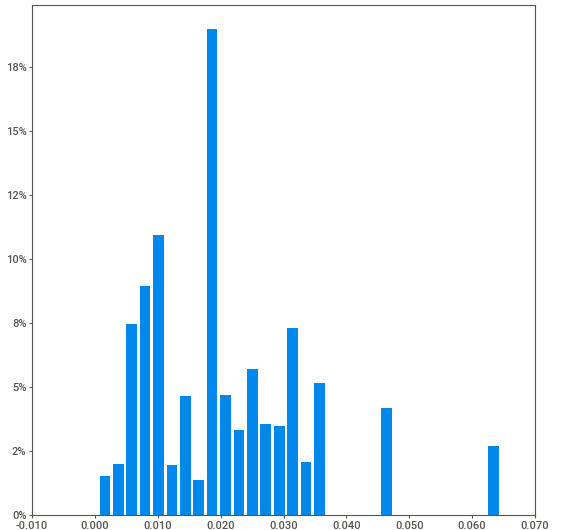
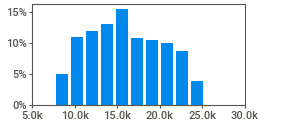
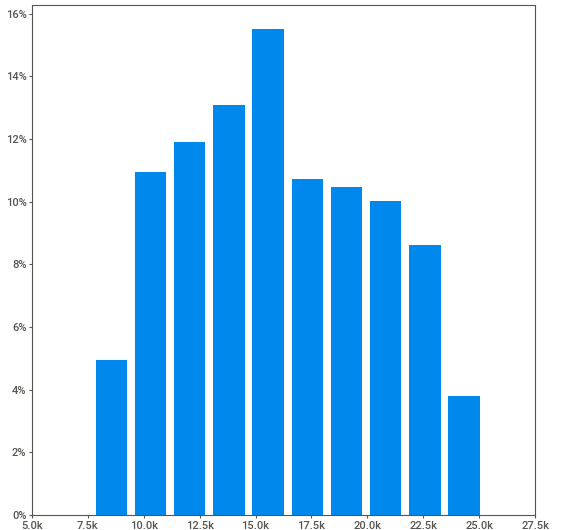
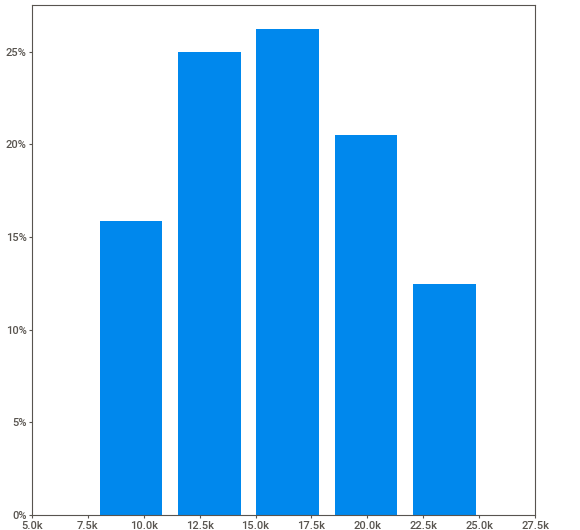
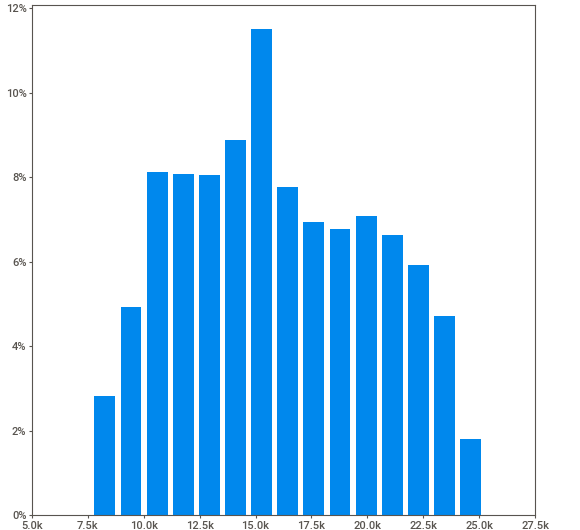
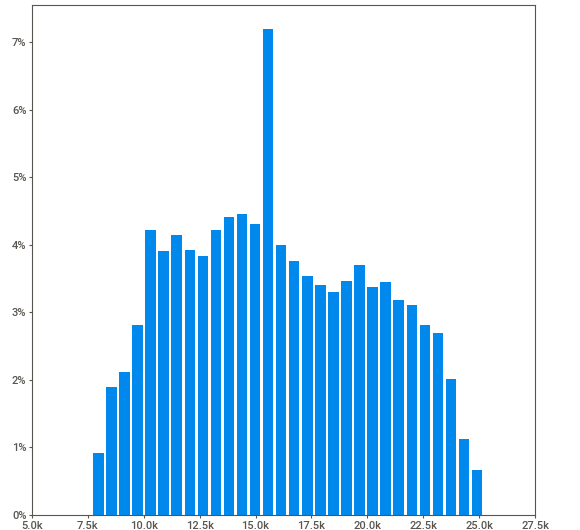
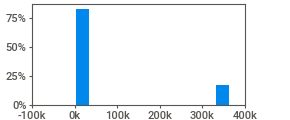
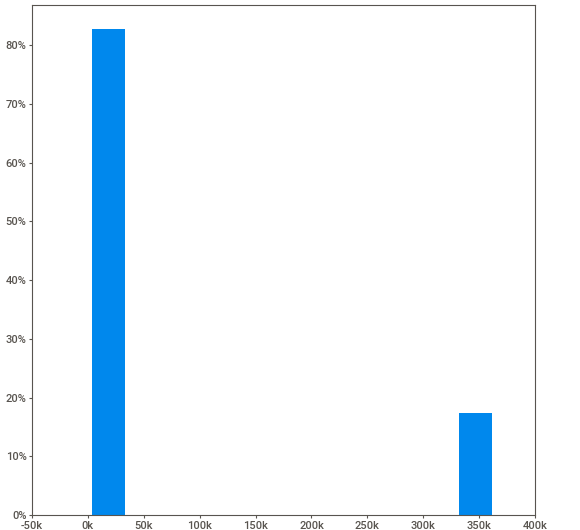
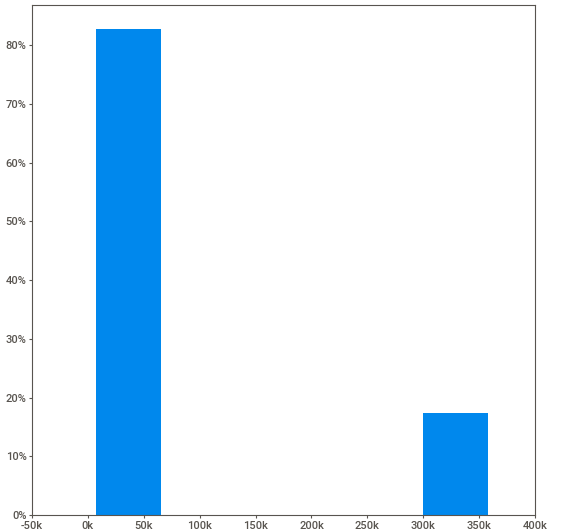
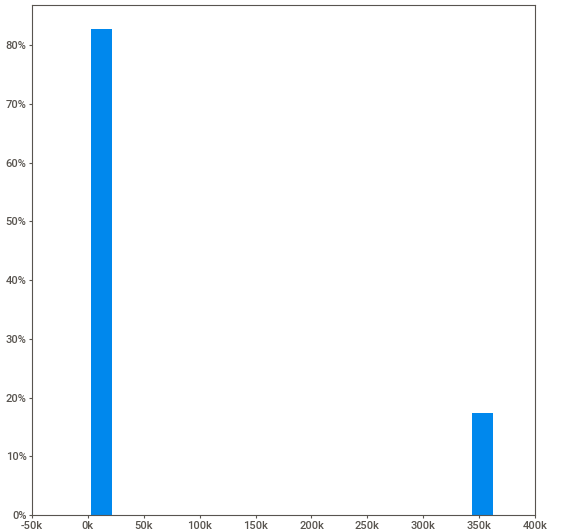
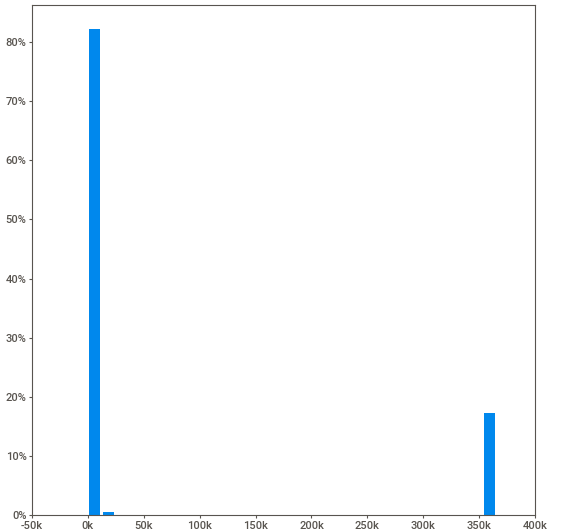
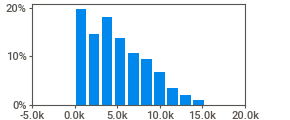
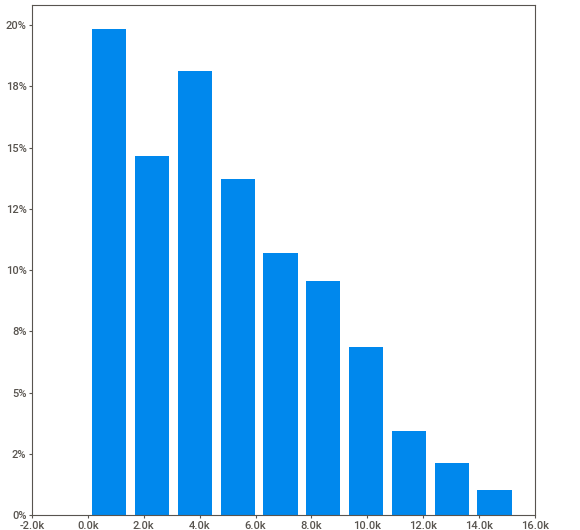
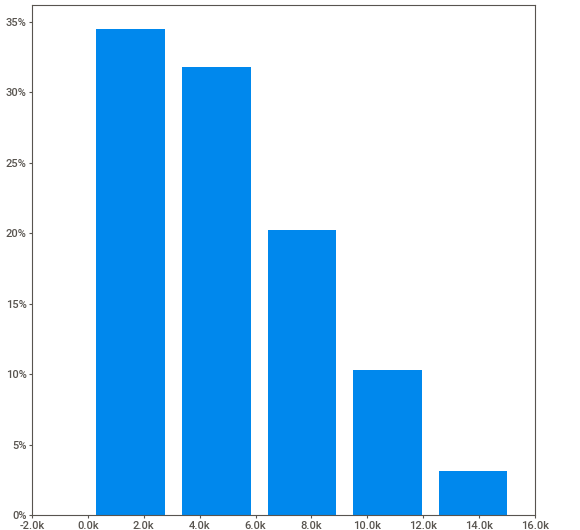
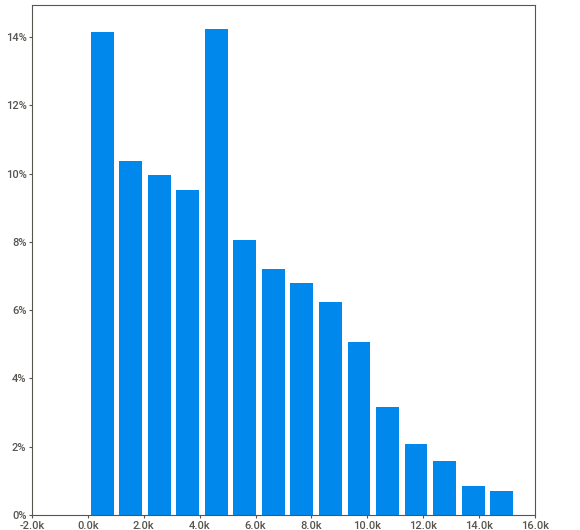
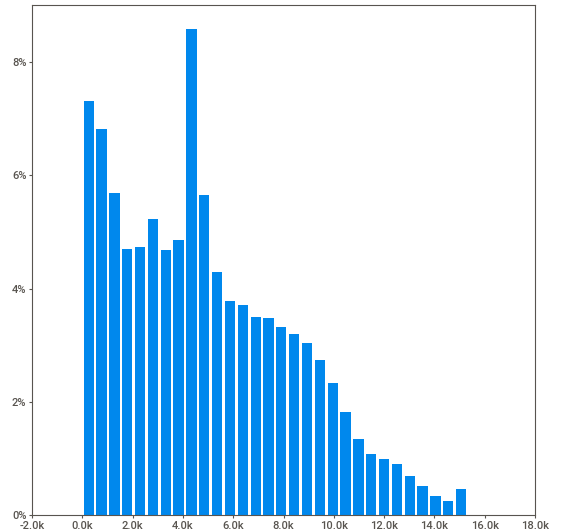
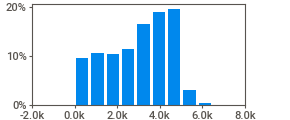
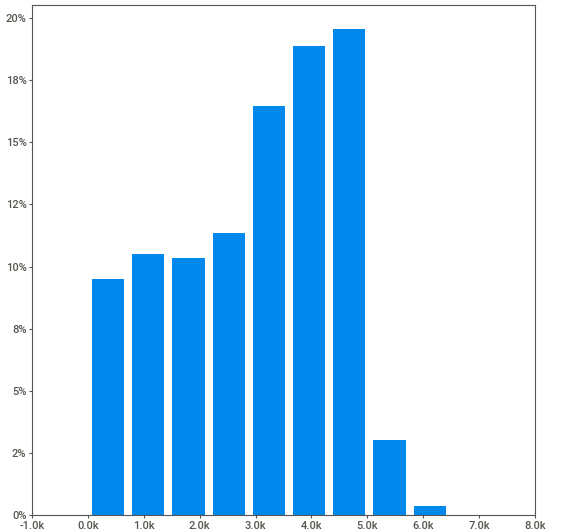
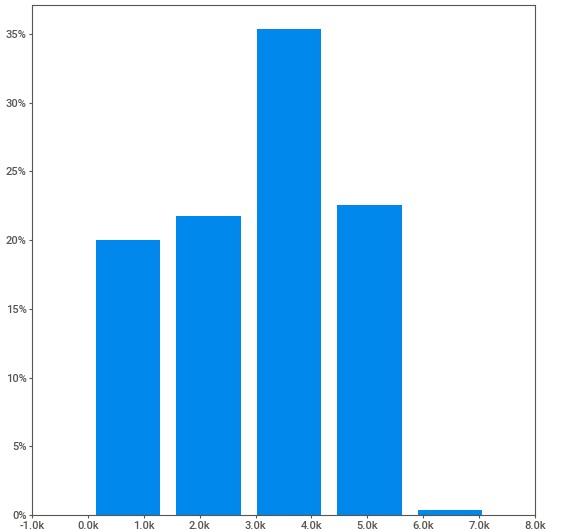
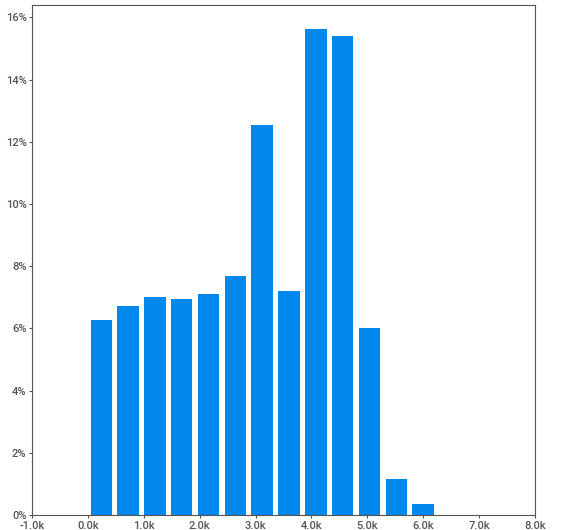
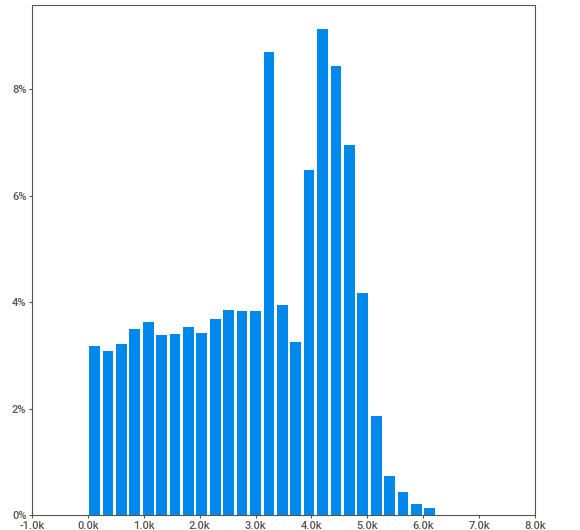
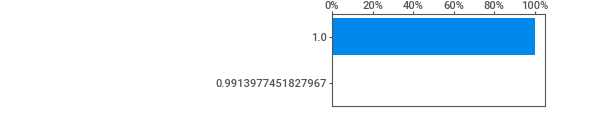
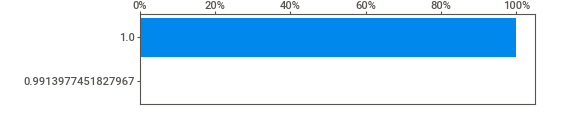
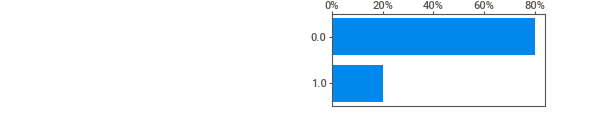
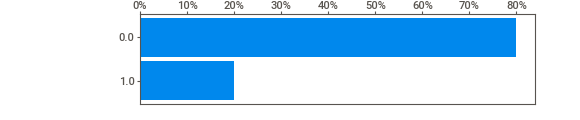
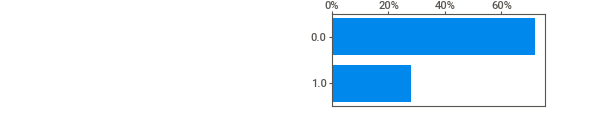
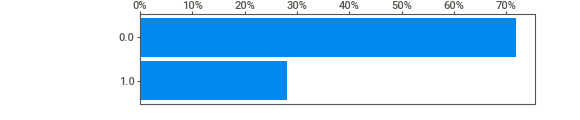
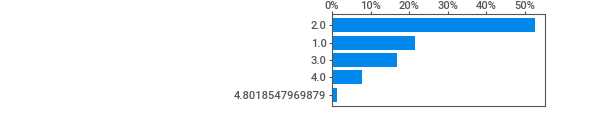
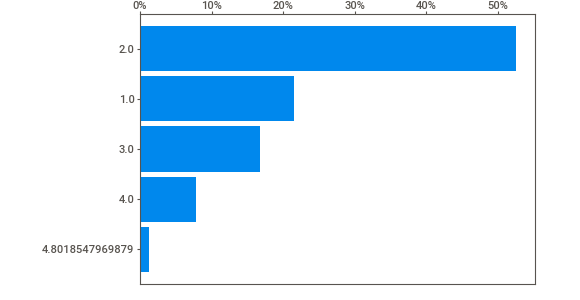
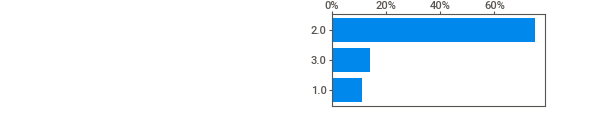
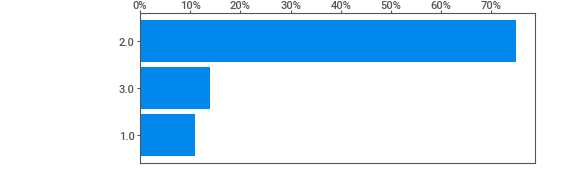
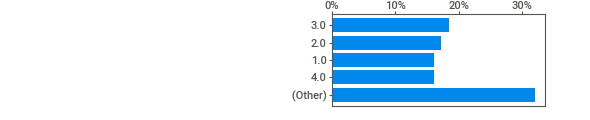
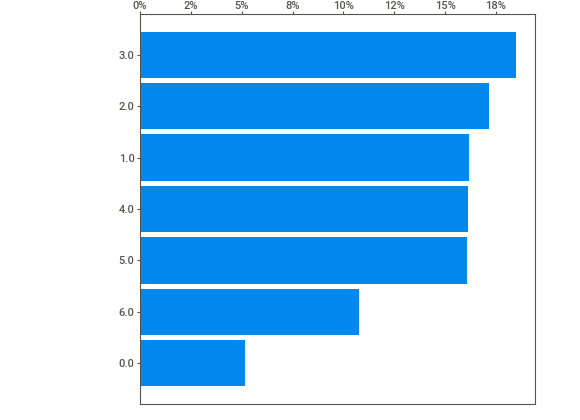
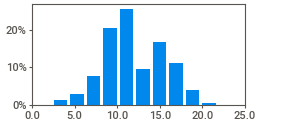
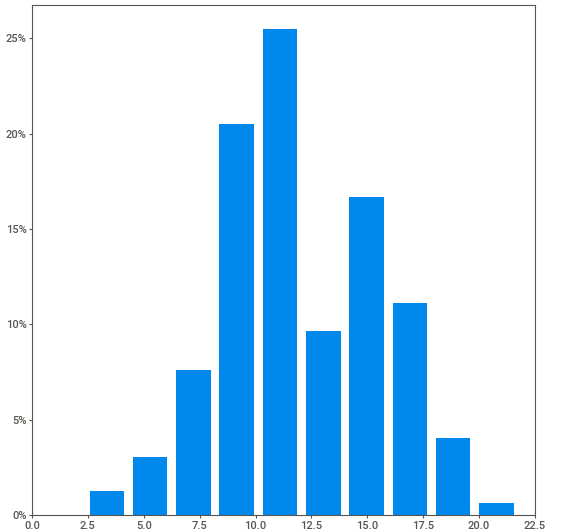
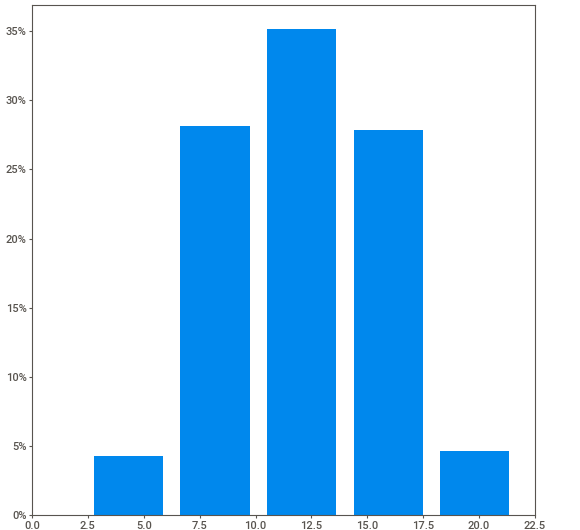
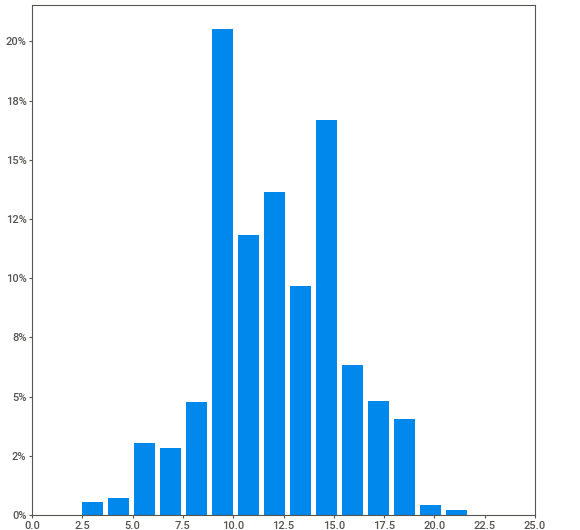
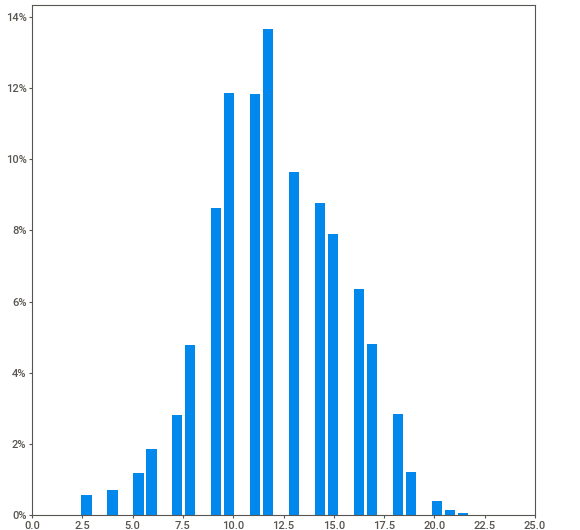
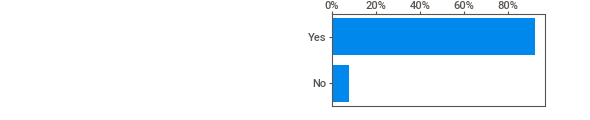
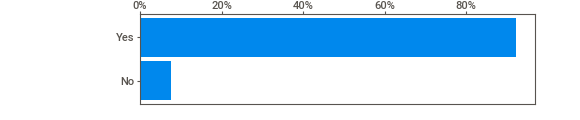
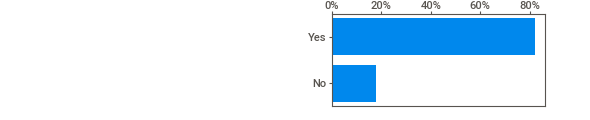
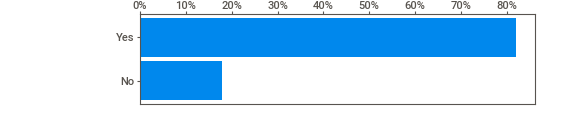
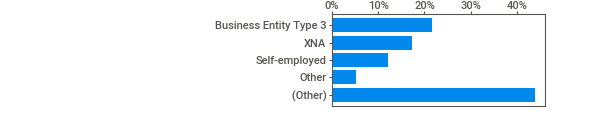
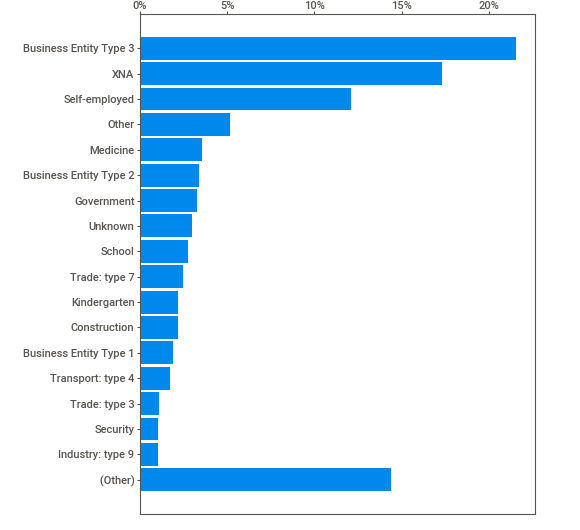
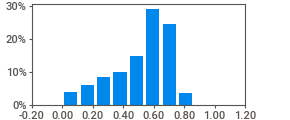
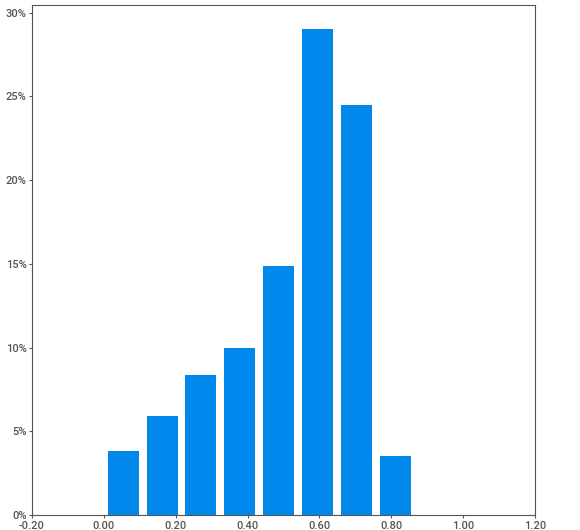
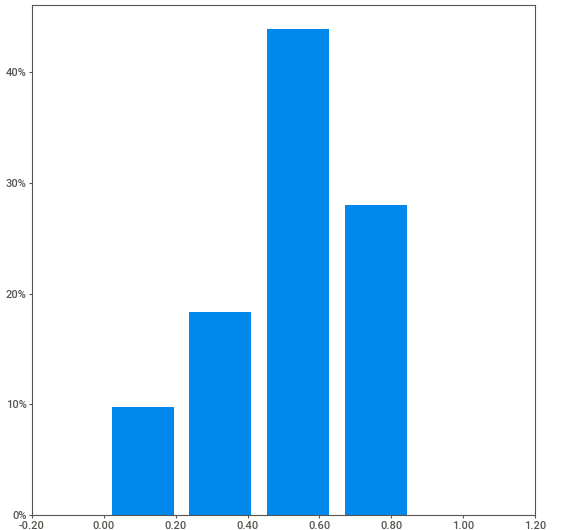
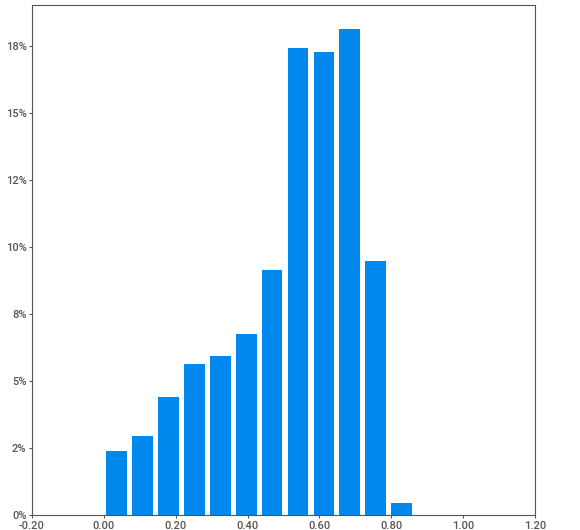
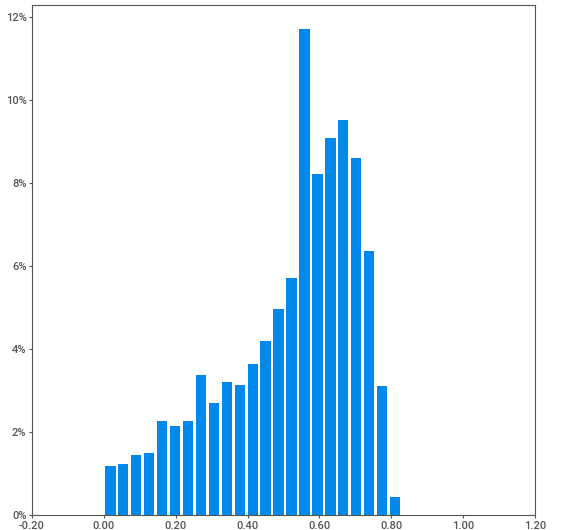
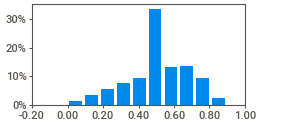
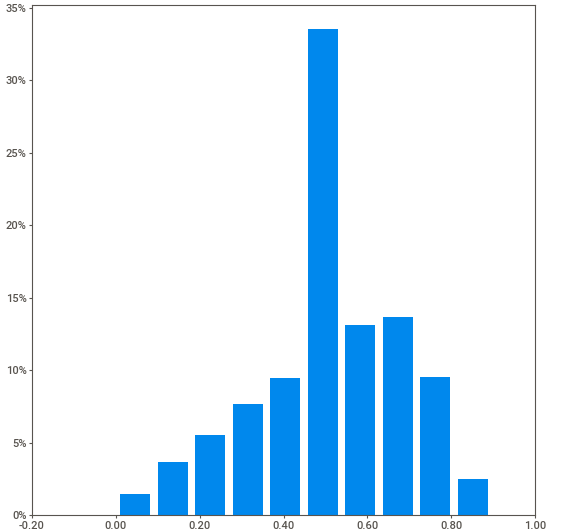
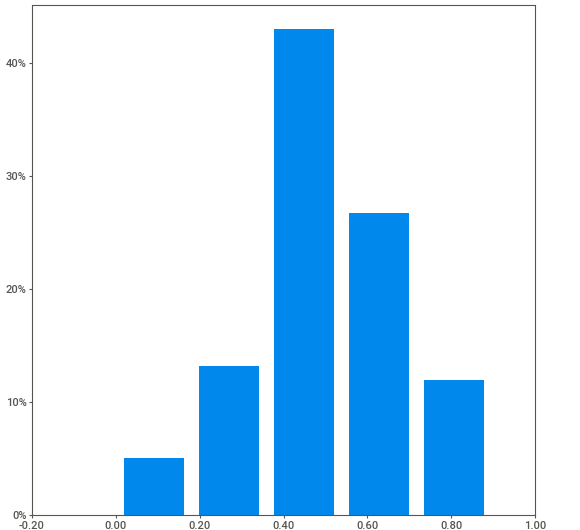
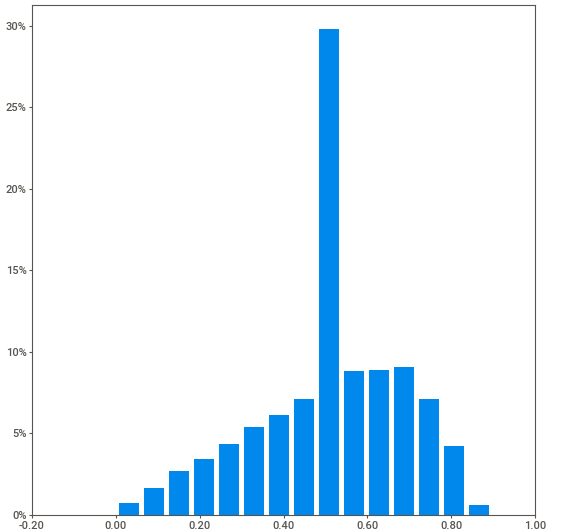
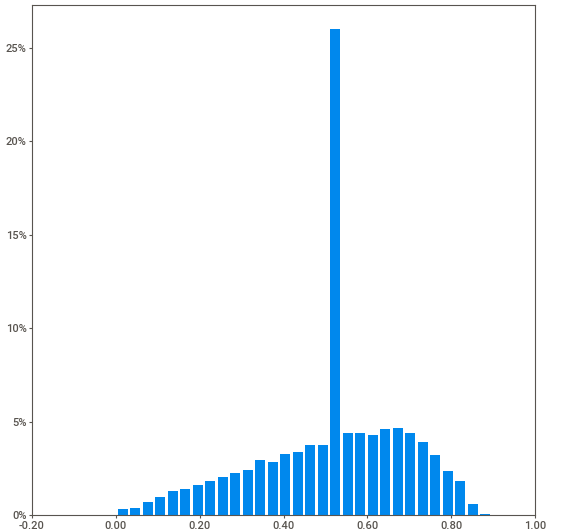
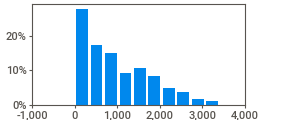
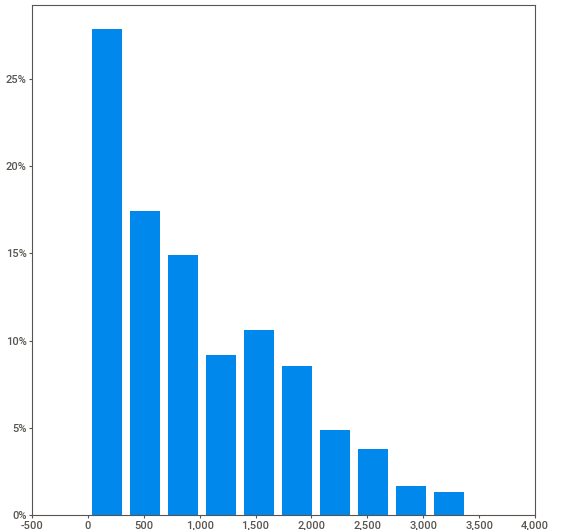
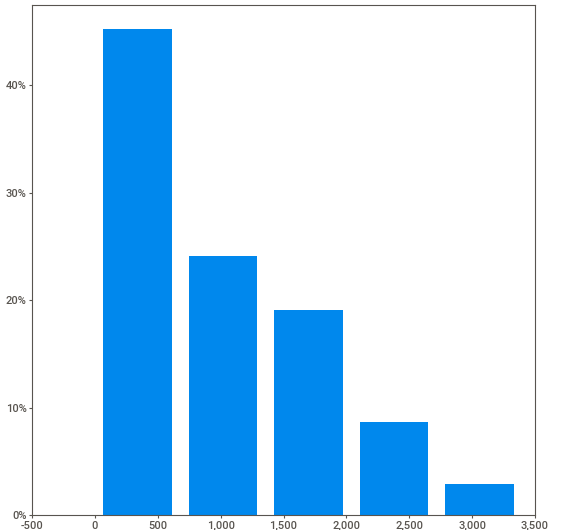
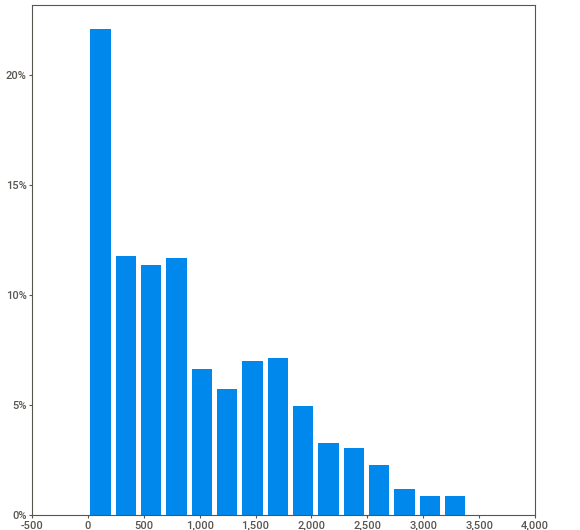
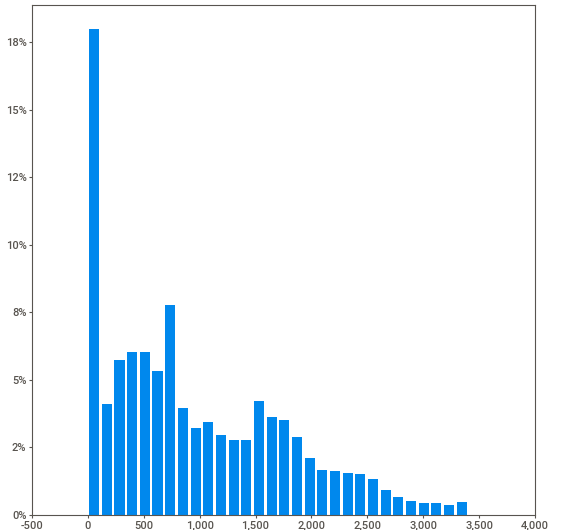
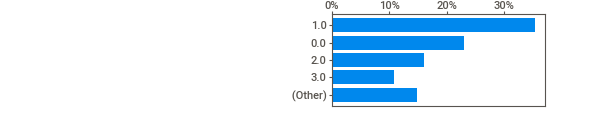
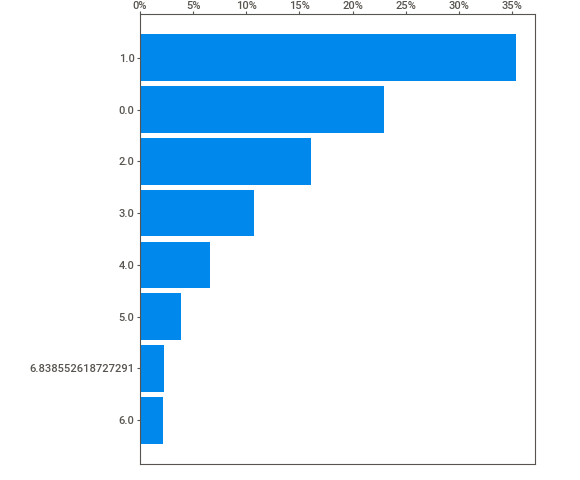
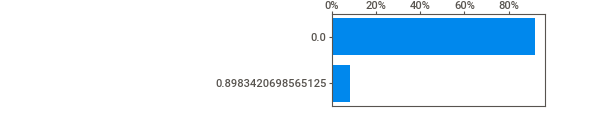
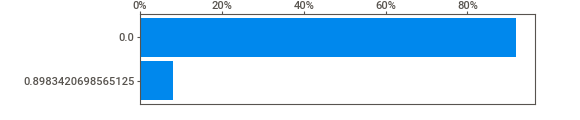
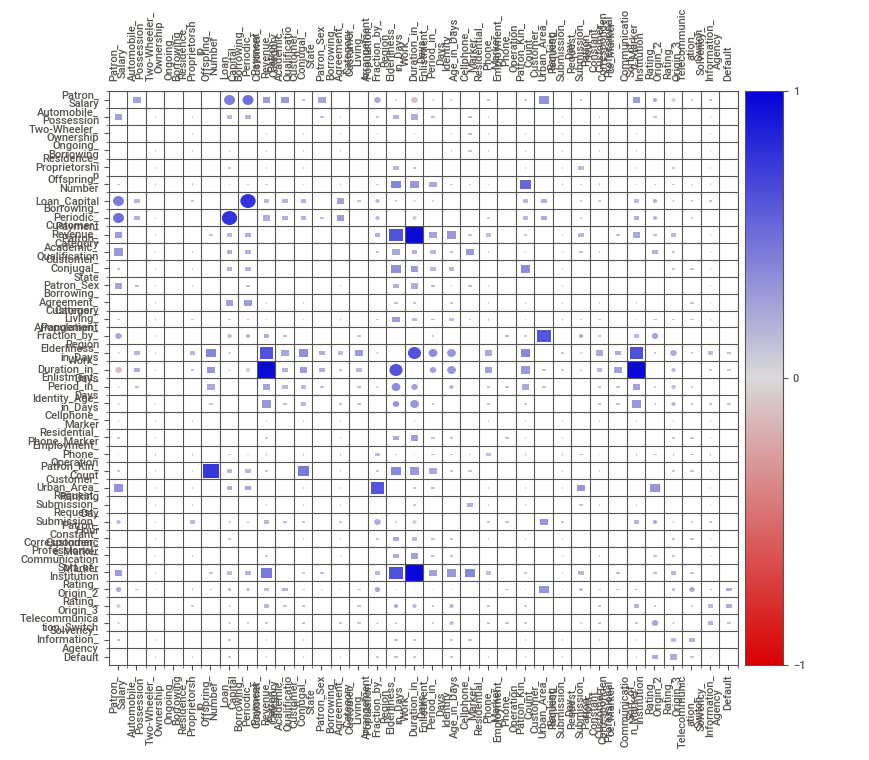
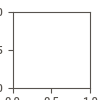

In [6]:
### Also there are outliers in many features. We need to remove them too. I generally use sdmethod to remove the outliers. I also prefer the hampel method. 
# I am using sdmethod here, because it is not subjective and robust.
num_std_dev = 3  

for column in df.select_dtypes(include=['number']):
    mean = df[column].mean()
    std_dev = df[column].std()
    lower_bound = mean - num_std_dev * std_dev
    upper_bound = mean + num_std_dev * std_dev
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Now as all the outliers are removed, let's impute the datasets. Without prior understanding of the feature, imputation can degrade the model performance. 
# But as most of the features has less than 5% missing values, we can perform a certain imputation technique where for binary class data we will impute the missing value as 0. 
# For numerical data, we will impute by median.
# And for categorical missing values, I don't want to loose any sample. What I have done here is, created another category, named "Unknown"

binary_columns = [col for col in df.columns if set(df[col].dropna().unique()) == {0, 1}]
df[binary_columns] = df[binary_columns].fillna(0)

numeric_columns = [col for col in df.columns if col not in binary_columns]
median = df[numeric_columns].median()
df[numeric_columns] = df[numeric_columns].fillna(median)

df = df.fillna('Unknown')

### Let's again perform EDA on the dataset.
sweet_report = sv.analyze(df)

### Saved the report in this file, this is after preprocessing the data.
report_name = "processed_data_EDA.html"
sweet_report.show_html(report_name)

sweet_report.show_notebook ()

In [ ]:
### Making minor adjustments.
df['Default'] = df[df['Default'] > 0].astype(int)
df.loc[df['Cellphone_Marker'] < 1, 'Cellphone_Marker'] = 0
df.fillna(0, inplace=True)

## 2.4 One Hot Encoding

<p style="color: yellow;">As all the missing & outlier treatment is done, we can move further to handle categorical transformations. What I have done here is, create a One-Hot Encoding setup, where the top 10 most frequent values of a categorical feature will be encoded, and the rest will be encoded as others. This way we can minimize the feature count while performing the OHE.</p>

In [6]:
top_categories_count = 10

for column in df.select_dtypes(include=['object']):
    category_counts = df[column].value_counts()
    top_categories = category_counts.index[:top_categories_count]
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
df.head()

Patron_Salary  Automobile_Possession  Two-Wheeler_Ownership  \
ID                                                                      
12142509         6750.0                    0.0                    0.0   
12138936        20250.0                    1.0                    0.0   
12181264        18000.0                    0.0                    0.0   
12188929        15750.0                    0.0                    0.0   
12133385        33750.0                    1.0                    0.0   

          Ongoing_Borrowing  Residence_Proprietorship  Offspring_Number  \
ID                                                                        
12142509                1.0                       0.0               0.0   
12138936                1.0                       0.0               0.0   
12181264                1.0                       0.0               1.0   
12188929                1.0                       1.0               0.0   
12133385                1.0                       0.0               2.0   

          Loan_Capital  Borrowing_Periodic_Payment  \
ID                                                   
12142509      61190.55                     3416.85   
12138936      15282.00                     1826.55   
12181264      59527.35                     2788.20   
12188929      53870.40                     2295.45   
12133385     133988.40                     3547.35   

          Population_Fraction_by_Region  Elderliness_in_Days  \
ID                                                             
12142509                       0.028663              13957.0   
12138936                       0.008575              14162.0   
12181264                       0.022800              16790.0   
12188929                       0.010556              23195.0   
12133385                       0.020713              11366.0   

          Work_Duration_in_Days  Enlistment_Period_in_Days  \
ID                                                           
12142509                 1062.0                     6123.0   
12138936                 4129.0                     7833.0   
12181264                 5102.0                     4493.0   
12188929               365243.0                     4493.0   
12133385                 2977.0                     5516.0   

          Identity_Age_in_Days  Cellphone_Marker  Residential_Phone_Marker  \
ID                                                                           
12142509                 383.0               1.0                       1.0   
12138936                  21.0               1.0                       0.0   
12181264                 331.0               1.0                       0.0   
12188929                 775.0               1.0                       0.0   
12133385                4043.0               1.0                       0.0   

          Employment_Phone_Operation  Patron_Kin_Count  \
ID                                                       
12142509                         0.0               2.0   
12138936                         1.0               2.0   
12181264                         0.0               2.0   
12188929                         0.0               2.0   
12133385                         0.0               4.0   

          Customer_Urban_Area_Ranking  Request_Submission_Day  \
ID                                                              
12142509                          2.0                     6.0   
12138936                          2.0                     3.0   
12181264                          2.0                     4.0   
12188929                          3.0                     2.0   
12133385                          1.0                     3.0   

          Request_Submission_Hour  Rating_Origin_2  Rating_Origin_3  \
ID                                                                    
12142509                     17.0         0.478787         0.537070   
12138936                     10.0         0.215068         0.537070   
12181264       

# 3 Model building

## 3.1 Understand the model schema

In [41]:
df['Default'].value_counts()/df.shape[0]

0.0    0.919208
1.0    0.080792
Name: Default, dtype: float64

<h3>Ratio of 0 & 1 suggests to use some imbalanced classification technique or to balance the data and try classification methods.</h3>
<p>Just to understand, we will apply AutoML methods to understand prediction patterns. Without prior improvement in the class imbalance, I believe the models will fail drastically. But anyway, we will have an understanding of the global explainability, feature importances once we perform AutoML.</p>

<p style="color: red;"><strong>Let's use an AutoML technique to see how the data performs under different models.</strong></p>
<p>This is just a preliminary measure to check how the models are performing in this data. We may also perform further preprocessing techniques or feature selection methods depending on this result. Here we have used H2O AutoML package because it is precise and fast. My first choice was to use pycaret. But there are some dependency issues with my EDA library sweetviz and pycaret. Pycaret requires another package markupsafe version &ge; 2.0.0 whereas sweetviz uses only versions 1.1.1 or previous.</p>

In [9]:
h2o.init()

df_h2o = h2o.H2OFrame(df)
train, test = df_h2o.split_frame(ratios=[0.8], seed=42)

target = 'Default'
features = df_h2o.drop(target).columns
train[target] = train[target].asfactor()

aml = H2OAutoML(max_models=100, seed=42, max_runtime_secs=3600)  # Customize options as needed
aml.train(x=features, y=target, training_frame=train)

Checking whether there is an H2O instance running at http://localhost:54321.

 connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         4 days 23 hours 2 mins
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.4
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_USER_8tb0op
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.151 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.7 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
00:59:22.904: AutoML: XGBoost is not available; skipping it.
00:59:22.938: _train param, Dropping bad and constant columns: [Cellphone_Marker]

█████
01:01:00.952: _train param, Dropping bad and constant columns: [Cellphone_Marker]

█
01:02:08.981: _train param, Dropping bad and constant columns: [Cellphone_Marker]

██
01:03:40.701: _train param, Dropping bad and constant columns: [Cellphone_Marker]

█
01:04:11.880: _train param, Dropping bad and constant columns: [Cellphone_Marker]

███
01:04:47.732: _train param, Dropping bad and constant columns: [Cellphone_Marker]

██
01:05:35.654: _train param, Dropping bad and constant columns: [Cellphone_Marker]

██
01:06:37.347: _train param, Dropping bad and constant columns: [Cellphone_Marker]

█
01:07:04.243: _train param, Dropping bad and constant columns: [Cellphone_Marker]

█████████████████████████████████████████████| (done

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20231020_05922


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          3.63244e+06            20           20           20            4861          6291          5768.92

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0663091912019085
RMSE: 0.2575057110083357
LogLoss: 0.2629363056270712
Mean Per-Class Error: 0.35810419541301697
AUC: 0.7386293083155587
AUCPR: 0.31875469352319225
Gini: 0.47725861663111746

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21075593500336237
       0      1     Error    Rate
-----  -----  ----  -------  -----------------
0      83217  6300  0.0704   (6300.0/89517.0)
1      5104   2799  0.6458   (5104.0/7903.0)
Total  88321  9099  0.1171   (11404.0/97420.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.210756     0.329255  162
max f2                       0.10537      0.403769  254
max f0point5                 0.325091     0.386461  100
max accuracy                 0.448299     0.924564  62
max precision                0.872015     1         0
max recall                   2.58423e-05  1         399
max specificity              0.872015     1         0
max absolute_mcc             0.325091     0.281054  100
max min_per_class_accuracy   0.0900069    0.671794  270
max mean_per_class_accuracy  0.10537      0.675023  254
max tns                      0.872015     89517     0
max fns                      0.872015     7902      0
max fps                      2.58423e-05  89517     399
max tps                      2.58423e-05  7903      399
max tnr                      0.872015     1         0
max fnr                      0.872015     0.999873  0
max fpr                      2.58423e-05  1         399
max tpr                      2.58423e-05  1         399

Gains/Lift Table: Avg response rate:  8.11 %, avg score:  8.77 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100082                   0.443185           9.634     9.634              0.781538         0.558131    0.781538                    0.558131            0.0964191       0.0964191                  863.4     863.4              0.0940396
2        0.0200062                   0.36006            5.21428   7.42527            0.422998         0.395944    0.60236                     0.477079            0.0521321       0.148551                   421.428   642.527            0.139894
3        0.0300041                   0.318723           4.17649   6.34271            0.338809         0.33756     0.51454                     0.430589            0.0417563       0.190307                   317.649   534.271            0.174456
4        0.0400021                   0.289531           3.27791   5.57671            0.265914         0.303617    0.452399                    0.398854            0.0327724       0.22308                    227.791   457.671            0.199241
5        0.05                        0.268536           2.94885   5.05125            0.23922          0.278842    0.409772          

In [25]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(rows=lb.nrows)

model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------
DRF_1_AutoML_3_20231020_05922                        0.752616   0.244008  0.334861                0.353559  0.256091  0.0655824               14488                   0.008914  DRF
GBM_4_AutoML_3_20231020_05922                        0.751339   0.247004  0.26554                 0.342429  0.259585  0.0673844                7999                   0.005685  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_27          0.750881   0.247466  0.269442                0.347436  0.259248  0.0672095                9735                   0.007452  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_37          0.750468   0.247873  0.254999                0.353637  0.260258  0.0677343               15489                   0.006708  GBM
GBM_1_AutoML_3_20231020_05922                        0.749409   0.248385  0.250877                0.357441  0.260524  0.0678727               11437                   0.007628  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_5           0.747457   0.248764  0.251005                0.356064  0.260918  0.068078                 6516                   0.005385  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_8           0.746685   0.248436  0.256618                0.350734  0.260502  0.0678611                6098                   0.003136  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_18          0.746444   0.249701  0.238249                0.351271  0.26176   0.0685182                4512                   0.004816  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_36          0.746072   0.247565  0.280334                0.360562  0.25881   0.0669827                6982                   0.009778  GBM
GBM_3_AutoML_3_20231020_05922                        0.744598   0.249936  0.240304                0.350733  0.261664  0.068468                 6091                   0.006804  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_7           0.743739   0.250484  0.232925                0.356544  0.262071  0.0686813                4890                   0.005968  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_26          0.743438   0.250419  0.237903                0.355942  0.261891  0.068587                 3699                   0.00417   GBM
GBM_grid_1_AutoML_3_20231020_05922_model_17          0.743141   0.250282  0.243827                0.354187  0.261581  0.0684246                4563                   0.005218  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_16          0.742616   0.251747  0.226825                0.358114  0.262732  0.0690281                2474                   0.003438  GBM
GBM_2_AutoML_3_20231020_05922                        0.742286   0.2508    0.23372                 0.349881  0.262189  0.0687433                5032                   0.004454  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_4           0.742003   0.249761  0.300078                0.360408  0.257887  0.0665059                8887                   0.004011  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_15          0.741978   0.251248  0.228536                0.348704  0.262536  0.0689253                4086                   0.003791  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_34          0.741864   0.24959   0.281697                0.358916  0.259028  0.0670957                7382                   0.004242  GBM
GBM_grid_1_AutoML_3_20231020_05922_model_13          0.740977   0.251348  0.230639                0.361833  0.262488  0.0689001                4050                   0.003758  GBM
GBM_5_AutoML_3_20231020_05922                        0.740973   0.251721  0.225166                0.350182  0.262831  0.0690799                4385                   0.003667  GBM
GBM_grid_1_AutoML_3_20231020_0

<p>Tree-based classification fits well in this dataset. As it turns out, Distributed Random Forest (DRF) fits best with a depth of 20. Although AutoML only used GBM, GLM, DRF, and a few Deep Learning methods. Let's predict using the best model and see the what happens.</p>

In [28]:
best_model = aml.get_best_model()
predictions = best_model.predict(test)

predictions = predictions['predict'].as_data_frame()
actuals = test['Default'].as_data_frame()

confusion = confusion_matrix(actuals, predictions)
confusion

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


array([[21404,  1090],
       [ 1312,   630]], dtype=int64)

In [30]:
print('Precision:', precision_score(actuals, predictions))
print('Recall:', recall_score(actuals, predictions))
print('Accuracy:', accuracy_score(actuals, predictions))

Precision: 0.36627906976744184
Recall: 0.32440782698249226
Accuracy: 0.9017024062858078


<h3>In the model itself, the Capture rate for the train data was low. And as expected, the test results are not that good. So, the best model does not perform that well.</h3>
<p>Let's try all model types; we will prefer AUC score over any other statistic. As our target is to capture all the possible defaulters. Here we will select only the best model depending on the AUC to check performances.</p>

In [38]:
for model in lb['algo'].as_data_frame()['algo'].unique():
    print('*************************************************\n')
    print('Model:', model, '\n\n')

    clf = aml.get_best_model(algorithm=model, criterion="auc")
    predictions = clf.predict(test)

    predictions = predictions['predict'].as_data_frame()
    actuals = test['Default'].as_data_frame()

    confusion = confusion_matrix(actuals, predictions)
    print('Confusion Matrix:', confusion)
    print('Precision:', precision_score(actuals, predictions))
    print('Recall:', recall_score(actuals, predictions))
    print('Accuracy:', accuracy_score(actuals, predictions))
    print('\n\n')

*************************************************

Model: DRF 


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix: [[21404  1090]
 [ 1312   630]]
Precision: 0.36627906976744184
Recall: 0.32440782698249226
Accuracy: 0.9017024062858078



*************************************************

Model: GBM 


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix: [[21539   955]
 [ 1445   497]]
Precision: 0.34228650137741046
Recall: 0.25592173017507724
Accuracy: 0.9017842527418563



*************************************************

Model: GLM 


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix: [[19623  2871]
 [ 1190   752]]
Precision: 0.2075627932652498
Recall: 0.38722966014418125
Accuracy: 0.833810770993616



*************************************************

Model: DeepLearning 


deeplearning prediction prog

## 3.2 Try basics - Model Development

<h3>As expected, all the models are performing badly.</h3>
<p>Here we will use a wildcard entry based on my experience. I was developing a predelinquency bounce project in my current organization where I was also facing the same imbalance classification dilemma. We tried some imbalance classification methods along with some synthetic data addition to balance out the classes, tried SMOTE, SMOTEEN, etc. But nothing worked. Then an easy tweak in a basic classification model (Logistic) worked out the development.</p>
<p>Before jumping into 2nd level preprocessing, I will just try this method to see if it works here too. Although, logistic model should not be used with more than 15 features. And also, it is similar to regression, we'll have to use some proper IV selection method to remove multicollinearity (Whereas, this property was negligible for other classification models).</p>

<AxesSubplot:>

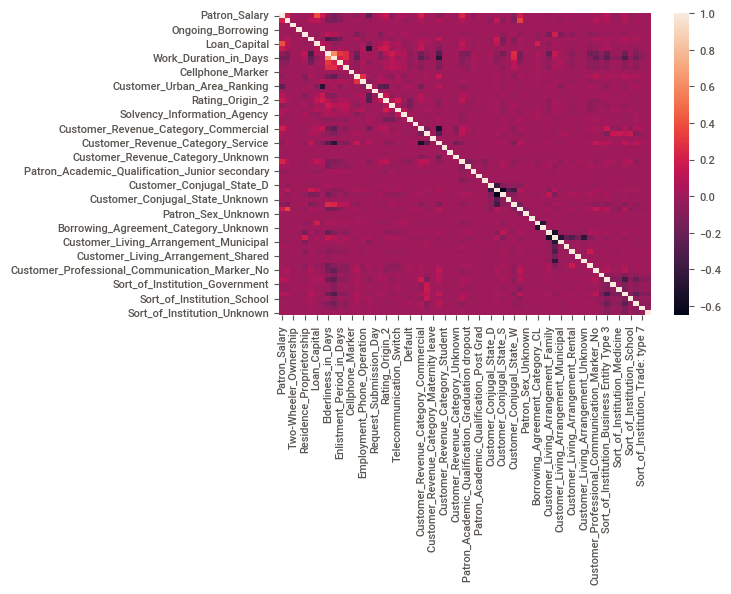

In [42]:
### Removing multicollinearity: Here, I've set the threshold as 0.7 which is a good value to check.

correlation_matrix = df.corr()
threshold = 0.7
correlated_variables = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_variables.add(colname)
df = df.drop(columns=correlated_variables)
new_correlation_matrix = df.corr()
sns.heatmap(new_correlation_matrix)

In [50]:
iv_woe_data = pd.DataFrame(columns=['Feature', 'IV', 'WOE'])
for feature in df.drop(columns='Default'):
    iv, woe = calculate_iv_woe(df, 'Default', feature)
    iv_woe_data = iv_woe_data.append({'Feature': feature, 'IV': iv, 'WOE': woe}, ignore_index=True)

top_15_features = iv_woe_data.sort_values(by='IV', ascending=False).head(15)
top_15_features

Feature        IV  \
52        Patron_Constant_Correspondence_Marker_No  0.004385   
21                     Solvency_Information_Agency  0.001805   
40                               Patron_Sex_Female  0.001609   
45              Customer_Living_Arrangement_Family  0.001419   
49              Customer_Living_Arrangement_Rental  0.001207   
28            Customer_Revenue_Category_Unemployed  0.001126   
5                                 Offspring_Number  0.001124   
60               Sort_of_Institution_Self-employed  0.001086   
46                Customer_Living_Arrangement_Home  0.000836   
53   Customer_Professional_Communication_Marker_No  0.000775   
37                       Customer_Conjugal_State_S  0.000621   
17                         Request_Submission_Hour  0.000485   
13                        Residential_Phone_Marker  0.000331   
55      Sort_of_Institution_Business Entity Type 3  0.000288   
32  Patron_Academic_Qualification_Junior secondary  0.000173   

                                                  WOE  
52  Default                                      0...  
21  Default                        0.0   1.0      ...  
40  Default              0.0   1.0       WOE      ...  
45  Default                                0.0   1...  
49  Default                                0.0   1...  
28  Default                                  0.0  ...  
5   Default             0.0   1.0       WOE       ...  
60  Default                              0.0   1.0...  
46  Default                             0.0   1.0 ...  
53  Default                                       ...  
37  Default                      0.0   1.0       W...  
17  Default                    0.0   1.0       WOE...  
13  Default                     0.0   1.0       WO...  
55  Default                                       ...  
32  Default                                       ...

<p>According to IV feature selection technique, let's use these top 15 features in logistic regression.</p>
<p><span style="color: red; font-weight: bold;">The main tweak will be to use the class_weight parameter set as balanced. What it does is, The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).</span></p>
<p>Which helps dealing with this imbalance. Also, we will use almost all parameter combinations for random search.</p>


In [56]:
X = df.drop(columns=['Default'])[top_15_features['Feature'].unique()]
y = df['Default']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)  

print("Best Parameters:", grid_search.best_params_)

In [100]:
best_logit = LogisticRegression(
    penalty=grid_search.best_params_['penalty'],
    class_weight=grid_search.best_params_['class_weight'],
    max_iter=grid_search.best_params_['max_iter'],
    n_jobs=grid_search.best_params_['n_jobs']
)

best_logit.fit(X_train, y_train)
y_pred = best_logit.predict(X_test)
create_metrics(y_test, y_pred)

Predicted           Total
                 Positive Negative       
Actual Positive      1013      934   1947
       Negative      8959    13466  22425
Total                9972    14400  24372

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.935139  0.600491     0.594083     0.600491
1  Class 1   0.101584  0.520288     0.594083          NaN

<!DOCTYPE html>
<html>
<head>
    <title>Logistic Model Results</title>
</head>
<body>
    <p>Although the results are not that good, but still it is far better than the previous AutoML results if we are only talking about capture rate. Here, we will point 10 customers as defaulters to get 1 defaulter by which we will get hold of more than 52% of defaulters. We will try this logistic model one more time with all the features. Let's see if anything changes.</p>
</body>
</html>

In [102]:
X = df.drop(columns=['Default'])
y = df['Default']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)  

print("Best Parameters:", grid_search.best_params_)

best_logit = LogisticRegression(
    penalty=grid_search.best_params_['penalty'],
    class_weight=grid_search.best_params_['class_weight'],
    max_iter=grid_search.best_params_['max_iter'],
    n_jobs=grid_search.best_params_['n_jobs']
)

best_logit.fit(X_train, y_train)
y_pred = best_logit.predict(X_test)
create_metrics(y_test, y_pred)

Best Parameters: {'class_weight': 'balanced', 'max_iter': 500, 'n_jobs': -1, 'penalty': 'l2'}


Predicted           Total
                 Positive Negative       
Actual Positive      1053      894   1947
       Negative      9894    12531  22425
Total               10947    13425  24372

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.933408  0.558796     0.557361     0.558796
1  Class 1   0.096191  0.540832     0.557361          NaN

<!DOCTYPE html>
<html>
<head>
    <title>Model Usage Considerations</title>
</head>
<body>
    <h2>We can use this model when,</h2>
    <blockquote>
        <p>Reaching our targets is cost-effective. For example, sending a message or automated call to encourage customers to pay their EMI properly.</p>
    </blockquote>
    <h2>We cannot use this model when,</h2>
    <blockquote>
        <p>Reaching our targets is costly. For instance, going to each home individually or offering incentives for EMI payment.</p>
    </blockquote>
    <p>Overall, the model may not be suitable in terms of precision. We may need to explore new techniques.</p>
</body>
</html>


## 3.3 Deep dive into modeling - ML

<!DOCTYPE html>
<html>
<head>
    <title>AutoML vs. Logistic Method</title>
</head>
<body>
    <h3>Till now what we have found out is, <span style="color: red; font-weight: bold;">AutoML is preserving the conversion rate but also failing to provide better capture rate. While the logistic method is giving decent capture ratio, but unable to preserve the precision.</span></h3>
    <p>We will now train different ML algorithms to find the best one among them. We can try to implement various research papers on imbalanced data sparse classification techniques, but in the data, the information values of the features are very low. Implementing them won't make a significant improvement in recall or precision.</p>
    <p>We have around over 70 features, which are for me a little high for ML models. And we can't impose dimension reduction techniques (PCA or tSNE), it might improve the model performance but then it won't have any feature explainability left.</p>
    <p>Another method we can use is to remove the least important features. Let's work on that. This time we will use sklearn's feature selection methods. There are 100s of feature selection methods.</p>
</body>
</html>


<!DOCTYPE html>
<html>
<head>
    <title>Feature Selection Methods for Imbalanced Data Classification</title>
</head>
<body>
    <h1>3.3.1 Feature Selection Methods for Imbalanced Data Classification</h1>
    <ol>
        <li>
            <strong>SelectKBest:</strong> This method selects the top K features based on statistical tests such as chi-squared, ANOVA, or mutual information. Selecting the most informative features can help improve the model's performance.
        </li>
        <li>
            <strong>Recursive Feature Elimination (RFE):</strong> RFE recursively removes the least important features while training the model and ranks the features based on their importance. This is useful for reducing the dimensionality of your dataset.
        </li>
        <li>
            <strong>SelectFromModel:</strong> This method selects features based on feature importances obtained from tree-based models like Random Forest or gradient boosting classifiers. It can help you focus on the most relevant features.
        </li>
        <li>
            <strong>VarianceThreshold:</strong> This technique removes features with low variance. In imbalanced datasets, some features might have very little variation, making them less useful.
        </li>
        <li>
            <strong>SMOTE (Synthetic Minority Over-sampling Technique):</strong> SMOTE is a resampling technique, not a feature selection method. However, it can help balance the dataset by oversampling the minority class. After applying SMOTE, you may consider re-evaluating the importance of features.
        </li>
        <li>
            <strong>Class-Weighted Models:</strong> You can set class weights in your classification model to give more importance to the minority class. Some sklearn classifiers like <code>LogisticRegression</code>, <code>SVC</code>, and <code>RandomForestClassifier</code> support class weights.
        </li>
        <li>
            <strong>Feature Importance from Tree-based Models:</strong> Train tree-based models (e.g., Random Forest, XGBoost) and examine feature importances. Features with higher importances are likely more informative, and you can select them for your model.
        </li>
        <li>
            <strong>Univariate Feature Selection with Custom Scoring:</strong> Use custom scoring functions to evaluate the importance of features for imbalanced data. For instance, you can define your scoring function that takes into account both precision and recall.
        </li>
    </ol>
</body>
</html>


In [9]:
### Let's try the 1st one, SelectKBest. By seeing the IV values previously I don't think If I select 35 features among 70 features all the combinations will have almost all the same feature names.

X = df.drop('Default', axis=1)  
y = df['Default']  

k = 35 
selector = SelectKBest(score_func=chi2, k=k)  
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected feature names:")
print(selected_feature_names)

Selected feature names:
Index(['Patron_Salary', 'Automobile_Possession', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment', 'Elderliness_in_Days',
       'Work_Duration_in_Days', 'Enlistment_Period_in_Days',
       'Identity_Age_in_Days', 'Residential_Phone_Marker',
       'Employment_Phone_Operation', 'Customer_Urban_Area_Ranking',
       'Request_Submission_Hour', 'Rating_Origin_2', 'Rating_Origin_3',
       'Telecommunication_Switch', 'Solvency_Information_Agency',
       'Customer_Revenue_Category_Govt Job',
       'Customer_Revenue_Category_Retired',
       'Customer_Revenue_Category_Service',
       'Patron_Academic_Qualification_Graduation',
       'Patron_Academic_Qualification_Secondary', 'Customer_Conjugal_State_S',
       'Customer_Conjugal_State_W', 'Patron_Sex_Female', 'Patron_Sex_Male',
       'Borrowing_Agreement_Category_RL', 'Customer_Living_Arrangement_Family',
       'Customer_Living_Arrangement_Rental',
       'Patron_Constant_Correspondence_Ma

In [25]:
## So, our new X & y will be, 

X = df.drop('Default', axis=1)[selected_feature_names]
y = df['Default'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
gbm = GradientBoostingClassifier()

grid_search_GBM = GridSearchCV(estimator=gbm, param_grid=param_grid_GBM, cv=3, n_jobs=-1)   ### Here I have used 3 fold cross validation to reduce time as well as find better parameters.
grid_search_GBM.fit(X, y)  
best_params = grid_search_GBM.best_params_
best_gbm = grid_search_GBM.best_estimator_

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

decile  prob_min  prob_max  prob_avg  cnt_cust  cnt_resp  cnt_non_resp  \
0       1     0.159     0.930     0.252   12186.0    4399.0        7787.0   
1       2     0.104     0.159     0.128   12186.0    1941.0       10245.0   
2       3     0.076     0.104     0.089   12185.0    1265.0       10920.0   
3       4     0.058     0.076     0.067   12186.0     871.0       11315.0   
4       5     0.046     0.058     0.052   12185.0     586.0       11599.0   
5       6     0.036     0.046     0.040   12186.0     418.0       11768.0   
6       7     0.027     0.036     0.032   12186.0     212.0       11974.0   
7       8     0.020     0.027     0.024   12185.0     115.0       12070.0   
8       9     0.012     0.020     0.016   12186.0      37.0       12149.0   
9      10     0.000     0.012     0.008   12185.0       1.0       12184.0   

   cnt_resp_rndm  cnt_resp_wiz  resp_rate  cum_cust  cum_resp  cum_resp_wiz  \
0          984.5        9845.0     36.099   12186.0    4399.0        9845.0   
1          984.5           0.0     15.928   24372.0    6340.0        9845.0   
2          984.5           0.0     10.382   36557.0    7605.0        9845.0   
3          984.5           0.0      7.148   48743.0    8476.0        9845.0   
4          984.5           0.0      4.809   60928.0    9062.0        9845.0   
5          984.5           0.0      3.430   73114.0    9480.0        9845.0   
6          984.5           0.0      1.740   85300.0    9692.0        9845.0   
7          984.5           0.0      0.944   97485.0    9807.0        9845.0   
8          984.5           0.0      0.304  109671.0    9844.0        9845.0   
9          984.5           0.0      0.008  121856.0    9845.0        9845.0   

   cum_non_resp  cum_cust_pct  cum_resp_pct  cum_resp_pct_wiz  \
0        7787.0        10.000        44.683             100.0   
1       18032.0        20.001        64.398             100.0   
2       28952.0        30.000        77.247             100.0   
3       40267.0        40.000        86.094             100.0   
4       51866.0        50.000        92.047             100.0   
5       63634.0        60.000        96.293             100.0   
6       75608.0        70.001        98.446             100.0   
7       87678.0        80.000        99.614             100.0   
8       99827.0        90.000        99.990             100.0   
9      112011.0       100.000       100.000             100.0   

   cum_non_resp_pct      KS   lift  
0             6.952  37.731  4.468  
1            16.098  48.300  3.220  
2            25.847  51.400  2.575  
3            35.949  50.145  2.152  
4            46.304  45.743  1.841  
5            56.810  39.483  1.605  
6            67.501  30.945  1.406  
7            78.276  21.338  1.245  
8            89.122  10.868  1.111  
9           100.000   0.000  1.000

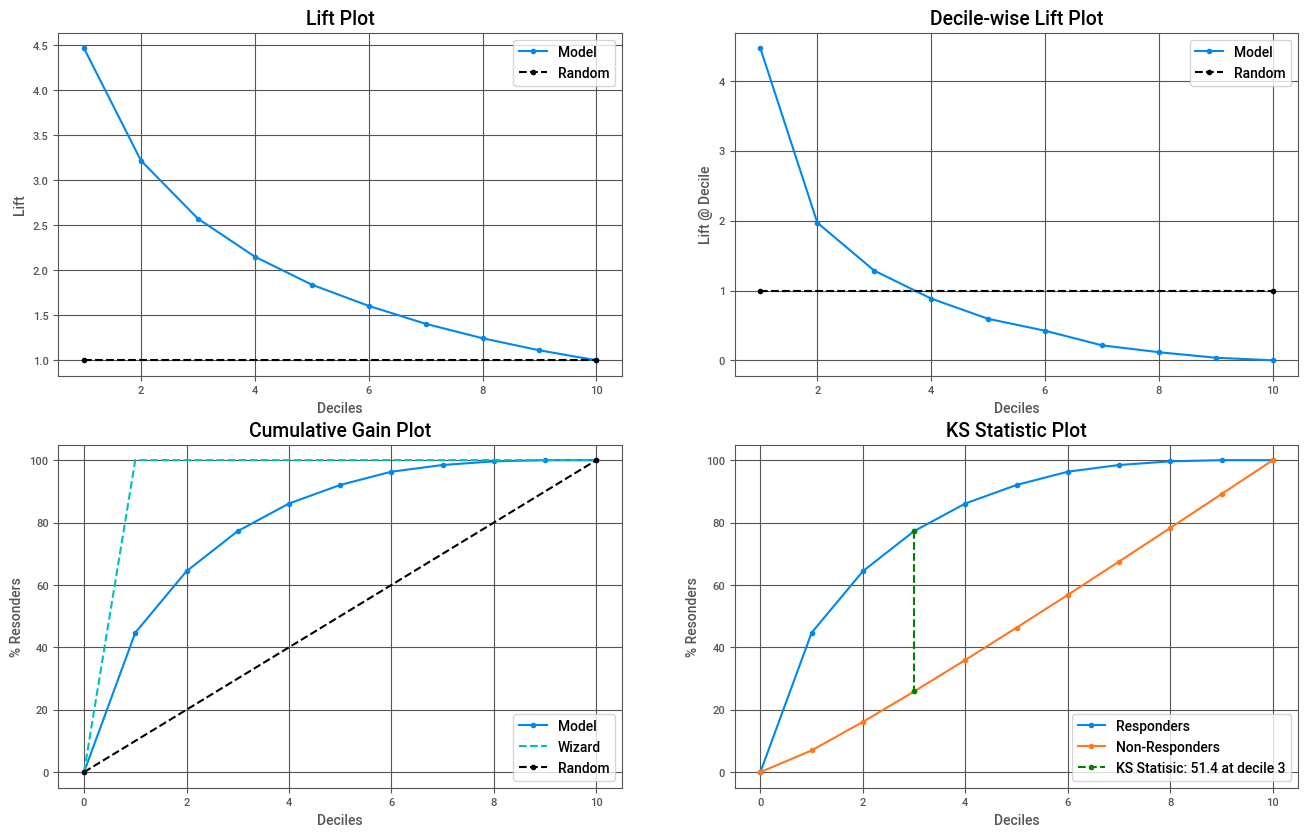

In [27]:
df_set = pd.concat([X, pd.DataFrame(y)], axis=1)
df_set['prediction_proba'] = best_gbm.predict_proba(X)[:,1]
df_set['prediction'] = best_gbm.predict(X)
df_set.sort_values(by='prediction_proba', inplace=True)

num_deciles = 10
df_set['cuts'] = pd.qcut(df_set['prediction_proba'], num_deciles, labels=False)

report(df_set['Default'], df_set['prediction_proba'])

In [29]:
create_metrics(df_set['Default'], df_set['prediction'])

Predicted            Total
                 Positive Negative        
Actual Positive       381     9464    9845
       Negative        14   111997  112011
Total                 395   121461  121856

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.922082  0.999875      0.92222     0.999875
1  Class 1   0.964557  0.038700      0.92222          NaN

### As we can see from the kds metrics table, almost 86% of our defaulters are captured in top 4 deciles. LIFT & KS statistic looks fine. But by looking at the tables for precision and recall, we can say the model is only selecting the bottom 5 deciles. Using that threshold will not help. We'll have to use another threshold with some cuts.

#### Cut 1: The first decile mins at 0.159. Let's select the threshold for prediction at 0.158. ie, we will consider every sample in 1st decile as bad. Rest is good. Let's see the metrices now,

In [37]:
df_set['rearranged_pred'] = 0
df_set.loc[df_set.prediction_proba >= 0.158, 'rearranged_pred'] = 1
create_metrics(df_set['Default'], df_set['rearranged_pred'])

Predicted            Total
                 Positive Negative        
Actual Positive      4428     5417    9845
       Negative      7942   104069  112011
Total               12370   109486  121856

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.950523  0.929096     0.890371     0.929096
1  Class 1   0.357963  0.449771     0.890371          NaN

##### This is the case maximum conversion rate, here we will capture 45% of all total bad by just using 12370 samples. Let's use another cases, ie, we will use 2nd decile along with 1st decile.

In [38]:
df_set['rearranged_pred'] = 0
df_set.loc[df_set.prediction_proba >= 0.103, 'rearranged_pred'] = 1
create_metrics(df_set['Default'], df_set['rearranged_pred'])

Predicted            Total
                 Positive Negative        
Actual Positive      6381     3464    9845
       Negative     18337    93674  112011
Total               24718    97138  121856

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.964339  0.836293     0.821092     0.836293
1  Class 1   0.258152  0.648146     0.821092          NaN

##### Here we will capture 65% of all total bad by just using 24718 samples. Now, we will use 3nd decile along with 1st & 2nd & 3rd decile.

In [39]:
df_set['rearranged_pred'] = 0
df_set.loc[df_set.prediction_proba >= 0.075, 'rearranged_pred'] = 1
create_metrics(df_set['Default'], df_set['rearranged_pred'])

Predicted            Total
                 Positive Negative        
Actual Positive      7672     2173    9845
       Negative     29464    82547  112011
Total               37136    84720  121856

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.974351  0.736954     0.740374     0.736954
1  Class 1   0.206592  0.779279     0.740374          NaN

##### Here we will capture almost 80% of all total bad by just using 37136 samples. Now, we will use 3nd decile along with 1st & 2nd decile.

In [42]:
df_set['rearranged_pred'] = 0
df_set.loc[df_set.prediction_proba >= 0.057, 'rearranged_pred'] = 1
create_metrics(df_set['Default'], df_set['rearranged_pred'])

Predicted            Total
                 Positive Negative        
Actual Positive      8523     1322    9845
       Negative     41160    70851  112011
Total               49683    72173  121856

Class  Precision    Recall  Correctness  Specificity
0  Class 0   0.981683  0.632536     0.651375     0.632536
1  Class 1   0.171548  0.865719     0.651375          NaN

##### Here we will capture almost 86% of all total bad by just using 49683 samples. 

### We can use various other ML + DL methods to capture the default cases. Also we can use various combinations for this decile marking also. We can even create Red, Amber, Green segment depending on their probability from the model. To sum up, there are thousands of combinations for this model and also there are hundreds of models. But, as per the business goal, I think this achieves it well. Now, according to business needs we can select any of the results out of these 4.